#  Обзор бизнес-показателей маркетплейса

- Автор: Логинов Павел Александрович
- Дата: 09.10.2025

## Вводные по кейсу

# Описание данных

## Таблица `Users`

| Поле              | Описание                                       |
|-------------------|------------------------------------------------|
| `user_id`         | Уникальный идентификатор пользователя.         |
| `registration_date` | Дата регистрации пользователя.                |
| `age`             | Возраст пользователя.                          |
| `gender`          | Пол.                                |
| `region`          | Регион.                                        |
| `acq_channel`     | Канал привлечения.                             |
| `buyer_segment`   | Сегмент покупателя.                            |
| `cohort_week`     | Неделя привлечения.|
| `cohort_month`    | Месяц привлечения. |

---

## Таблица `Events`

| Поле          | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| `event_id`    | Уникальный идентификатор события.                                        |
| `user_id`     | Идентификатор пользователя.                                              |
| `event_date`  | Дата события.                                                            |
| `event_type`  | Тип события.   |
| `os`          | Операционная система.               |
| `device`      | Тип устройства.                                |
| `product_name`| Наименование товара, к которому относится событие (если применимо).      |
| `event_week`  | Неделя события.                                          |
| `event_month` | Месяц события .                                           |

---

## Таблица `Orders`

| Поле          | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| `order_id`    | Уникальный идентификатор заказа.                                         |
| `user_id`     | Идентификатор пользователя, который сделал заказ |
| `order_date`  | Дата и время оформления заказа.                                          |
| `product_name`| Наименование товара.                                                     |
| `quantity`    | Количество единиц товара в заказе.                                       |
| `unit_price`  | Цена за одну единицу товара.                                             |
| `total_price` | Итоговая сумма заказа.                                                   |
| `category_name` | Наименование категории товара.                                         |
| `order_week`  | Неделя заказа.                                           |
| `order_month` | Месяц заказа.                                            |


## Таблица `Campaign_costs`

| Поле         | Описание                                                                 |
|--------------|--------------------------------------------------------------------------|
| `acq_channel`| Канал привлечения.  |
| `spend_month`| Месяц, в который был потрачен бюджет (отражает период, в котором были привлечены пользователи)                      |
| `budget`     | Маркетинговый бюджет (в денежном выражении), потраченный на данный канал в указанном месяце.                           |



## Описание событий

| Событие             | Описание                                                                                  |
|---------------------|-------------------------------------------------------------------------------------------|
| `page_view`         | Открытие любой страницы сайта или приложения пользователем.                                |
| `product_view`      | Просмотр страницы конкретного товара.                                                     |
| `product_click`     | Клик по товару (например, из списка товаров или на баннере).                              |
| `add_to_cart`       | Добавление товара в корзину.                                                              |
| `remove_from_cart`  | Удаление товара из корзины.                                                               |
| `search`            | Выполнение поиска по сайту или приложению.                                                |
| `filter_apply`      | Применение фильтра (например, по цене, бренду, категории).                                |
| `checkout_start`    | Начало оформления заказа (переход к оформлению корзины).                                  |
| `checkout_complete` | Завершение оформления заказа (не гарантирует покупку, покупка зависит от факта оплаты).                                          |
| `user_login`        | Вход пользователя в личный кабинет или аккаунт.                                           |
| `user_logout`       | Выход пользователя из аккаунта.                                                           |
| `wishlist_add`      | Добавление товара в список желаемого (wishlist).                                          |
| `category_view`     | Просмотр страницы категории товаров.                                                      |
| `banner_click`      | Клик по рекламному баннеру на сайте или в приложении.                                     |
| `promo_view`        | Просмотр промо-акции или специального предложения.                                        |


## Выручка маркетплейса = 5% от total_price

# Блок кода и расчета метрик

Начнём с загрузки библиотек `pandas` (для работы со структурированными табличными данными), `matplotlib.pyplot` (для визуализации данных), `seaborn` (для создания статистических графиков) `matplotlib.colors` (для работы с цветами), `numpy` (для работы с массивами и выполнения математических операций), `KMeans` (для реализации алгоритма, который группирует объекты в кластеры на основе их схожести), `proportions_ztest` (для проведения статистического Z-теста пропорций с двумя выборками), `ttest_ind` (для проведения статистического t-теста с двумя выборками) и датасетов `pa_marketplace_users.csv`, `pa_marketplace_events.csv`, `pa_marketplace_orders.csv` и `pa_marketplace_campaign_costs.csv`

In [1]:
# Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np
from sklearn.cluster import KMeans
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

In [2]:
# Выгружаем данные в переменные

try:
    users = pd.read_csv('C:/Users/Student/Desktop/pa_marketplace_users.csv')
    events = pd.read_csv('C:/Users/Student/Desktop/pa_marketplace_events.csv')
    orders = pd.read_csv('C:/Users/Student/Desktop/pa_marketplace_orders.csv')
    costs = pd.read_csv('C:/Users/Student/Desktop/pa_marketplace_campaign_costs.csv')
    
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_users.csv')
    events = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_events.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_orders.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_campaign_costs.csv')

Познакомимся с данными датасета `pa_marketplace_users.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`

In [3]:
# Выводим первые строки датафрейма

users.head()

,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month
0,1,2024-01-01 00:47:00,35,M,Москва,Google Ads,regular,2024-01-01,2024-01-01
1,2,2024-01-01 19:01:00,53,M,Москва,Email Marketing,rare,2024-01-01,2024-01-01
2,3,2024-01-01 04:13:00,66,F,Санкт-Петербург,Google Ads,regular,2024-01-01,2024-01-01
3,4,2024-01-01 17:18:00,58,M,Краснодар,Affiliate,one_time,2024-01-01,2024-01-01
4,5,2024-01-01 08:29:00,58,F,Другие регионы,Google Ads,regular,2024-01-01,2024-01-01


In [4]:
# Выводим информацию о датафрейме

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44151 entries, 0 to 44150
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            44151 non-null  int64 
 1   registration_date  44151 non-null  object
 2   age                44151 non-null  int64 
 3   gender             44151 non-null  object
 4   region             44151 non-null  object
 5   acq_channel        44151 non-null  object
 6   buyer_segment      44151 non-null  object
 7   cohort_week        44151 non-null  object
 8   cohort_month       44151 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.0+ MB


Датафрейм `users` содержит 9 столбцов и 44151 строку, в котором представлена информация о пользователях

В датафрейме пропуски - отсутствуют

Несоответствие типа данных наблюдается в столбцах:

- `registration_date` — дата регистрации пользователя;
- `cohort_week` — неделя привлечения;
- `cohort_month` — месяц привлечения.

Столбцы с информацией о дате и времени должны обладать типом данных `datetime64`

In [5]:
# Меняем тип данных

users['registration_date'] = pd.to_datetime(users['registration_date'])
users['cohort_week'] = pd.to_datetime(users['cohort_week'])
users['cohort_month'] = pd.to_datetime(users['cohort_month'])

# Выводим информацию о датафрейме

users.info()

# Выводим первые строки датафрейма

users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44151 entries, 0 to 44150
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            44151 non-null  int64         
 1   registration_date  44151 non-null  datetime64[ns]
 2   age                44151 non-null  int64         
 3   gender             44151 non-null  object        
 4   region             44151 non-null  object        
 5   acq_channel        44151 non-null  object        
 6   buyer_segment      44151 non-null  object        
 7   cohort_week        44151 non-null  datetime64[ns]
 8   cohort_month       44151 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 3.0+ MB


,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month
0,1,2024-01-01 00:47:00,35,M,Москва,Google Ads,regular,2024-01-01,2024-01-01
1,2,2024-01-01 19:01:00,53,M,Москва,Email Marketing,rare,2024-01-01,2024-01-01
2,3,2024-01-01 04:13:00,66,F,Санкт-Петербург,Google Ads,regular,2024-01-01,2024-01-01
3,4,2024-01-01 17:18:00,58,M,Краснодар,Affiliate,one_time,2024-01-01,2024-01-01
4,5,2024-01-01 08:29:00,58,F,Другие регионы,Google Ads,regular,2024-01-01,2024-01-01


Затем проверим крайние значения диапазонов столбцов, которые содержат информацию о дате и времени

In [6]:
# Проверяем крайние значения диапазонов столбцов

print(users['registration_date'].min())
print(users['registration_date'].max())
print(users['cohort_week'].min())
print(users['cohort_week'].max())
print(users['cohort_month'].min())
print(users['cohort_month'].max())

2024-01-01 00:07:00
2024-12-31 23:44:00
2024-01-01 00:00:00
2024-12-30 00:00:00
2024-01-01 00:00:00
2024-12-01 00:00:00


В датафрейме представлены полноценные данные с точки зрения включения в датафрейм информации со всех дней, недель и месяцев

Далее проверим датафрейм на наличие дубликатов

In [7]:
# Проверяем данные на наличие дубликатов

users.duplicated().sum()

0

Датафрейм не содержит полные дубликаты

Далее проверим значения столбцов категориальных данных

In [8]:
# Проверяем значения столбцов категориальных данных в датафрейме

print(users['gender'].unique())
print()
print(users['region'].unique())
print()
print(users['acq_channel'].unique())
print()
print(users['buyer_segment'].unique())

['M' 'F']

['Москва' 'Санкт-Петербург' 'Краснодар' 'Другие регионы' 'Нижний Новгород'
 'Екатеринбург' 'Московская область' 'Новосибирск' 'Ростов-на-Дону']

['Google Ads' 'Email Marketing' 'Affiliate' 'SEO' 'Social Media' 'TikTok']

['regular' 'rare' 'one_time' 'medium']


Все значения - корректны и не повторяются из-за различных стилей написания

Таким образом, датафрейм `users` подготовлен к дальнейшему анализу:

- Дубликаты и пропуски - отсутствуют
- Значения категориальных данных - корректны
- Столбцы, которые содержат информацию о дате и времени, приведены к корректному типу данных `datetime64`
- Тип данных имеющихся столбцов соответствуют характеру данных
- Данные - полноценны с точки зрения включения информации со всех дней, недель и месяцев

Познакомимся с данными датасета `pa_marketplace_events.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`

In [9]:
# Выводим первые строки датафрейма

events.head()

,event_id,user_id,event_date,event_type,os,device,product_name,event_week,event_month
0,3132,100,2024-01-01,page_view,iOS,mobile,NaN,2024-01-01,2024-01-01
1,3133,100,2024-01-01,product_view,iOS,mobile,Шорты для тренировок,2024-01-01,2024-01-01
2,3134,100,2024-01-01,product_click,iOS,mobile,Куртка детская,2024-01-01,2024-01-01
3,3135,100,2024-01-01,add_to_cart,iOS,mobile,Балетки классические,2024-01-01,2024-01-01
4,3136,100,2024-01-01,checkout_start,iOS,mobile,NaN,2024-01-01,2024-01-01


In [10]:
# Выводим информацию о датафрейме

events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785859 entries, 0 to 785858
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event_id      785859 non-null  int64 
 1   user_id       785859 non-null  int64 
 2   event_date    785859 non-null  object
 3   event_type    785859 non-null  object
 4   os            785859 non-null  object
 5   device        785859 non-null  object
 6   product_name  385740 non-null  object
 7   event_week    785859 non-null  object
 8   event_month   785859 non-null  object
dtypes: int64(2), object(7)
memory usage: 54.0+ MB


Датафрейм `events` содержит 9 столбцов и 785859 строк, в котором представлена информация о событиях

В датафрейме присутствуют пропуски в столбце `product_name` - наименование товара, к которому относится событие

Специфика датафрейма подразумевает включение информации о всех типах событиях. Поэтому некоторые строки не содержат информации о наименовании товара, так как события не подразумевает выбор конкретного товара, например, событие открытия любой страницы сайта или приложения пользователем `page_view`. Соответственно, пропуски в столбце `product_name` - обоснованы

Несоответствие типа данных наблюдается в столбцах:

- `event_date` — дата события;
- `event_week` — неделя события;
- `event_month` — месяц события.

Столбцы с информацией о дате и времени должны обладать типом данных `datetime64`

In [11]:
# Меняем тип данных

events['event_date'] = pd.to_datetime(events['event_date'])
events['event_week'] = pd.to_datetime(events['event_week'])
events['event_month'] = pd.to_datetime(events['event_month'])

# Выводим информацию о датафрейме

events.info()

# Выводим первые строки датафрейма

events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785859 entries, 0 to 785858
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      785859 non-null  int64         
 1   user_id       785859 non-null  int64         
 2   event_date    785859 non-null  datetime64[ns]
 3   event_type    785859 non-null  object        
 4   os            785859 non-null  object        
 5   device        785859 non-null  object        
 6   product_name  385740 non-null  object        
 7   event_week    785859 non-null  datetime64[ns]
 8   event_month   785859 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 54.0+ MB


,event_id,user_id,event_date,event_type,os,device,product_name,event_week,event_month
0,3132,100,2024-01-01,page_view,iOS,mobile,NaN,2024-01-01,2024-01-01
1,3133,100,2024-01-01,product_view,iOS,mobile,Шорты для тренировок,2024-01-01,2024-01-01
2,3134,100,2024-01-01,product_click,iOS,mobile,Куртка детская,2024-01-01,2024-01-01
3,3135,100,2024-01-01,add_to_cart,iOS,mobile,Балетки классические,2024-01-01,2024-01-01
4,3136,100,2024-01-01,checkout_start,iOS,mobile,NaN,2024-01-01,2024-01-01


Затем проверим крайние значения диапазонов столбцов, которые содержат информацию о дате и времени

In [12]:
# Проверяем крайние значения диапазонов столбцов

print(events['event_date'].min())
print(events['event_date'].max())
print(events['event_week'].min())
print(events['event_week'].max())
print(events['event_month'].min())
print(events['event_month'].max())

2024-01-01 00:00:00
2024-12-31 00:00:00
2024-01-01 00:00:00
2024-12-30 00:00:00
2024-01-01 00:00:00
2024-12-01 00:00:00


В датафрейме представлены полноценные данные с точки зрения включения в датафрейм информации со всех дней, недель и месяцев

Далее проверим датафрейм на наличие дубликатов

In [13]:
# Проверяем данные на наличие дубликатов

events.duplicated().sum()

0

Датафрейм не содержит полные дубликаты

Далее проверим значения столбцов категориальных данных

In [14]:
# Проверяем значения столбцов категориальных данных в датафрейме

print(events['event_type'].unique())
print()
print(events['os'].unique())
print()
print(events['device'].unique())
print()
print(events['product_name'].unique())

['page_view' 'product_view' 'product_click' 'add_to_cart' 'checkout_start'
 'checkout_complete' 'user_logout' 'search' 'category_view' 'filter_apply'
 'promo_view' 'wishlist_add' 'user_login' 'banner_click'
 'remove_from_cart']

['iOS' 'Windows' 'macOS' 'Android']

['mobile' 'desktop' 'tablet']

[nan 'Шорты для тренировок' 'Куртка детская' 'Балетки классические'
 'Маска для лица' 'Одеяло детское' 'Поло Ralph Lauren' 'Брюки палаццо'
 'Зубная паста' 'Коврик для йоги' 'Фен для волос' 'Гречка ядрица'
 'Пальто зимнее' 'Тушь для ресниц' 'Горелка газовая' 'Сумка кожаная'
 'Доска разделочная' 'Свитер с капюшоном' 'Шуруповерт' 'Часы Casio'
 'Коляска трансформер' 'Анкер PowerBank' 'Мяч футбольный'
 'Пластырь медицинский' 'Маркеры цветные' 'Spigen чехол' 'Чай черный'
 'Гель для душа' 'Спальный мешок' 'Запонки классические'
 'Перчатки кожаные' 'Конструктор LEGO' 'Лежак для питомца'
 'Костюм спортивный' 'Компас туристический' 'Духи Chanel'
 'Берцы тактические' 'Сахар белый' 'Фильтр воздушный' 'Шкаф

Все значения - корректны и не повторяются из-за различных стилей написания

Таким образом, датафрейм `events` подготовлен к дальнейшему анализу:

- Дубликаты - отсутствуют
- Пропуски - обоснованы
- Значения категориальных данных - корректны
- Столбцы, которые содержат информацию о дате и времени, приведены к корректному типу данных `datetime64`
- Тип данных имеющихся столбцов соответствуют характеру данных
- Данные - полноценны с точки зрения включения информации со всех дней, недель и месяцев

Познакомимся с данными датасета `pa_marketplace_orders.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`

In [15]:
# Выводим первые строки датафрейма

orders.head()

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month
0,1,3,2024-01-19 01:52:52.000,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
1,2,3,2024-01-19 01:52:52.000,Молоток слесарный,1,11340.38,11340.38,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
2,3,3,2024-01-19 01:52:52.000,Секатор садовый,2,10892.09,21784.18,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
3,4,3,2024-01-25 13:59:38.000,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-22,2024-01-01
4,5,3,2024-01-25 13:59:38.000,Чай черный,1,2099.59,2099.59,Продукты питания,2024-01-22,2024-01-01


In [16]:
# Выводим информацию о датафрейме

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31357 entries, 0 to 31356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       31357 non-null  int64  
 1   user_id        31357 non-null  int64  
 2   order_date     31357 non-null  object 
 3   product_name   31357 non-null  object 
 4   quantity       31357 non-null  int64  
 5   unit_price     31357 non-null  float64
 6   total_price    31357 non-null  float64
 7   category_name  31357 non-null  object 
 8   order_week     31357 non-null  object 
 9   order_month    31357 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.4+ MB


Датафрейм `orders` содержит 10 столбцов и 31357 строк, в котором представлена информация о заказах

В датафрейме пропуски - отсутствуют

Несоответствие типа данных наблюдается в столбцах:

- `order_date` — дата и время оформления заказа;
- `order_week` — неделя заказа;
- `order_month` — месяц заказа.

Столбцы с информацией о дате и времени должны обладать типом данных `datetime64`

In [17]:
# Меняем тип данных

orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['order_week'] = pd.to_datetime(orders['order_week'])
orders['order_month'] = pd.to_datetime(orders['order_month'])

# Выводим информацию о датафрейме

orders.info()

# Выводим первые строки датафрейма

orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31357 entries, 0 to 31356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       31357 non-null  int64         
 1   user_id        31357 non-null  int64         
 2   order_date     31357 non-null  datetime64[ns]
 3   product_name   31357 non-null  object        
 4   quantity       31357 non-null  int64         
 5   unit_price     31357 non-null  float64       
 6   total_price    31357 non-null  float64       
 7   category_name  31357 non-null  object        
 8   order_week     31357 non-null  datetime64[ns]
 9   order_month    31357 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 2.4+ MB


,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month
0,1,3,2024-01-19 01:52:52,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
1,2,3,2024-01-19 01:52:52,Молоток слесарный,1,11340.38,11340.38,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
2,3,3,2024-01-19 01:52:52,Секатор садовый,2,10892.09,21784.18,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
3,4,3,2024-01-25 13:59:38,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-22,2024-01-01
4,5,3,2024-01-25 13:59:38,Чай черный,1,2099.59,2099.59,Продукты питания,2024-01-22,2024-01-01


Затем проверим крайние значения диапазонов столбцов, которые содержат информацию о дате и времени

In [18]:
# Проверяем крайние значения диапазонов столбцов

print(orders['order_date'].min())
print(orders['order_date'].max())
print(orders['order_week'].min())
print(orders['order_week'].max())
print(orders['order_month'].min())
print(orders['order_month'].max())

2024-01-01 08:03:45
2024-12-31 23:00:53
2024-01-01 00:00:00
2024-12-30 00:00:00
2024-01-01 00:00:00
2024-12-01 00:00:00


В датафрейме представлены полноценные данные с точки зрения включения в датафрейм информации со всех дней, недель и месяцев

Далее проверим датафрейм на наличие дубликатов

In [19]:
# Проверяем данные на наличие дубликатов

orders.duplicated().sum()

0

Датафрейм не содержит полные дубликаты

Далее проверим значения столбцов категориальных данных

In [20]:
# Проверяем значения столбцов категориальных данных в датафрейме

print(orders['product_name'].unique())
print()
print(orders['category_name'].unique())

['Шуруповерт' 'Молоток слесарный' 'Секатор садовый' 'Чай черный'
 'Грабли веерные' 'Джинсы скинни' 'Xiaomi Mi Band' 'Толстовка с капюшоном'
 'Часы настенные' 'Baseus зарядка' 'Пальто зимнее' 'Брюки палаццо'
 'Майка борцовка' 'Светильник настольный' 'Отвертки набор'
 'Футболка принт' 'Костюм спортивный' 'Ваза керамическая'
 'Настольная игра' 'Самокат трехколесный' 'Зеркало в раме' 'Тетрадь общая'
 'Люстра хрустальная' 'Глюкометр' 'Помада матовая' 'Кардиган вязаный'
 'Термос стальной' 'Спальный мешок' 'Масло подсолнечное' 'Гречка ядрица'
 'Колготки детские' 'Свитер с капюшоном' 'Рюкзак городской'
 'Перчатки кожаные' 'Чехлы на сиденья' 'Свечи ароматические'
 'Машинка радиоуправляемая' 'Туфли оксфорд' 'Кроссовки белые'
 'Мокасины кожаные' 'Маска для волос' 'Сандалии летние' 'Роман бестселлер'
 'Духи Chanel' 'Свитер шерстяной' 'Лак для ногтей' 'Ремень кожаный'
 'Ботинки классические' 'Мука пшеничная' 'Костюм для мальчика'
 'Балетки классические' 'Пиджак casual' "Джинсы Levi's" 'Крем для лиц

Все значения - корректны и не повторяются из-за различных стилей написания

Таким образом, датафрейм `orders` подготовлен к дальнейшему анализу:

- Дубликаты и пропуски - отсутствуют
- Значения категориальных данных - корректны
- Столбцы, которые содержат информацию о дате и времени, приведены к корректному типу данных `datetime64`
- Тип данных имеющихся столбцов соответствуют характеру данных
- Данные - полноценны с точки зрения включения информации со всех дней, недель и месяцев

Познакомимся с данными датасета `pa_marketplace_costs.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`

In [21]:
# Выводим первые строки датафрейма

costs.head()

,Unnamed: 0,acq_channel,spend_month,budget
0,0,Affiliate,2024-01-01,179343.3875
1,1,Affiliate,2024-02-01,175488.4875
2,2,Affiliate,2024-03-01,164543.4750
3,3,Affiliate,2024-04-01,186869.9750
4,4,Affiliate,2024-05-01,166443.7750


In [22]:
# Выводим информацию о датафрейме

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   88 non-null     int64  
 1   acq_channel  88 non-null     object 
 2   spend_month  88 non-null     object 
 3   budget       88 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


Датафрейм `users` содержит 4 столбца и 88 строк, в котором представлена информация о затратах

В датафрейме пропуски - отсутствуют

Несоответствие типа данных наблюдается в столбцах:

- `spend_month` — месяц, в который был потрачен бюджет (отражает период, в котором были привлечены пользователи);

Столбцы с информацией о дате и времени должны обладать типом данных `datetime64`

В датафрейме присутствует лишний столбец `Unnamed: 0` с номером строки, который дублирует столбец с индексом строки - поэтому столбец `Unnamed: 0` можно удалить

In [23]:
# Меняем тип данных

costs['spend_month'] = pd.to_datetime(costs['spend_month'])

# Удаляем ненужный столбец

costs = costs.drop('Unnamed: 0', axis=1)

# Выводим информацию о датафрейме

costs.info()

# Выводим первые строки датафрейма

costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   acq_channel  88 non-null     object        
 1   spend_month  88 non-null     datetime64[ns]
 2   budget       88 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.2+ KB


,acq_channel,spend_month,budget
0,Affiliate,2024-01-01,179343.3875
1,Affiliate,2024-02-01,175488.4875
2,Affiliate,2024-03-01,164543.4750
3,Affiliate,2024-04-01,186869.9750
4,Affiliate,2024-05-01,166443.7750


Затем проверим крайние значения диапазонов столбцов, которые содержат информацию о дате и времени

In [24]:
# Проверяем крайние значения диапазонов столбцов

print(costs['spend_month'].min())
print(costs['spend_month'].max())

2024-01-01 00:00:00
2025-01-01 00:00:00


В датафрейме представлены полноценные данные с точки зрения включения в датафрейм информации со всех дней, недель и месяцев

Далее проверим датафрейм на наличие дубликатов

In [25]:
# Проверяем данные на наличие дубликатов

costs.duplicated().sum()

0

Датафрейм не содержит полные дубликаты

Далее проверим значения столбцов категориальных данных

In [26]:
# Проверяем значения столбцов категориальных данных в датафрейме

print(costs['acq_channel'].unique())

['Affiliate' 'Direct' 'Email Marketing' 'Social Media' 'Google Ads' 'SEO'
 'TikTok']


Все значения - корректны и не повторяются из-за различных стилей написания

Таким образом, датафрейм `costs` подготовлен к дальнейшему анализу:

- Дубликаты и пропуски - отсутствуют
- Значения категориальных данных - корректны
- Столбцы, которые содержат информацию о дате и времени, приведены к корректному типу данных `datetime64`
- Тип данных имеющихся столбцов соответствуют характеру данных
- Лишний столбец - удалён
- Данные - полноценны с точки зрения включения информации со всех дней, недель и месяцев

**Промежуточный вывод**
    
Датафреймы `users`, `events`, `orders` и `costs` полностью подготовлены к проведению полноценного анализа данных. Теперь можно приступать к следующим шагам

### 2. Построить обзор ключевых метрик

Изучим общую динамику ключевых метрик. Для этого рассчитаем и визуализируем изменение следующих метрик в динамике:
    
- `Revenue` - общий размер выручки
- `ARPU` - средний доход на одного пользователя
- `DAU` - количество активных пользователей в день
- `WAU` - количество активных пользователей в неделю
- `MAU` - количество активных пользователей в месяц
- `AOV` - средний чек
- `Retention Rate` - показатель удержания пользователей
- `CTR` - показатель кликабельности
- `CR в заказ` - конверсия в покупку

Начнём с расчёта общего уровня выручки (`Revenue`) в динамике по месяцам. Напомним, что выручка маркетплейса = **5%** от итоговой суммы заказа. Перед этим в датафрейм `orders` добавим столбец с уровнем выручки - `Revenue`

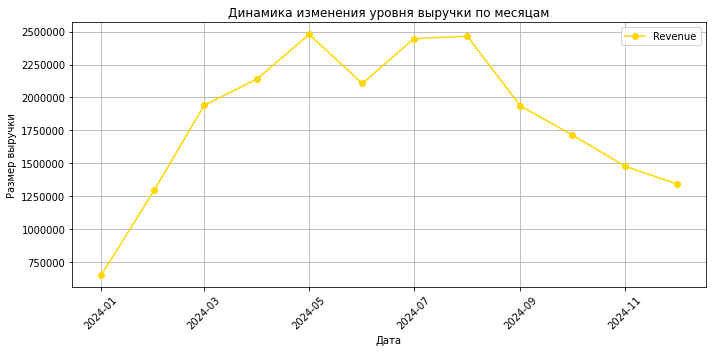

,order_month,revenue
0,2024-01-01,648890.03
1,2024-02-01,1296557.01
2,2024-03-01,1940749.79
3,2024-04-01,2142838.39
4,2024-05-01,2478758.10
5,2024-06-01,2106011.86
6,2024-07-01,2446535.45
7,2024-08-01,2465802.40
8,2024-09-01,1935366.70
9,2024-10-01,1716108.26


In [27]:
# Добавляем информацию про выручку в датафрейм orders

orders['revenue'] = orders['total_price'] * 0.05

# Рассчитываем Revenue

revenue_df = orders.groupby('order_month')['revenue'].sum().reset_index()

# Визуализируем изменение метрики в динамике

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.plot(revenue_df['order_month'], revenue_df['revenue'], marker='o', label='Revenue', color = 'gold')
plt.title('Динамика изменения уровня выручки по месяцам')
plt.xlabel('Дата')
plt.ylabel('Размер выручки')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Избавляемся от экспоненциального представления чисел

pd.options.display.float_format = '{:.2f}'.format

# Выводим результат в табличном виде

revenue_df

Исходя из построенного графика, мы можем увидеть, что выручка росла с января (**648** тысяч) по май (**2.4** млн). В июне (**2.1** млн) выручка снизилиась на 300 тысяч, а в июле-августе (**2.4** млн) возрасла на 300 тысяч. А затем с августа (**2.4** млн) и по декабрь (**1.3** млн) наблюдалось снижение выручки на **1.1** млн.

Таким образом, мы можем сделать вывод о том, что несмотря на быстрый рост общего объёма выручки маркетплейса, в последние месяцы 2024 года наблюдалось снижение данного показателя. Это является тревожным сигналом, который может свидетельствовать о наличии проблем в работе маркетплейса

Далее изучим изменение показателя среднего дохода на одного пользователя (`ARPU`) в динамике по месяцам

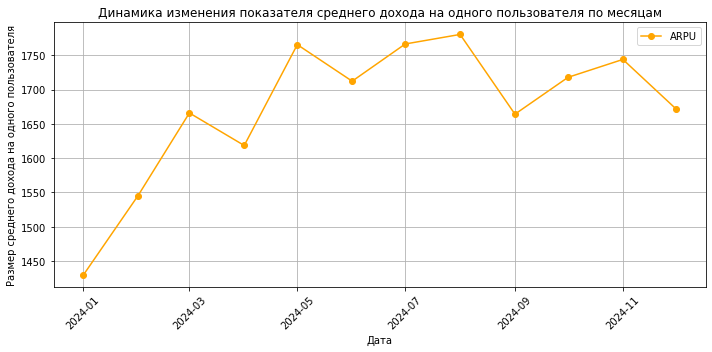

,order_month,users,revenue,arpu
0,2024-01-01,454,648890.03,1429.27
1,2024-02-01,839,1296557.01,1545.36
2,2024-03-01,1165,1940749.79,1665.88
3,2024-04-01,1324,2142838.39,1618.46
4,2024-05-01,1404,2478758.10,1765.50
5,2024-06-01,1230,2106011.86,1712.20
6,2024-07-01,1385,2446535.45,1766.45
7,2024-08-01,1385,2465802.40,1780.36
8,2024-09-01,1163,1935366.70,1664.12
9,2024-10-01,999,1716108.26,1717.83


Абсолютная разница: 243
Относительная разница:17%


In [28]:
# Рассчитываем ARPU

arpu_df = orders.groupby(['order_month']).agg(
    users = ('user_id', 'nunique'),
    revenue = ('revenue', 'sum')
).reset_index()

arpu_df['arpu'] = arpu_df['revenue']/arpu_df['users']

# Визуализируем изменение метрики в динамике

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.plot(arpu_df['order_month'], arpu_df['arpu'], marker='o', label='ARPU', color = 'orange')
plt.title('Динамика изменения показателя среднего дохода на одного пользователя по месяцам')
plt.xlabel('Дата')
plt.ylabel('Размер среднего дохода на одного пользователя')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Выводим результат в табличном виде

display(arpu_df)

# Абсолютная разница между показателями метрики в конце и в начале года

print(f'Абсолютная разница: {round(arpu_df["arpu"].iloc[-1] - arpu_df["arpu"].iloc[0])}')

# Относительная разница между показателями метрики в конце и в начале года

print(f'Относительная разница:{round(((arpu_df["arpu"].iloc[-1] / arpu_df["arpu"].iloc[0]) - 1) * 100)}%')

Исходя из построенного графика, мы можем видеть, что средняя выручка на одного пользователя росла с января (**1429**) по май (**1765**), а затем приобрела волнообразный характер изменений (без конкретного тренда на снижение или увеличения показателя метрики) и с июня по декабрь колебалась в пределах значений от **1672** до **1780** - показатели метрики то снижались, то возрастали

Таким образом, мы можем сделать вывод о том, что при изучении метрики среднего дохода на одного пользователя резких снижений данного показателя к концу 2024 года - не наблюдалось. Положительная разница (**17%**) между значениями метрики в конце и начала года говорит об общем характере увеличения показателя данной метрики

Затем изучим изменение показателя количества активных пользователей в день (`DAU`), в неделю (`WAU`) и в месяц (`MAU`) в динамике

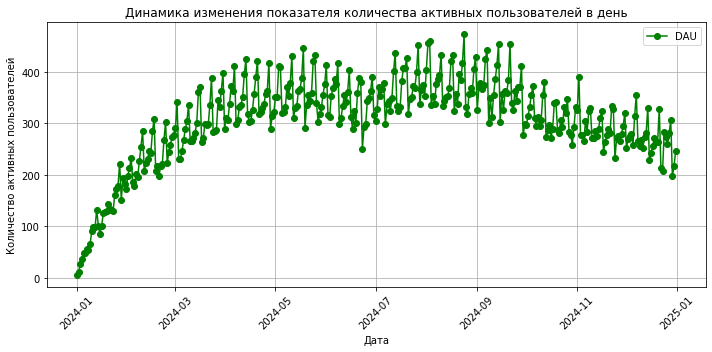

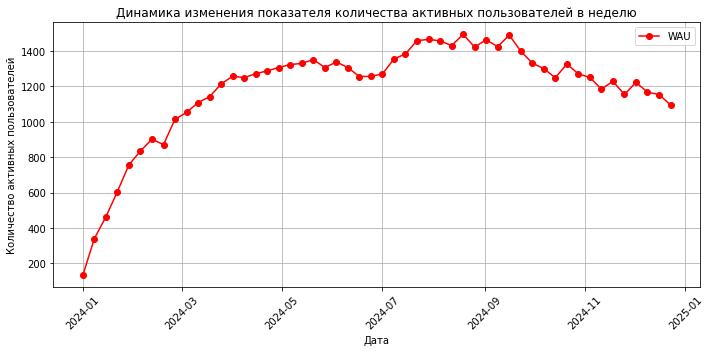

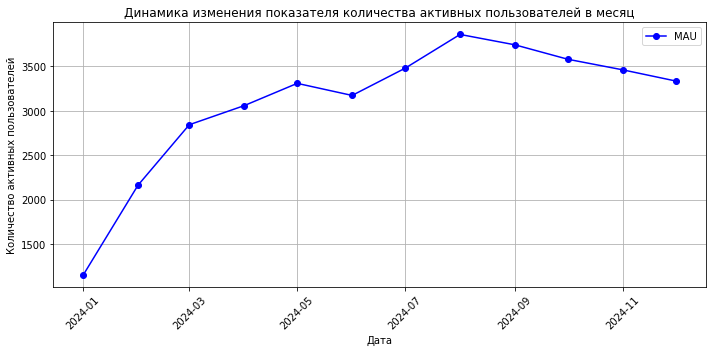

In [29]:
# Рассчитываем DAU, WAU и MAU

dau = events.groupby('event_date')['user_id'].nunique().reset_index()
wau = events.groupby('event_week')['user_id'].nunique().reset_index()
wau = wau[wau['event_week'] <= '2024-12-29'] # в последней неделе декабря 2024 года всего два дня - 30 и 31 декабря
                                              # для корректности расчёта показателя wau будем считать метрику 
                                              # только по полным неделям
mau = events.groupby('event_month')['user_id'].nunique().reset_index()

# Визуализируем DAU

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.plot(dau['event_date'], dau['user_id'], marker='o', label='DAU', color = 'green')
plt.title('Динамика изменения показателя количества активных пользователей в день')
plt.xlabel('Дата')
plt.ylabel('Количество активных пользователей')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Визуализируем WAU

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.plot(wau['event_week'], wau['user_id'], marker='o', label='WAU', color = 'red')
plt.title('Динамика изменения показателя количества активных пользователей в неделю')
plt.xlabel('Дата')
plt.ylabel('Количество активных пользователей')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Визуализируем MAU

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.plot(mau['event_month'], mau['user_id'], marker='o', label='MAU', color = 'blue')
plt.title('Динамика изменения показателя количества активных пользователей в месяц')
plt.xlabel('Дата')
plt.ylabel('Количество активных пользователей')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Исходя из построенных графиков, мы видим, что динамика изменения показателя количества активных пользователей в день, неделю и месяц положительна с января по август. Однако с августа по декабрь все три метрики начали постепенно снижаться

Таким образом, мы можем сделать вывод о том, что при изучении метрик количества активных пользователей в день, неделю и месяц, снижение данных показателей наблюдалось с августа по декабрь 2024 года

Далее изучим изменение показателя среднего чека (`AOV`) в динамике по месяцам

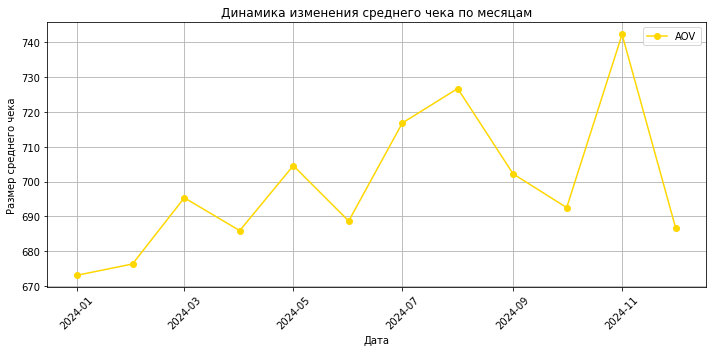

,order_month,orders,revenue,aov
0,2024-01-01,964,648890.03,673.12
1,2024-02-01,1917,1296557.01,676.35
2,2024-03-01,2791,1940749.79,695.36
3,2024-04-01,3124,2142838.39,685.93
4,2024-05-01,3518,2478758.10,704.59
5,2024-06-01,3058,2106011.86,688.69
6,2024-07-01,3413,2446535.45,716.83
7,2024-08-01,3393,2465802.40,726.73
8,2024-09-01,2756,1935366.70,702.24
9,2024-10-01,2478,1716108.26,692.54


In [30]:
# Рассчитываем AOV

aov_df = orders.groupby(['order_month']).agg(
    orders = ('order_id', 'nunique'),
    revenue = ('revenue', 'sum')
).reset_index()

aov_df['aov'] = aov_df['revenue']/aov_df['orders']

# Визуализируем изменение метрики в динамике

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.plot(aov_df['order_month'], aov_df['aov'], marker='o', label='AOV', color = 'gold')
plt.title('Динамика изменения среднего чека по месяцам')
plt.xlabel('Дата')
plt.ylabel('Размер среднего чека')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Выводим результат в табличном виде

aov_df

Исходя из построенного графика, мы можем увидеть восходящий тренд на увеличение размера среднего чека с 1 января (`673`) по 1 ноября (`742`). Однако в декабре метрика резко снизилась до `687`. При этом мы не можем точно утверждать, будет ли метрика уменьшаться и дальше, поскольку на протяжении всего года метрика каждый месяц то снижилась, то возрастала

Таким образом, мы можем сделать вывод о том, что необходимо продолжать наблюдение изменений показателя среднего чека для точного установления направления тренда изменения среднего чека

Далее изучим изменение показателя удержания пользователей (`Retention Rate`) по когортам в динамике по месяцам

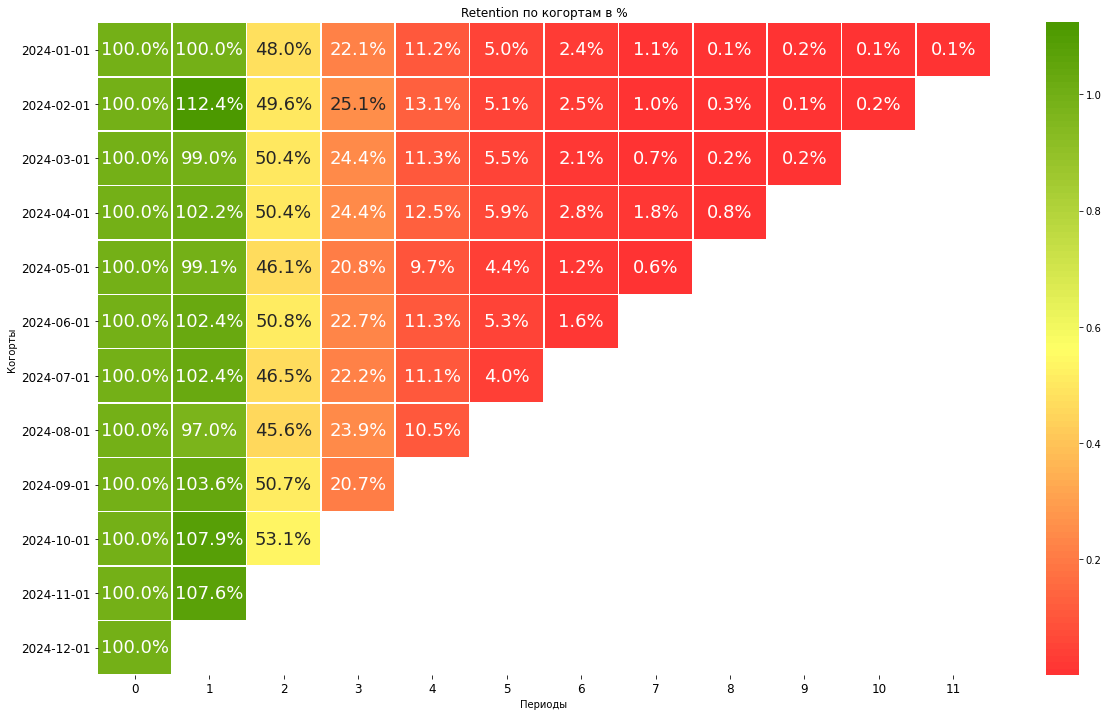

In [31]:
# Формируем датафрейм с идентификаторами пользователей, месяцем события и месяцем привлечения по событию page_view

events_user_id_event_month = events[['user_id', 'event_month']].drop_duplicates()
users_user_id_cohort_month = users[['user_id', 'cohort_month']].drop_duplicates()

retention_df = pd.merge(events_user_id_event_month, 
                        users_user_id_cohort_month, how = 'left', on = 'user_id')
retention_df = retention_df[(retention_df['event_month'].notna()) & (retention_df['cohort_month'].notna())]

# Считаем разницу в месяцах между событием и первым месяцем

retention_df['n_period'] = (
    retention_df['event_month'].dt.to_period('M').astype('int64')
    - retention_df['cohort_month'].dt.to_period('M').astype('int64')
)

retention_df['cohort_month'] = retention_df['cohort_month'].dt.date

data_pivot = pd.pivot_table(retention_df,
                            values='user_id',
                            index='cohort_month',
                            columns='n_period',
                            aggfunc=pd.Series.nunique).fillna(0).astype(int)

data_pivot = data_pivot.replace('', 0).astype('int')
data_pivot = data_pivot.div(data_pivot[0], axis=0)
data_pivot[data_pivot == 0] = float('nan')
cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)

plt.subplots(figsize=(20,12))
sns.heatmap(data_pivot,
           cmap=cmap,
           annot=True,
           fmt='.1%',
           linewidth=0.5,
            annot_kws={"size": 18})

plt.title('Retention по когортам в %')
plt.xlabel('Периоды')
plt.ylabel('Когорты')
plt.yticks(rotation=0)
plt.tick_params(labelsize=12) # чтобы сделать подписи данных на оси Y (когорты пользователей) немного крупнее
plt.show()

Исходя из построенной тепловой карты, мы можем увидеть, что показатель удержания пользователей резко снижается к третьему месяцу использования маркетплейса - со **100%** до **50%**, к четвёртому месяцу - с **50%** до **25%**, к пятому месяцу - с **25%** до **10%**. К последним месяцам года показатель удержания и вовсе приближается к **0%**

Таким образом, мы можем сделать вывод о том, что маркетплейс испытывает проблемы с удержанием клиентов. Это является тревожным сигналом, который может свидетельствовать о наличии проблем в работе маркетплейса

Далее изучим изменение показателя кликабельности (`CTR`) в динамике по месяцам

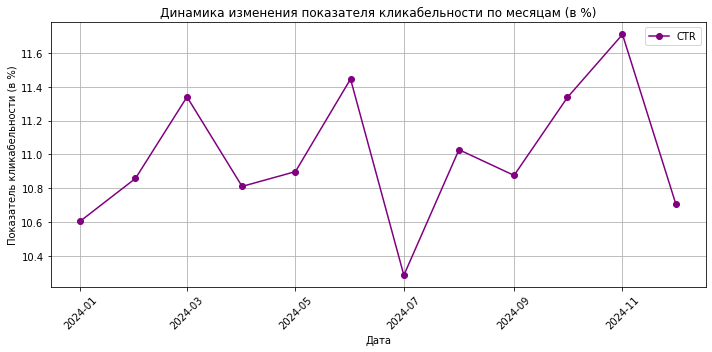

,event_month,views,clicks,ctr
0,2024-01-01,3941,418,10.61
1,2024-02-01,7690,835,10.86
2,2024-03-01,10538,1195,11.34
3,2024-04-01,11747,1270,10.81
4,2024-05-01,12497,1362,10.90
5,2024-06-01,11594,1327,11.45
6,2024-07-01,12560,1292,10.29
7,2024-08-01,13248,1461,11.03
8,2024-09-01,12164,1323,10.88
9,2024-10-01,10541,1195,11.34


In [32]:
# Рассчитываем CTR

clicks = events[events['event_type'] == 'banner_click']
views = events[events['event_type'] == 'page_view']

clicks_grouped = clicks.groupby('event_month')['event_id'].nunique().reset_index()
clicks_grouped = clicks_grouped.rename(columns={'event_id': 'clicks'})
views_grouped = views.groupby('event_month')['event_id'].nunique().reset_index()
views_grouped = views_grouped.rename(columns={'event_id': 'views'})

ctr_df = pd.merge(views_grouped, clicks_grouped, on = 'event_month')
ctr_df['ctr'] = (ctr_df['clicks']/ctr_df['views']) * 100

# Визуализируем изменение метрики в динамике

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.plot(ctr_df['event_month'], ctr_df['ctr'], marker='o', label='CTR', color = 'purple')
plt.title('Динамика изменения показателя кликабельности по месяцам (в %)')
plt.xlabel('Дата')
plt.ylabel('Показатель кликабельности (в %)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Выводим результат в табличном виде

ctr_df

Исходя из построенного графика, мы видим волнообразный характер изменения показателя кликабельности. При этом показатель кликабельности на протяжении всего года держится в районе **10-12%** - значения не сильно отличаются между собой в зависимости от месяца

Таким образом, мы можем сделать вывод о том, что показатель кликабельности находится в стагнирующем состоянии - за весь год пользователи не стали чаще нажимать на рекламу, которая высвечивается при использовании маркетплейса. Необходимо уделить больше внимания каналам привлечения пользователей и способам увеличения аудитории

Далее изучим изменение показателя конверсии в покупку (`CR`) в динамике по месяцам

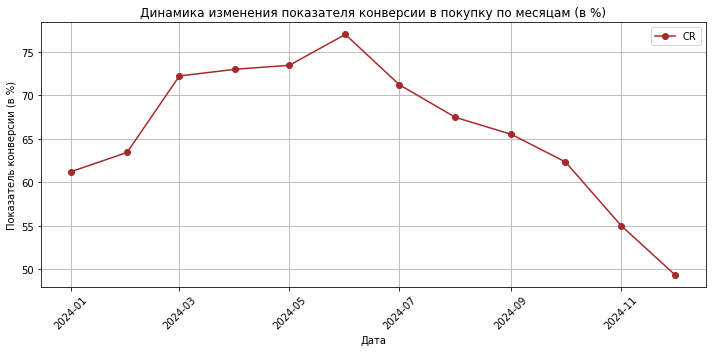

,event_month,views,purchases,cr
0,2024-01-01,3941,2413,61.23
1,2024-02-01,7690,4878,63.43
2,2024-03-01,10538,7612,72.23
3,2024-04-01,11747,8576,73.01
4,2024-05-01,12497,9181,73.47
5,2024-06-01,11594,8929,77.01
6,2024-07-01,12560,8945,71.22
7,2024-08-01,13248,8939,67.47
8,2024-09-01,12164,7970,65.52
9,2024-10-01,10541,6572,62.35


In [33]:
# Рассчитываем CR

purchases = events[events['event_type'] == 'checkout_complete']
views = events[events['event_type'] == 'page_view']

purchases_grouped = purchases.groupby('event_month')['event_id'].nunique().reset_index()
purchases_grouped = purchases_grouped.rename(columns={'event_id': 'purchases'})
views_grouped = views.groupby('event_month')['event_id'].nunique().reset_index()
views_grouped = views_grouped.rename(columns={'event_id': 'views'})

cr_df = pd.merge(views_grouped, purchases_grouped, on = 'event_month')
cr_df['cr'] = (cr_df['purchases']/cr_df['views']) * 100

# Визуализируем изменение метрики в динамике

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.plot(cr_df['event_month'], cr_df['cr'], marker='o', label='CR', color = 'brown')
plt.title('Динамика изменения показателя конверсии в покупку по месяцам (в %)')
plt.xlabel('Дата')
plt.ylabel('Показатель конверсии (в %)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Выводим результат в табличном виде

cr_df

Исходя из построенного графика, мы можем увидеть, что показатель конверсии в покупку рос с января (**61%**) по июнь (**77%**). А затем с июня (**77%**) и по декабрь (**49%**) наблюдалось снижение показателя конверсии в покупку на **28%**.

Таким образом, мы можем сделать вывод о том, что несмотря на рост показателя конверсии в покупку в первые 6 месяцев 2024 года, во второй половине 2024 года наблюдалось снижение данного показателя. Это является тревожным сигналом, который может свидетельствовать о наличии проблем в работе маркетплейса

**Промежуточный вывод**

Обзор ключевых метрик показал:

- Увеличение показателя выручки (`Revenue`) с января 2024 по август 2024 на **1.8** млн и снижение показателя выручки с августа 2024 по декабрь 2024 на **1.1** млн. *Тревожный сигнал - стоит обратить внимание!*
- Увеличение показателя среднего дохода на одного пользователя (`ARPU`) к концу 2024 года на **17%** по сравнению с началом года. *Хороший сигнал - виден рост.*
- Снижение показателей количества активных пользователей в день (`DAU`), неделю (`WAU`) и месяц (`MAU`) с августа 2024 по декабрь 2024. *Тревожный сигнал - стоит обратить внимание!*
- Отсутствие точного тренда на снижение или увеличение показателя среднего чека (`AOV`). *Тревожный сигнал - стоит обратить внимание!*
- Резкое снижение показателя удержания (`Retention Rate`) к третьему месяцу на **50%**, к четвёртому - ещё на **25%**, к пятому - ещё на **15%**. *Тревожный сигнал - стоит обратить внимание!*
- Стагнирующий характер показателя кликабельности (`CTR`) - на протяжении всего 2024 года показатель держался на уровне **10-12%**. *Тревожный сигнал - стоит обратить внимание!*
- Увеличение показателя конверсии в покупку (`CR`) с января 2024 по август 2024 на **16%** и снижение показателя конверсии с августа 2024 по декабрь 2024 на **28%**. *Тревожный сигнал - стоит обратить внимание!*

### 3. Оценка метрик монетизации и юнит-экономики

Для оценки метрик монетизации и юнит-экономики рассчитаем и визуализируем в динамике следующие показатели эффективности маркетплейса:

- `LTV` - совокупный доход от одного пользователя
- `CAC` - размер затрат
- `ROI` - показатель окупаемости инвестиций
- `Payback Period` - период окупаемости

Начнём с совместного расчёта и визуализации показателей совокупного дохода от одного пользователя (`LTV`) и стоимости привлечения одного пользователя (`CAC`), поскольку наложение двух графкиов друг на друга позволить увидеть, окупаются ли инвестиции или нет

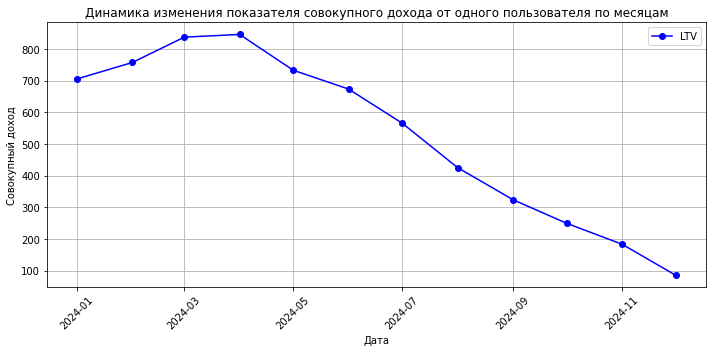

,cohort_month,revenue,user_id,LTV
0,2024-01-01,2105090.29,2985,705.22
1,2024-02-01,2052689.15,2711,757.17
2,2024-03-01,2481937.70,2965,837.08
3,2024-04-01,2456668.31,2905,845.67
4,2024-05-01,2246673.71,3066,732.77
5,2024-06-01,1891357.64,2810,673.08
6,2024-07-01,2480705.40,4388,565.34
7,2024-08-01,1883228.28,4431,425.01
8,2024-09-01,1446349.32,4466,323.86
9,2024-10-01,1107371.11,4440,249.41


In [34]:
# Рассчитываем LTV

merged_df = pd.merge(orders, users, on='user_id', how='inner')

total_revenue = merged_df.groupby('cohort_month')['revenue'].sum().reset_index()

total_users = users.groupby('cohort_month')['user_id'].nunique().reset_index()

ltv_df = pd.merge(total_revenue, total_users, on='cohort_month')
ltv_df['LTV'] = ltv_df['revenue'] / ltv_df['user_id']

# Визуализируем изменение метрики в динамике

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.plot(ltv_df['cohort_month'], ltv_df['LTV'], marker='o', label='LTV', color = 'blue')
plt.title('Динамика изменения показателя совокупного дохода от одного пользователя по месяцам')
plt.xlabel('Дата')
plt.ylabel('Совокупный доход')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Выводим результат в табличном виде

display(ltv_df)

Исходя из построенных графиков, мы видим, что динамика изменения показателя совокупного дохода от одного пользователя положительна с января (**705**) по апрель (**845**). Однако с апреля (**845**) по декабрь (**85**) метрика начала постепенно снижаться

Таким образом, мы можем сделать вывод о том, что при изучении метрики совокупного дохода от одного пользователя, снижение данного показателя наблюдалось с апреля по декабрь 2024 года

Далее изучим изменение показателя показателя затрат на привлечение одного пользователя (`CAC`) в динамике по месяцам

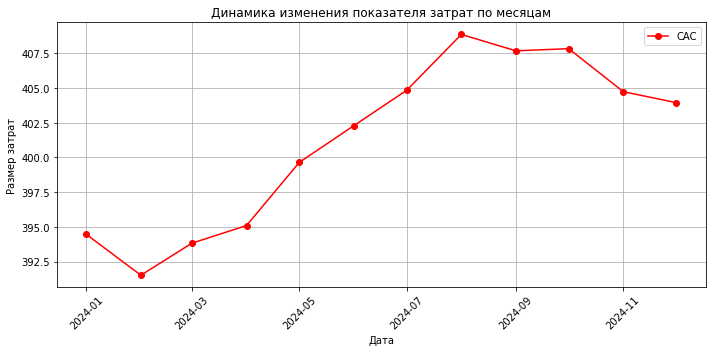

,cohort_month,user_id,spend_month,budget,CAC
0,2024-01-01,2985,2024-01-01,1177456.97,394.46
1,2024-02-01,2711,2024-02-01,1061385.93,391.51
2,2024-03-01,2965,2024-03-01,1167680.37,393.82
3,2024-04-01,2905,2024-04-01,1147739.92,395.09
4,2024-05-01,3066,2024-05-01,1225322.28,399.65
5,2024-06-01,2810,2024-06-01,1130439.77,402.29
6,2024-07-01,4388,2024-07-01,1776446.60,404.84
7,2024-08-01,4431,2024-08-01,1811677.75,408.86
8,2024-09-01,4466,2024-09-01,1820718.83,407.68
9,2024-10-01,4440,2024-10-01,1810802.57,407.84


In [35]:
# Рассчитываем CAC

user_grouped = users.groupby('cohort_month')['user_id'].nunique().reset_index()

cac_grouped = costs[costs['spend_month'] <= '2024-12-31'].groupby('spend_month')['budget'].sum().reset_index()

cac_df = pd.merge(user_grouped, cac_grouped, left_on = 'cohort_month', right_on = 'spend_month')

cac_df['CAC'] = cac_df['budget']/cac_df['user_id']

# Визуализируем изменение метрики в динамике

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.plot(cac_df['spend_month'], cac_df['CAC'], marker='o', label='CAC', color = 'red')
plt.title('Динамика изменения показателя затрат по месяцам')
plt.xlabel('Дата')
plt.ylabel('Размер затрат')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Выводим результат в табличном виде

display(cac_df)

Исходя из построенного графика, мы видим, что динамика изменения показателя затрат на привлечение одного пользователя положительна с февраля (**391**) по август (**408**). Однако с августа (**408**) по декабрь (**404**) метрика начала постепенно снижаться

Таким образом, мы можем сделать вывод о том, что при изучении метрики затрат на привлечение одного пользователя, снижение данного показателя наблюдалось с августа по декабрь 2024 года

Далее проведём совместную визуализацию показателей совокупного дохода от одного пользователя (`LTV`) и стоимости привлечения одного пользователя (`CAC`), поскольку наложение двух графиков друг на друга позволить увидеть, окупаются ли инвестиции или нет

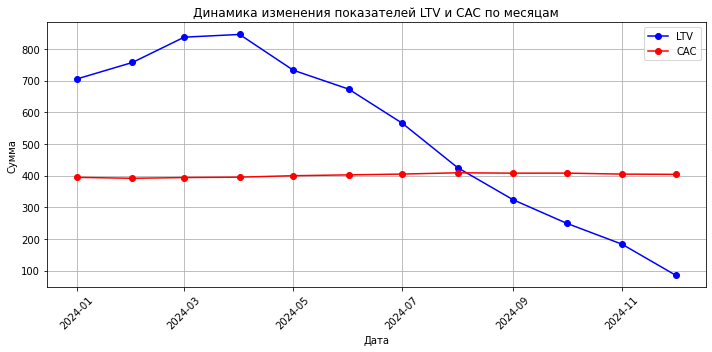

,cohort_month,revenue,user_id,LTV,spend_month,budget,CAC
0,2024-01-01,2105090.29,2985,705.22,2024-01-01,1177456.97,394.46
1,2024-02-01,2052689.15,2711,757.17,2024-02-01,1061385.93,391.51
2,2024-03-01,2481937.70,2965,837.08,2024-03-01,1167680.37,393.82
3,2024-04-01,2456668.31,2905,845.67,2024-04-01,1147739.92,395.09
4,2024-05-01,2246673.71,3066,732.77,2024-05-01,1225322.28,399.65
5,2024-06-01,1891357.64,2810,673.08,2024-06-01,1130439.77,402.29
6,2024-07-01,2480705.40,4388,565.34,2024-07-01,1776446.60,404.84
7,2024-08-01,1883228.28,4431,425.01,2024-08-01,1811677.75,408.86
8,2024-09-01,1446349.32,4466,323.86,2024-09-01,1820718.83,407.68
9,2024-10-01,1107371.11,4440,249.41,2024-10-01,1810802.57,407.84


In [36]:
# Оъединяем данные

ltv_cac_df = pd.merge(ltv_df, cac_df, on = ['cohort_month', 'user_id'])

# Визуализируем изменение метрик в динамике

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.plot(ltv_cac_df['cohort_month'], ltv_cac_df['LTV'], marker='o', label='LTV', color = 'blue')
plt.plot(ltv_cac_df['cohort_month'], ltv_cac_df['CAC'], marker='o', label='CAC', color = 'red')
plt.title('Динамика изменения показателей LTV и CAC по месяцам')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Выводим результат в табличном виде

display(ltv_cac_df)

Исходя из построенного графика, мы видим, что с января по август совокупный доход от одного пользователя превышает расходы на привлечение на одного пользователя. Однако в августе два графика пересекаются: начиная с августа и по декабрь расходы превышают доходы

Таким образом, мы можем сделать вывод о том, что затраты на привлечение окупались с января 2024 по август 2024 и перестали окупаться с августа 2024 по декабрь 2024

Также рассмотрим изменение совокупного дохода от одного пользователя (`LTV`) и размера затрат на привлечение одного пользователя (`CAC`) в зависимости от канала привлечения пользователей для того, чтобы понять: какой именно канал привлечения пользователей не окупается

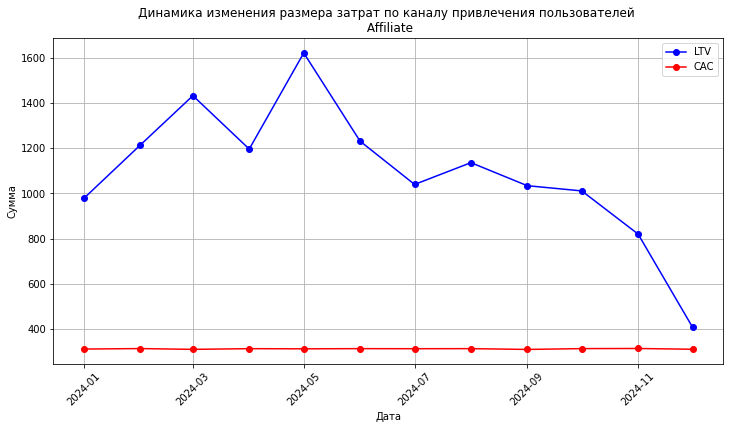

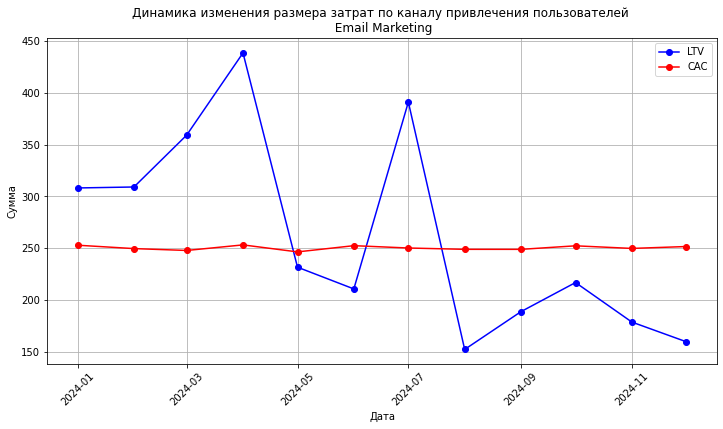

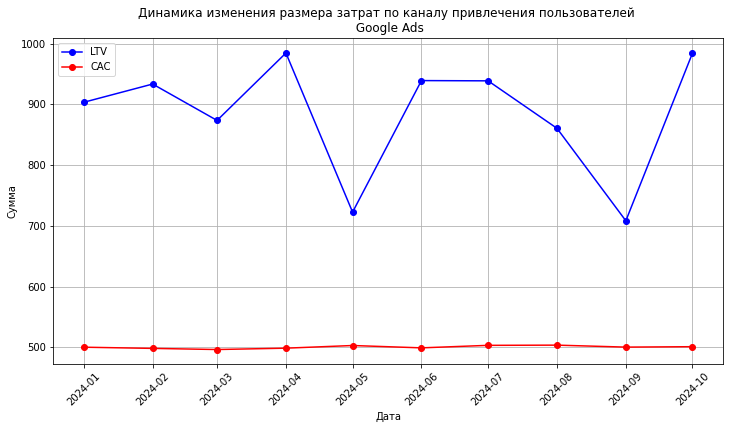

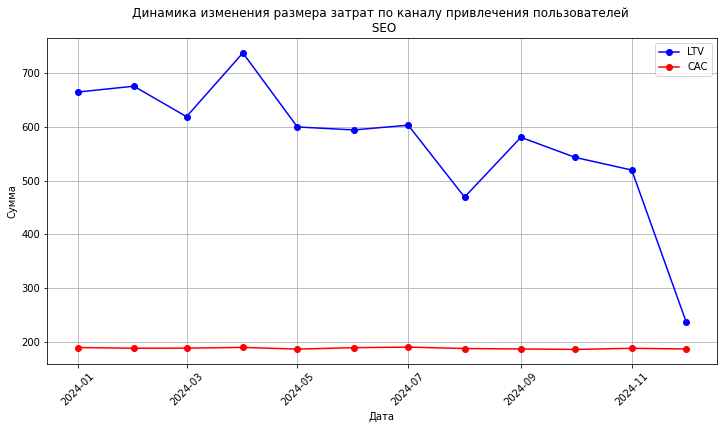

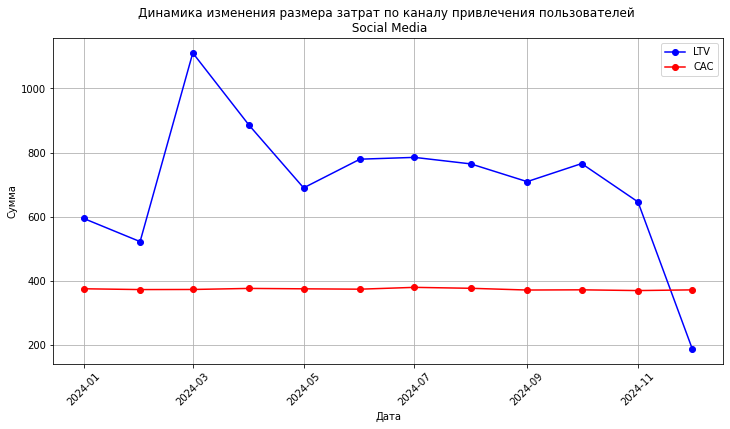

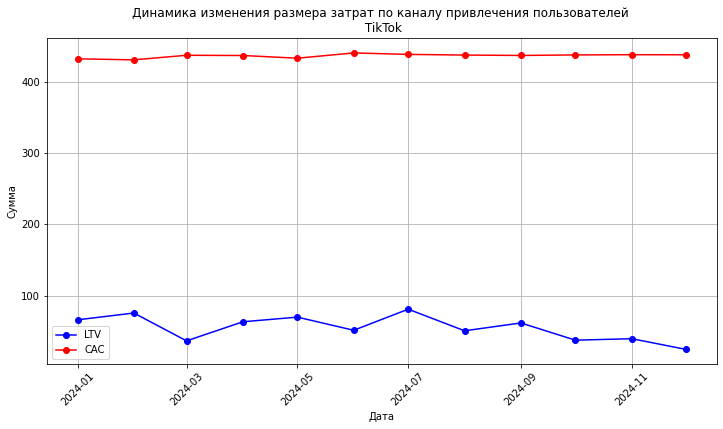

,cohort_month,acq_channel,revenue,user_id,LTV,spend_month,budget,CAC
0,2024-01-01,Affiliate,562577.80,575,978.40,2024-01-01,179343.39,311.90
1,2024-01-01,Email Marketing,53929.99,175,308.17,2024-01-01,44263.61,252.93
2,2024-01-01,Google Ads,1011118.85,1119,903.59,2024-01-01,559875.81,500.34
3,2024-01-01,SEO,210071.38,316,664.78,2024-01-01,59683.72,188.87
4,2024-01-01,Social Media,241290.83,406,594.31,2024-01-01,152268.49,375.05
...,...,...,...,...,...,...,...,...
65,2024-12-01,Affiliate,172565.84,423,407.96,2024-12-01,131535.35,310.96
66,2024-12-01,Email Marketing,22687.03,142,159.77,2024-12-01,35736.71,251.67
67,2024-12-01,SEO,59523.79,252,236.21,2024-12-01,46902.36,186.12
68,2024-12-01,Social Media,51639.86,278,185.75,2024-12-01,103310.43,371.62


In [37]:
# Рассчитываем LTV в зависимости от канала привлечения пользователей

merged_df_acq_channel = pd.merge(orders, users, on='user_id', how='inner')

total_revenue_acq_channel = merged_df_acq_channel.groupby(['cohort_month', 'acq_channel'])['revenue'].sum().reset_index()

total_users_acq_channel = users.groupby(['cohort_month', 'acq_channel'])['user_id'].nunique().reset_index()

ltv_df_acq_channel = pd.merge(total_revenue_acq_channel, total_users_acq_channel, on=['cohort_month', 'acq_channel'])

ltv_df_acq_channel['LTV'] = ltv_df_acq_channel['revenue'] / ltv_df_acq_channel['user_id']

# Рассчитываем CAC в зависимости от канала привлечения пользователей

user_grouped_acq_channel = users.groupby(['cohort_month', 'acq_channel'])['user_id'].nunique().reset_index()

cac_grouped_acq_channel = costs[costs['spend_month'] <= '2024-12-31'].groupby(['spend_month', 'acq_channel'])['budget'].sum().reset_index()

cac_df_acq_channel = pd.merge(user_grouped_acq_channel, cac_grouped_acq_channel, 
                              left_on = ['cohort_month', 'acq_channel'], right_on = ['spend_month', 'acq_channel'])

cac_df_acq_channel['CAC'] = cac_df_acq_channel['budget']/cac_df_acq_channel['user_id']

# Оъединяем данные

ltv_cac_df_acq_channel = pd.merge(ltv_df_acq_channel, cac_df_acq_channel, on = ['cohort_month', 'acq_channel', 'user_id'])

# Цикл для построения графиков по каналам

for channel in ltv_cac_df_acq_channel['acq_channel'].unique():
    plt.figure(figsize=(12, 6))
    df_plot = ltv_cac_df_acq_channel[ltv_cac_df_acq_channel['acq_channel'] == channel]
    plt.plot(df_plot['cohort_month'], df_plot['LTV'], marker='o', color = 'blue', label='LTV')
    plt.plot(df_plot['cohort_month'], df_plot['CAC'], marker='o', color = 'red', label='CAC')
    plt.title(f'Динамика изменения размера затрат по каналу привлечения пользователей \n {channel}')
    plt.xticks(rotation=45)
    plt.xlabel('Дата')
    plt.ylabel('Сумма')
    plt.legend()
    plt.grid(True)
    plt.show()
    
ltv_cac_df_acq_channel

Исходя из построенных графиков, мы видим, что каналы привлечения `Affiliate`, `Google Ads`, `SEO` окупаются на протяжении всего 2024 года: во все месяцы совокупный доход от одного пользователя превышает размер затрат на привлечение одного пользователя

Однако каналы привлечения `Email Marketing`, `Social Media` и `TikTok` испытывают проблемы с окупаемостью:

- Канал привлечения `Email Marketing` не окупается с мая по июнь и с августа по декабрь
- Канал привлечения `Social Media` не окупается в декабре
- Канал привлечения `TikTok` не окупается на протяжении всего 2024 года

Таким образом, мы можем сделать вывод о том, что каналы привлечения `Affiliate`, `Google Ads`, `SEO` покрывают расходы на привлечение клиентов за счёт того, что совокупный доход выше, чем эти расходы. Но каналы привлечения `Email Marketing`, `Social Media` и `TikTok` снижают размер выручки маркетплейса, поскольку расходы на привлечение клиентов выше, чем совокупный доход от пользователей, которые привлекались с помощью этих каналов

Далее изучим изменение показателей окупаемости инвестиций (`ROI`) и периода окупаемости инвестиций (`Payback Period`)

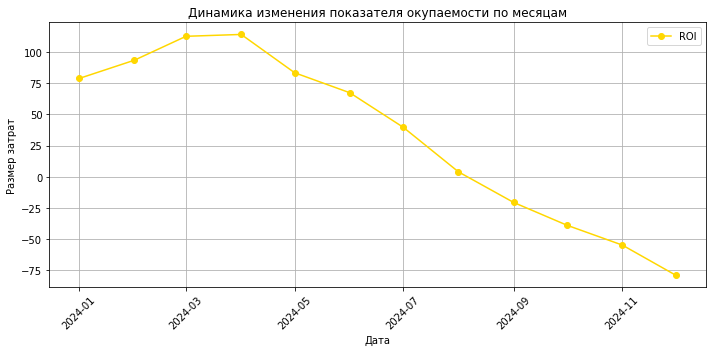

,cohort_month,revenue,user_id,LTV,spend_month,budget,CAC,ROI
0,2024-01-01,2105090.29,2985,705.22,2024-01-01,1177456.97,394.46,78.78
1,2024-02-01,2052689.15,2711,757.17,2024-02-01,1061385.93,391.51,93.40
2,2024-03-01,2481937.70,2965,837.08,2024-03-01,1167680.37,393.82,112.55
3,2024-04-01,2456668.31,2905,845.67,2024-04-01,1147739.92,395.09,114.04
4,2024-05-01,2246673.71,3066,732.77,2024-05-01,1225322.28,399.65,83.35
5,2024-06-01,1891357.64,2810,673.08,2024-06-01,1130439.77,402.29,67.31
6,2024-07-01,2480705.40,4388,565.34,2024-07-01,1776446.60,404.84,39.64
7,2024-08-01,1883228.28,4431,425.01,2024-08-01,1811677.75,408.86,3.95
8,2024-09-01,1446349.32,4466,323.86,2024-09-01,1820718.83,407.68,-20.56
9,2024-10-01,1107371.11,4440,249.41,2024-10-01,1810802.57,407.84,-38.85


In [38]:
# Рассчитываем ROI

ltv_cac_df['ROI'] = (ltv_cac_df['LTV'] - ltv_cac_df['CAC']) / ltv_cac_df['CAC'] * 100

# Визуализируем изменение метрики в динамике

plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.plot(ltv_cac_df['cohort_month'], ltv_cac_df['ROI'], marker='o', label='ROI', color = 'gold')
plt.title('Динамика изменения показателя окупаемости по месяцам')
plt.xlabel('Дата')
plt.ylabel('Размер затрат')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Выводим результат в табличном виде

display(ltv_cac_df)

Исходя из построенного графика, мы видим, что показатель окупаемости маркеплейса увеоичивался с января (**78%**) по апрель (**114%**), а затем с апреля (**114%**) по декабрь (**-78%**) начал снижаться. При этом важно заметить, что с апреля (**114%**) по август (**4%**) маркетплейс так или иначе окупался, а с сентября (**-20%**) по декабрь (**-78%**) - перестал окупаться, то есть, маркетплейс начал нести убытки, которыми не покрывались доходами от пользователей

Таким образом, мы можем сделать вывод о том, что с сентября 2024 года маркетплейс перестал окупаться и приносить прибыль

**Промежуточный вывод**

Оценка метрик монетизации и юнит-экономики показала:

- Снижение рентабельности пользователя. Совокупный доход от одного пользователя (`LTV`) превышал затраты на его привлечение (`CAC`) с января по август 2024 года, однако с августа по декабрь ситуация сменилась на убыточную — `CAC` стал превышать `LTV`

- Ухудшение ключевых метрик. Основной причиной убыточности стало последовательное снижение `LTV` с апреля по декабрь 2024 года, в то время как `CAC` начал несущественно снижаться лишь с августа и оставался практически на прежнем уровне. Доходы - снижаются, затраты - остаются прежними, следовательно - снижается уровень выручки

- Неоднородная эффективность каналов привлечения. Рентабельность бизнеса в целом поддерживается за счет каналов `Affiliate`, `Google Ads` и `SEO`, которые стабильно окупаются. Некие трудности создают каналы `Email Marketing`, `Social Media`, которые периодически не окупались. Ключевая проблема заключается в канале привлечения `TikTok`, который на окупался на протяжении всего года, что сильно повлияло на снижение `LTV`, и, следовательно, снижение окупаемости инвестиций маркетплейса

- Ухудшение показателя окупаемости. Показатель окупаемости маркетплейса достиг пика в апреле (**114%**), после чего начал снижаться. С сентября по декабрь бизнес перестал окупаться и стал приносить убытки.

## Выводы по этапам 2 и 3


На основе обзора ключевых метрик и оценки метрик монетизации и юнит-экономики можно сделать следующие выводы:
    
- Кризис удержания и лояльности пользователей. Наиболее критичная проблема — резкое снижение показателя удержания `Retention Rate`, что напрямую ведет к снижению показателя совокупного дохода от одного пользователя (LTV) и потере активной аудитории (`DAU`, `WAU`, `MAU`)

- Ухудшение монетизации и рентабельности. Начиная с августа 2024 года бизнес стал убыточным: затраты на привлечение пользователя (`CAC`) превысили доход от него (`LTV`). Это является прямым следствием проблем с удержанием и снижением конверсии (`CR`)

- Неэффективное распределение маркетингового бюджета. Общая рентабельность сильно страдает из-за канала `TikTok`, который не окупался в течение всего года. В то же время, такие каналы, как `Affiliate`, `Google Ads` и `SEO`, остаются стабильно прибыльными

- Нестабильность ключевых показателей. Позитивный рост выручки (`Revenue`) и конверсии (`CR`) в первой половине 2024 года сменился их спадом во второй, что указывает на отсутствие устойчивой положительной динамики и наличие системных проблем в продукте или маркетинге

- Потеря общей окупаемости бизнеса. После пика в апреле показатель окупаемости маркетплейса начал снижаться, и с сентября по декабрь бизнес перестал окупаться, начав приносить убытки.

## 4. Поиск инсайтов, точек роста и сегментация


Начнём с построения и визуализации общей воронки (по всем данным), затем опишем пользовательский путь: какие этапы представлены, какова их последовательность, на каком (или на каких) этапах теряется большая часть новых пользователей.

При решении построим две воронки: 
- **классическую воронку** — доля от первого шага в процентах
- **step-by-step** — с конверсией от предыдущего этапа.

Предполагается, что пользователь проходит такой путь к совершению покупки:

1. `page_view` - Открытие любой страницы сайта или приложения пользователем.
2. `product_click` - Клик по товару (например, из списка товаров или на баннере).
2. `add_to_cart` - Добавление товара в корзину.
2. `checkout_start` - Начало оформления заказа (переход к оформлению корзины).
2. `checkout_complete` - Завершение оформления заказа (не гарантирует покупку, покупка зависит от факта оплаты).

Начнём с построения **классической** воронки, которая будет отражать долю от первого шага в процентах. Представим её в виде таблицы, куда также добавим **step-by-step** воронку для удобства анализа и построения визуализации

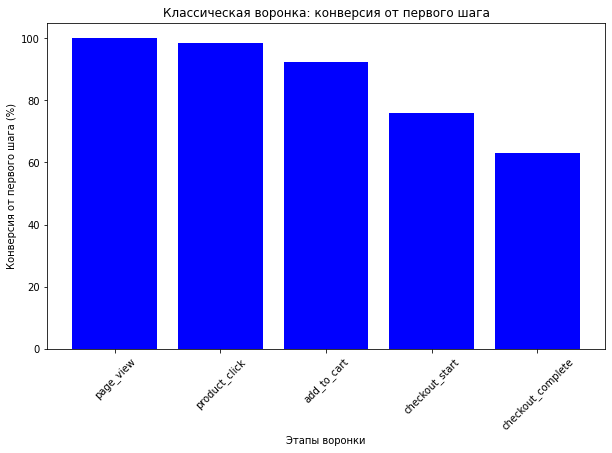

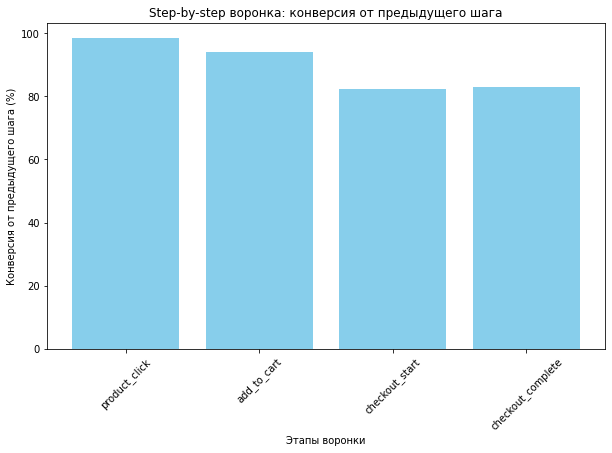

,step,users,conversion_from_first_%,conversion_from_previous_%
0,page_view,22098,100.00,NaN
1,product_click,21745,98.40,98.40
2,add_to_cart,20411,92.40,93.90
3,checkout_start,16769,75.90,82.20
4,checkout_complete,13897,62.90,82.90


In [39]:
# Задаем порядок шагов в воронке

funnel_steps = ['page_view', 'product_click', 'add_to_cart', 'checkout_start', 'checkout_complete']

# Фильтруем датасет оставляя только нужные шаги воронки

funnel_event_steps = events[events['event_type'].isin(funnel_steps)]

# Считаем число уникальных пользователей на каждом шаге

funnel_counts = funnel_event_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)

# Собираем таблицу воронки

funnel_event = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})

# Строим классическую воронку

funnel_event['conversion_from_first_%'] = (funnel_event['users'] / funnel_event['users'].iloc[0] * 100).round(1)

# Визуализируем классическую воронку

plt.figure(figsize=(10, 6))
plt.bar(funnel_event['step'], funnel_event['conversion_from_first_%'], color='blue')
plt.title('Классическая воронка: конверсия от первого шага')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.xticks(rotation = 45)
plt.show()

# Строим step-by-step воронку

funnel_event['conversion_from_previous_%'] = (funnel_event['users'] / funnel_event['users'].shift(1) * 100).round(1)

# Визуализируем step-by-step воронку

plt.figure(figsize=(10, 6))
plt.bar(funnel_event['step'][1:], funnel_event['conversion_from_previous_%'][1:], color='skyblue')
plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.xticks(rotation = 45)
plt.show()

# Выводим таблицу воронки

display(funnel_event)

После построения **классической** воронки можно увидеть, что конверсия шагов от первого шага изменяется стабильно, без резких снижений. Конверсия в целевое действие (`checkout_complete`) составляет 62%, что является неплохим показателем на конкурентном рынке маркетплейсов

После построения **step-by-step** воронки наибольшая потеря пользователей происходит на этапах начала оформления заказа `checkout_start` (**82%** пользователей продолжают свой путь) и завершения оформления заказа `checkout_complete` (**82%** пользователей продолжают свой путь).

На основе построенных воронок, отражающих путь пользователя от этапа открытия страницы маркетплейса до этапа завершения оформления заказа, мы можем сделать вывод о том, что резких спадов в показателях конверсии - не наблюдается: от шага к шага конверсия снижается стабильно и постепенно. Конверсия целевого действия - высока (**62%**), а построение `step-by-step` воронки показало, что наибольшая потеря пользователей - несущественна (менее **20%** на финальных этапах воронки)

Однако стоит изучить не только общий пользовательский путь, но и поведение пользователей в зависимости от канала привлечения. Для этого построим **классическую** и **step-by-step** воронку в разрезе различных каналов привлечения

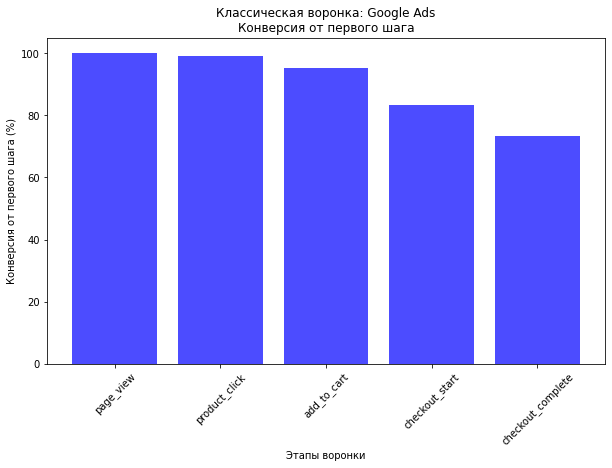

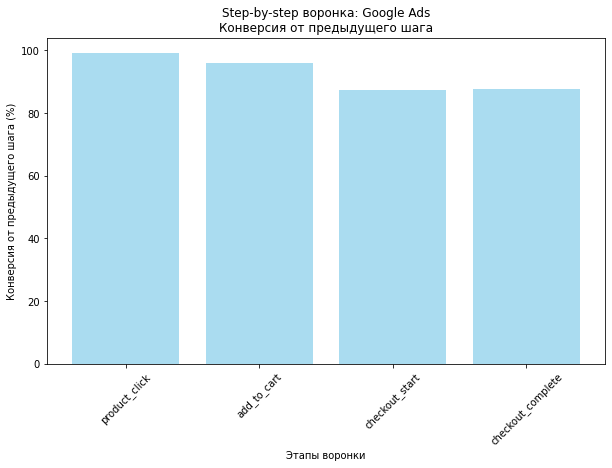

Статистика воронки для канала Google Ads:


,step,users,conversion_from_first_%,conversion_from_previous_%
0,page_view,5611,100.00,NaN
1,product_click,5561,99.10,99.10
2,add_to_cart,5344,95.20,96.10
3,checkout_start,4676,83.30,87.50
4,checkout_complete,4105,73.20,87.80


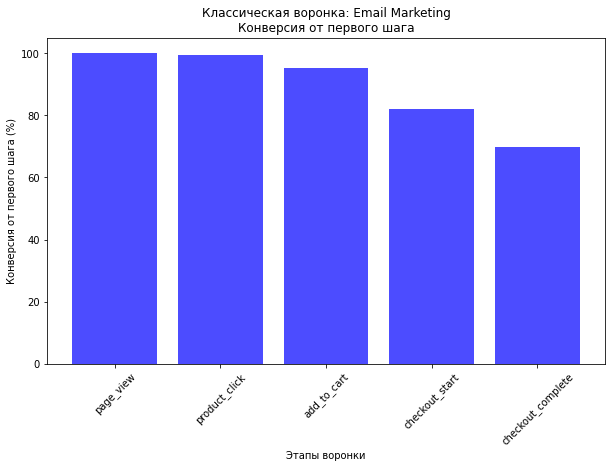

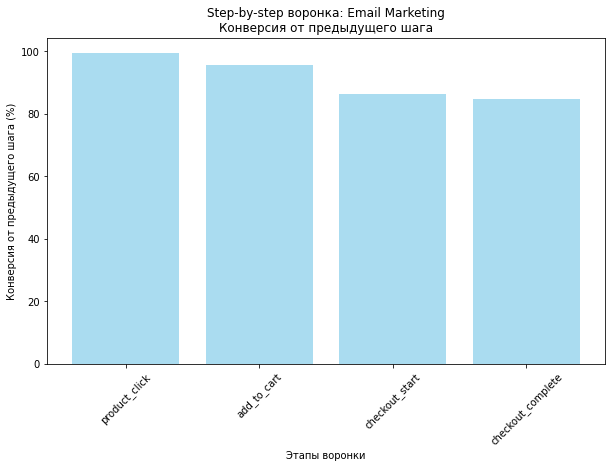

Статистика воронки для канала Email Marketing:


,step,users,conversion_from_first_%,conversion_from_previous_%
0,page_view,1272,100.00,NaN
1,product_click,1265,99.40,99.40
2,add_to_cart,1210,95.10,95.70
3,checkout_start,1045,82.20,86.40
4,checkout_complete,887,69.70,84.90


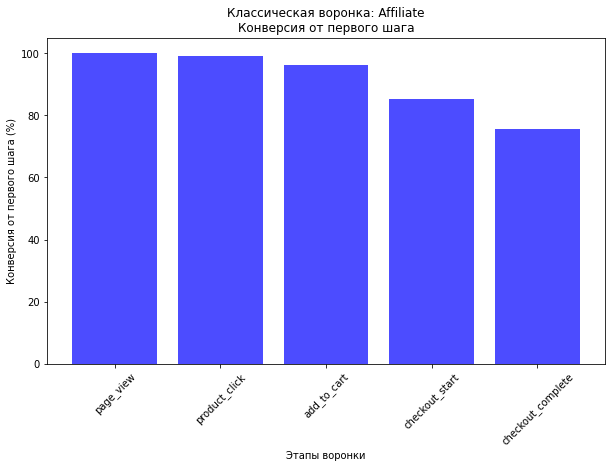

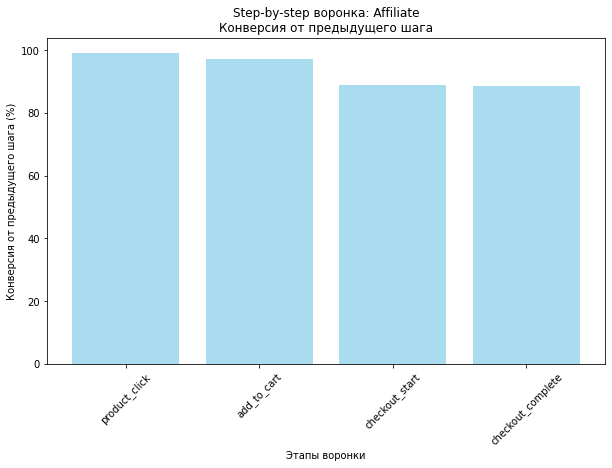

Статистика воронки для канала Affiliate:


,step,users,conversion_from_first_%,conversion_from_previous_%
0,page_view,3676,100.00,NaN
1,product_click,3638,99.00,99.00
2,add_to_cart,3531,96.10,97.10
3,checkout_start,3136,85.30,88.80
4,checkout_complete,2774,75.50,88.50


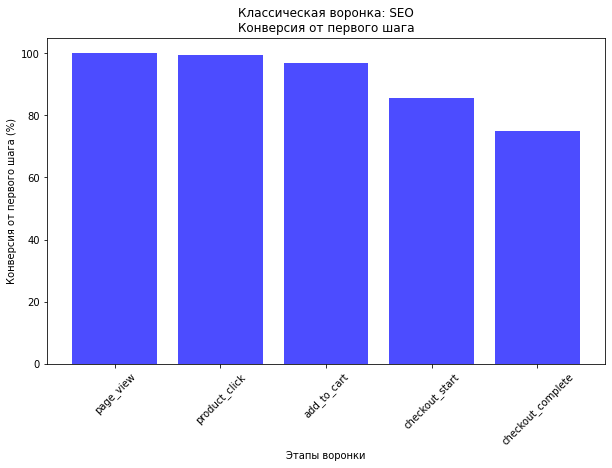

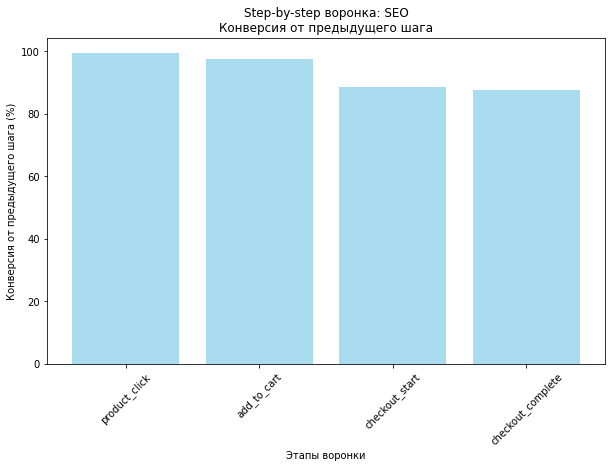

Статистика воронки для канала SEO:


,step,users,conversion_from_first_%,conversion_from_previous_%
0,page_view,2163,100.00,NaN
1,product_click,2147,99.30,99.30
2,add_to_cart,2091,96.70,97.40
3,checkout_start,1853,85.70,88.60
4,checkout_complete,1620,74.90,87.40


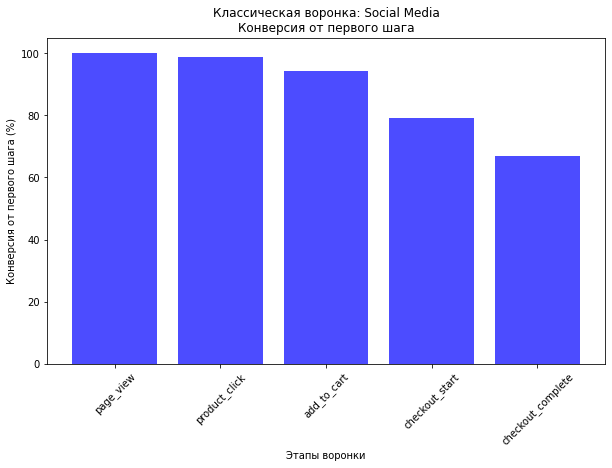

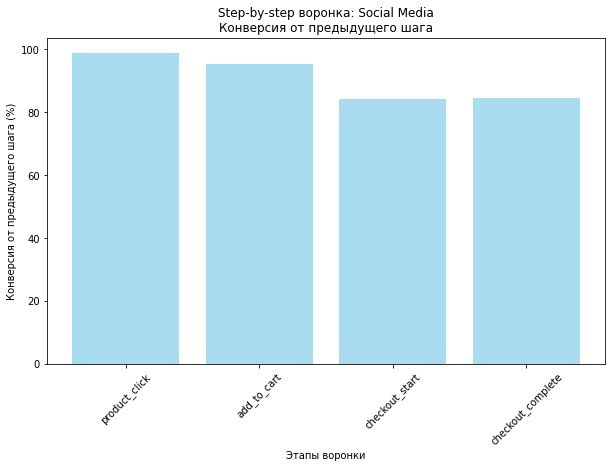

Статистика воронки для канала Social Media:


,step,users,conversion_from_first_%,conversion_from_previous_%
0,page_view,2189,100.00,NaN
1,product_click,2162,98.80,98.80
2,add_to_cart,2062,94.20,95.40
3,checkout_start,1734,79.20,84.10
4,checkout_complete,1467,67.00,84.60


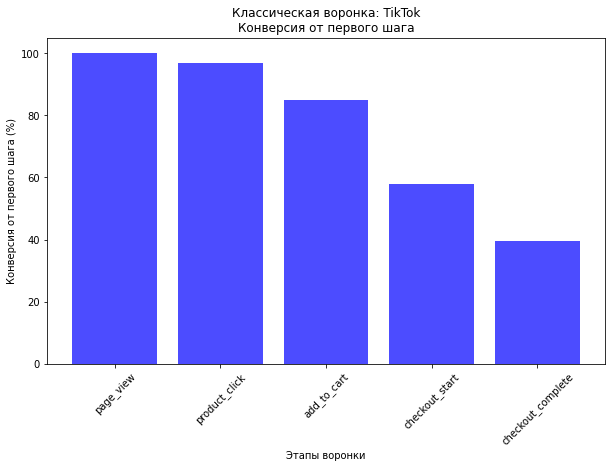

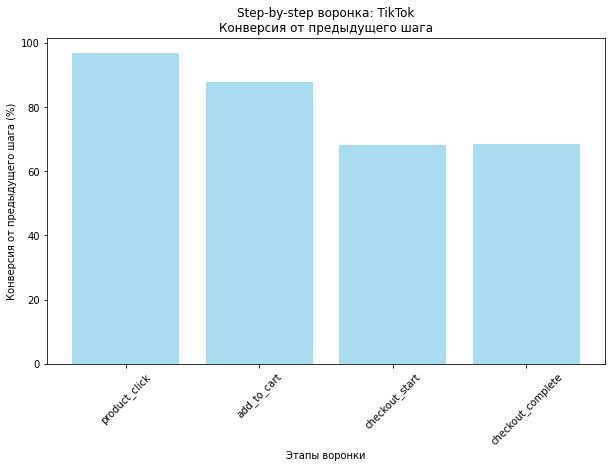

Статистика воронки для канала TikTok:


,step,users,conversion_from_first_%,conversion_from_previous_%
0,page_view,6651,100.00,NaN
1,product_click,6438,96.80,96.80
2,add_to_cart,5649,84.90,87.70
3,checkout_start,3849,57.90,68.10
4,checkout_complete,2633,39.60,68.40


In [40]:
# Задаем порядок шагов в воронке
funnel_steps = ['page_view', 'product_click', 'add_to_cart', 'checkout_start', 'checkout_complete']

# Получаем список уникальных каналов привлечения
acq_channels = users['acq_channel'].unique()

# Создаем цикл по каналам привлечения
for channel in acq_channels:
    
    # Фильтруем пользователей по каналу привлечения
    channel_users = users[users['acq_channel'] == channel]['user_id']
    
    # Фильтруем события для пользователей этого канала
    channel_events = events[events['user_id'].isin(channel_users)]
    
    # Фильтруем датасет оставляя только нужные шаги воронки
    funnel_event_steps = channel_events[channel_events['event_type'].isin(funnel_steps)]
    
    # Считаем число уникальных пользователей на каждом шаге
    funnel_counts = funnel_event_steps.groupby('event_type')['user_id'].nunique().reindex(funnel_steps)
    
    # Собираем таблицу воронки
    funnel_event = pd.DataFrame({
        'step': funnel_steps,
        'users': funnel_counts.values
    })
    
    # Строим классическую воронку
    funnel_event['conversion_from_first_%'] = (funnel_event['users'] / funnel_event['users'].iloc[0] * 100).round(1)
    
    # Визуализируем классическую воронку
    plt.figure(figsize=(10, 6))
    plt.bar(funnel_event['step'], funnel_event['conversion_from_first_%'], color='blue', alpha=0.7)
    plt.title(f'Классическая воронка: {channel}\nКонверсия от первого шага')
    plt.ylabel('Конверсия от первого шага (%)')
    plt.xlabel('Этапы воронки')
    plt.xticks(rotation=45)
    plt.show()
    
    # Строим step-by-step воронку
    funnel_event['conversion_from_previous_%'] = (funnel_event['users'] / funnel_event['users'].shift(1) * 100).round(1)
    
    # Визуализируем step-by-step воронку
    plt.figure(figsize=(10, 6))
    plt.bar(funnel_event['step'][1:], funnel_event['conversion_from_previous_%'][1:], color='skyblue', alpha=0.7)
    plt.title(f'Step-by-step воронка: {channel}\nКонверсия от предыдущего шага')
    plt.ylabel('Конверсия от предыдущего шага (%)')
    plt.xlabel('Этапы воронки')
    plt.xticks(rotation=45)
    plt.show()
    
    # Выводим таблицу воронки для текущего канала
    print(f"Статистика воронки для канала {channel}:")
    display(funnel_event)

Исходя из построенных **классических** и **step-by-step** воронок для различных каналов привлечения пользователей, мы видим:

- Воронки для каналов привлечения `Google Ads`, `Email Marketing`, `Affiliate`, `SEO`, `Social Media` выглядят практически одинаково: значения конверсий находятся около показателей конверсии из общих воронок
- Воронки для канала привлечения `TikTok` сильно отличаются от воронок остальных каналов привлечения. Отличия **классической** воронки:
    - Этап добавления товара в корзину (`add_to_cart`) - конверсия на данном этапе на **10%** ниже по сравнению с показателями конверсии на данном этапе у остальных каналов привлечения
    - Этап начала оформления заказа (`checkout_start`) - конверсия на данном этапе на **25%** ниже по сравнению с показателями конверсии на данном этапе у остальных каналов привлечения
    - Этап завершения оформления заказа (`checkout_complete` - целевое действие) - на **25%** ниже по сравнению с показателями конверсии на данном этапе у остальных каналов привлечения
- Отличия **step-by-step** воронки:
    - Конверсия перехода с этапа клика по товару (`product_click`) в этап добавления товара в корзину (`add_to_cart`) на **10%** ниже по сравнению с показателями конверсии при переходе на данный этап у остальных каналов привлечения
    - Конверсия перехода с этапа добавления товара в корзину (`add_to_cart`) в этап начала оформления заказа (`checkout_start`) на **20%** ниже по сравнению с показателями конверсии при переходе на данный этап у остальных каналов привлечения
    - Конверсия перехода с этапа начала оформления заказа (`checkout_start`) в этап (`checkout_complete` - целевое действие) на **20%** ниже по сравнению с показателями конверсии при переходе на данный этап у остальных каналов привлечения
    
Таким образом, мы можем сделать вывод о том, что наибольшая потеря пользователей происходит на этапе завершения оформления заказа (`checkout_complete`) для пользователей, привлечённых с помощью канала привлечения `TikTok`

На этапе обзора ключевых метрик мы выяснили, что уровень общей выручки начал снижаться с августа 2024 года. Для того, чтобы понять, с чем связано снижение данной метрики, необходимо разобраться в причинах, связанных с уменьшением размера выручки. Для этого мы выделим ключевые признаки для сегментации и углубимся в исследование сегментов пользователей

Признаки, которые могут помочь выявить причины падения выручки:

- `gender` - пол
- `region` - регион
- `acq_channel` - канал привлечения
- `buyer_segment` - сегмент покупателя
- `os` - операционная система
- `device` - тип устройства

Если в результате анализа окажется, что в некоторых сегментах снижение не наблюдалось, их можно будет исключить из анализа. Это значительно сократит время и усилия на поиск.

Начнём с визуализации месячной динамики выручки для каждого признака сегментации

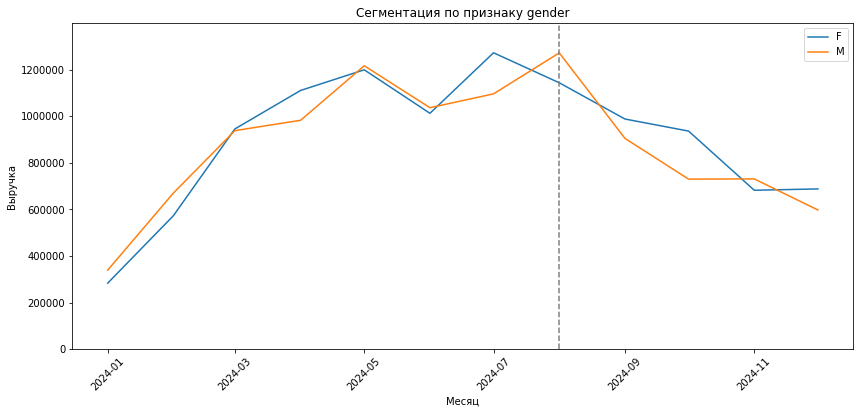

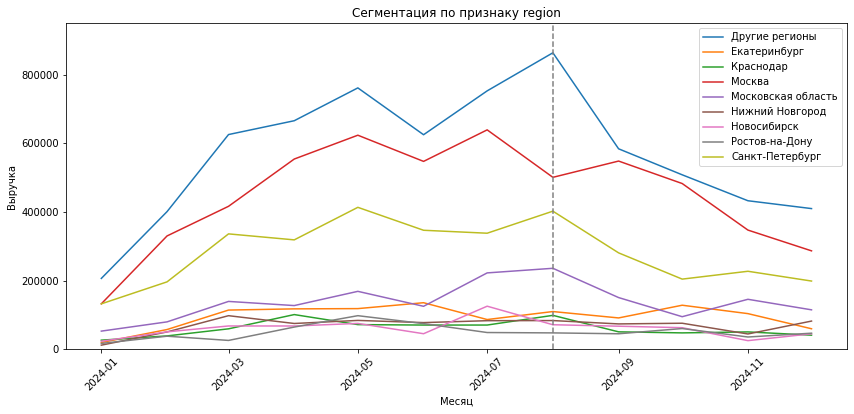

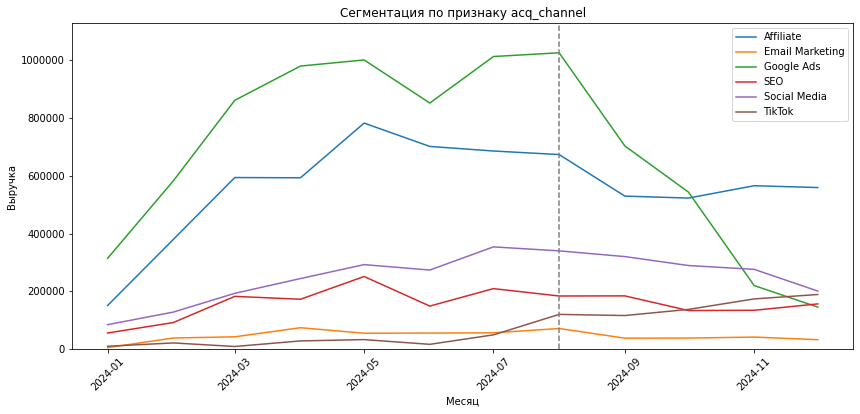

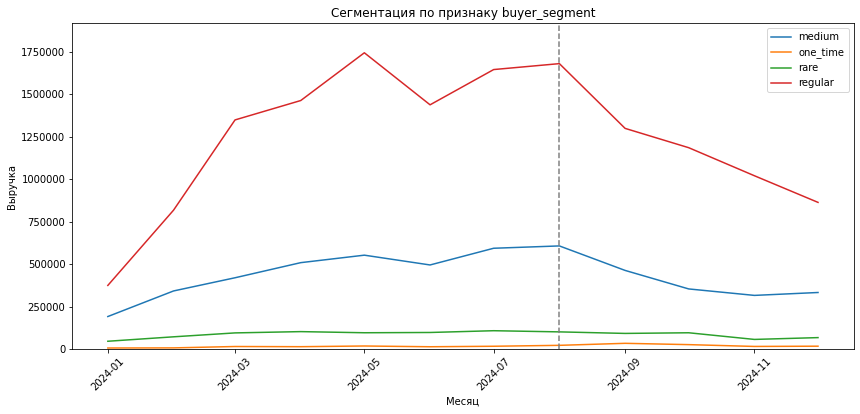

In [41]:
# Подгатавливаем данные

df = pd.merge(orders[['user_id', 'order_month', 'quantity', 'unit_price', 'revenue']], users[['user_id', 'gender', 'region', 'acq_channel', 'buyer_segment']], how = 'left', on = 'user_id')

# Определение переиспользуемой функции для построения графиков по сегментам

def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
    
    # Логика построения линейных графиков для каждого уникального сегмента
    
    # Группировка данных по месяцам и категориям, суммирование количества товара, цены товара и выручки
    
    df_gp = data.groupby(['order_month', segmentation_attribute])[['quantity', 'unit_price', 'revenue']].sum().reset_index()

    # Получение всех уникальных сегментов
    
    segments = df_gp[segmentation_attribute].unique()

    # Указываем размеры графика
    plt.figure(figsize=(14, 6))
    plt.ticklabel_format(style='plain')
    
    # Для каждого уникального сегмента строим линейный график
    for segment in segments:
        df_plot = df_gp[df_gp[segmentation_attribute] == segment]
        plt.plot(df_plot['order_month'], df_plot['revenue'], label=segment)

    # Устанавливаем минимальные и максимальные значения для оси y
    max_revenue = df_gp['revenue'].max()
    plt.ylim(0, max_revenue * 1.1)

    # Добавляем вертикальную пунктирную линию в августе 2024 - дата начала кризиса.
    crisis_date = pd.to_datetime('2024-08-01')
    plt.axvline(x=crisis_date, color='gray', linestyle='--')

    # Устанавливаем заголовок графика
    plt.title(f'Сегментация по признаку {segmentation_attribute}')

    # Устанавливаем подписи осей
    plt.xlabel("Месяц")
    plt.ylabel("Выручка")

    # Добавляем легенду
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Вызов функции для признака страны
plot_segments(df, 'gender')

# Вызов функции для признака источника трафика
plot_segments(df, 'region')

# Вызов функции для признака страны
plot_segments(df, 'acq_channel')

# Вызов функции для признака источника трафика
plot_segments(df, 'buyer_segment')

Исходя из построенных графиков, мы можем увидеть:
    
- `Сегментация по признаку gender`: существенное уменьшение общего размера выручки характерно как для мужчин `M`, так и для женщин `F`
- `Сегментация по признаку region`: существенное уменьшение общего размера выручки характерно для регионов `Другие регионы`, `Москва`, `Санкт-Петербург` и `Московская область`
- `Сегментация по признаку acq_channel`: существенное уменьшение общего размера выручки характерно для канала привлечения `Google Ads`
- `Сегментация по признаку buyer_segment`: существенное уменьшение общего размера выручки характерно для регулярных пользователей `regular`

Таким образом, мы делаем вывод о том, что благодаря сегментации нам удалось определить, что снижение локализовано для мужчин и женщин из регионов `Москва`, `Московская область`, `Санкт-Петербург` и `Другие регионы`, которые привлекались с помощью канала `Google Ads` и являются регулярными пользователями маркетплейса

Эта информация поможет нам сузить круг поиска, значительно упростив анализ. Теперь необходимо провести чуть более детальное исследование для локализации причин спада. 

Наша текущая цель — найти комбинации признаков, которые помогли бы объяснить аномальную динамику выручки. Иными словами, попытаться выявить взаимодействие признаков, сегменты которого максимально бы отклонялись от общего паттерна.

Изучим комбинации:

- пол `gender` + регион `region`
- пол `gender` + канал привлечения `acq_channel`
- пол `gender` + сегмент покупателя `buyer_segment`
- регион `region` + канал привлечения `acq_channel`
- регион `region` + сегмент покупателя `buyer_segment`
- канал привлечения `acq_channel` + сегмент покупателя `buyer_segment`

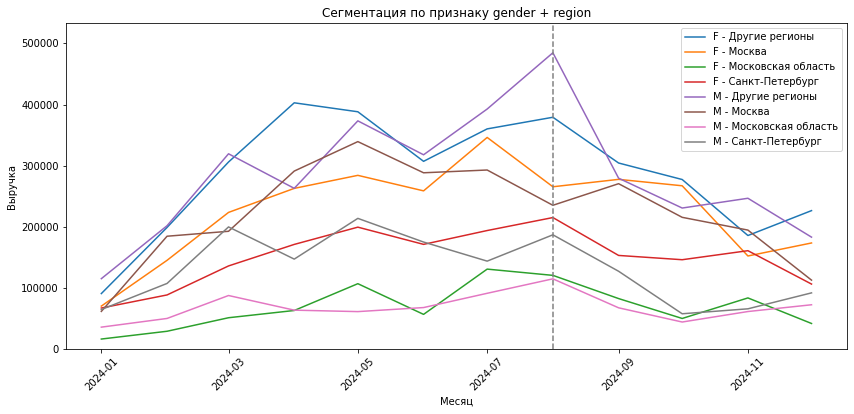

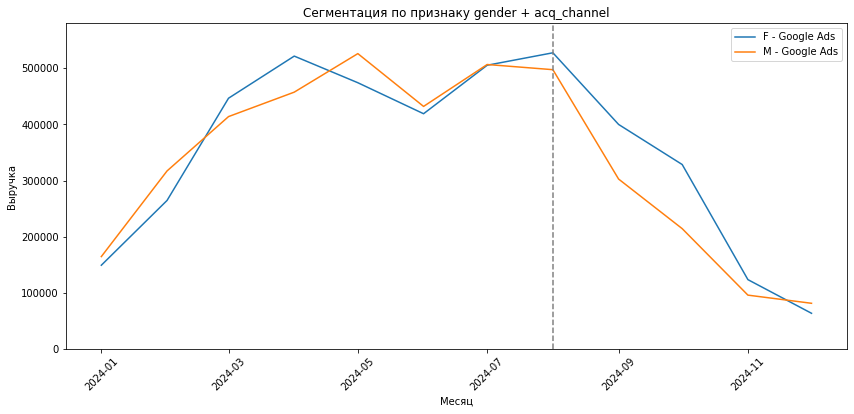

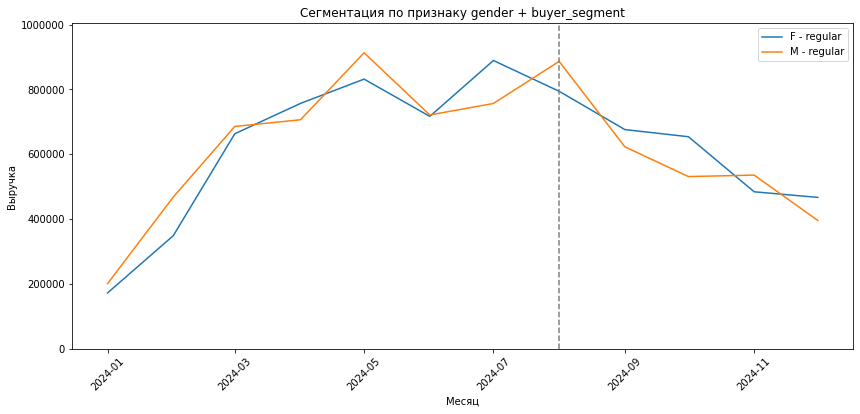

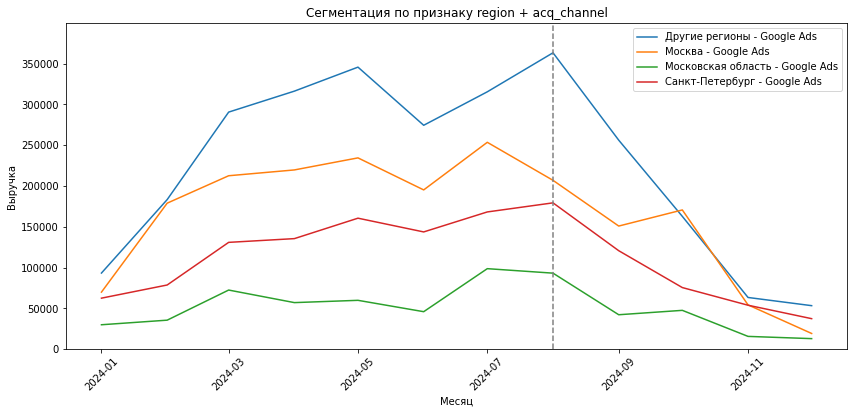

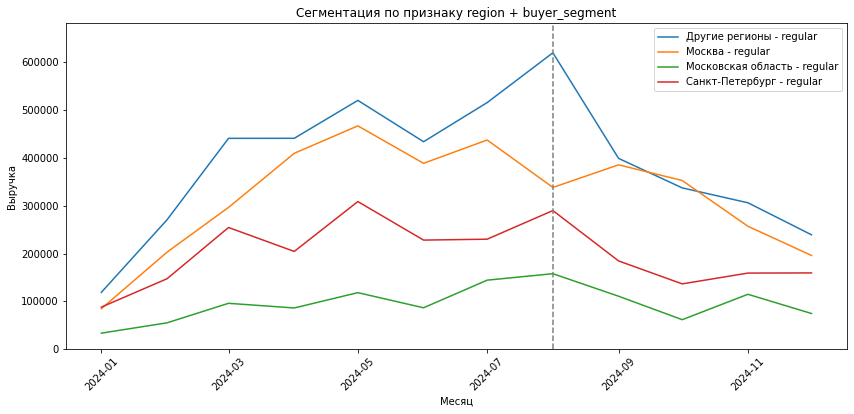

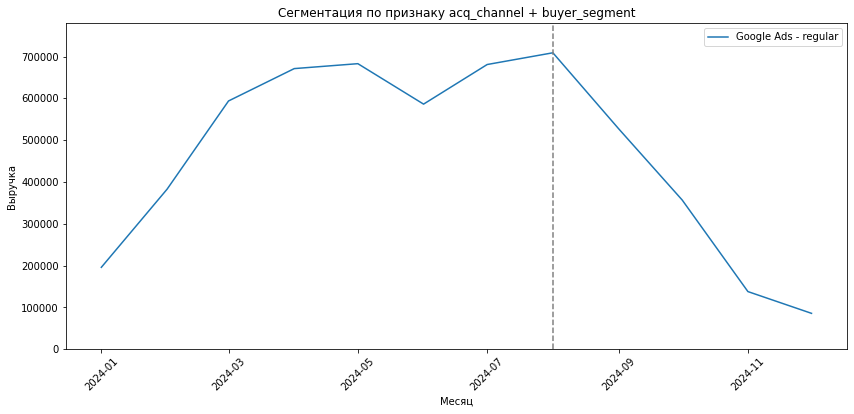

In [42]:
# Фильтруем данные по нужным регионам

df_msc_spb_other_regions = df[df['region'].isin(['Москва', 'Московская область', 'Санкт-Петербург', 'Другие регионы'])].copy()

# Задаём названия атрибутов для комбинированного признака
first_attr = "gender"
second_attr = "region"
combine_attr = f"{first_attr} + {second_attr}"

# Создаём комбинированный признак "страна + категория"
df_msc_spb_other_regions[combine_attr] = df_msc_spb_other_regions[first_attr] + ' - ' + df_msc_spb_other_regions[second_attr]

# Вызов функции для комбинированного признака страны и категории
plot_segments(df_msc_spb_other_regions, combine_attr)

# Фильтруем данные по нужному каналу привлечения

df_google_ads = df[df['acq_channel'].isin(['Google Ads'])].copy()

# Задаём названия атрибутов для комбинированного признака
first_attr = "gender"
second_attr = "acq_channel"
combine_attr = f"{first_attr} + {second_attr}"

# Создаём комбинированный признак "страна + категория"
df_google_ads[combine_attr] = df_google_ads[first_attr] + ' - ' + df_google_ads[second_attr]

# Вызов функции для комбинированного признака страны и категории
plot_segments(df_google_ads, combine_attr)

# Фильтруем данные по нужному сегменту покупателя

df_regular = df[df['buyer_segment'].isin(['regular'])].copy()

# Задаём названия атрибутов для комбинированного признака
first_attr = "gender"
second_attr = "buyer_segment"
combine_attr = f"{first_attr} + {second_attr}"

# Создаём комбинированный признак "страна + категория"
df_regular[combine_attr] = df_regular[first_attr] + ' - ' + df_regular[second_attr]

# Вызов функции для комбинированного признака страны и категории
plot_segments(df_regular, combine_attr)

# Фильтруем данные по нужному региону и каналу привлечения

df_region_acq_channel = df[(df['region'].isin(['Москва', 'Московская область', 'Санкт-Петербург', 'Другие регионы'])) & 
                (df['acq_channel'].isin(['Google Ads']))].copy()

# Задаём названия атрибутов для комбинированного признака
first_attr = "region"
second_attr = "acq_channel"
combine_attr = f"{first_attr} + {second_attr}"

# Создаём комбинированный признак "страна + категория"
df_region_acq_channel[combine_attr] = df_region_acq_channel[first_attr] + ' - ' + df_region_acq_channel[second_attr]

# Вызов функции для комбинированного признака страны и категории
plot_segments(df_region_acq_channel, combine_attr)

# Фильтруем данные по нужному региону и сегменту покупателя

df_region_buyer_segment = df[(df['region'].isin(['Москва', 'Московская область', 'Санкт-Петербург', 'Другие регионы'])) & 
                       (df['buyer_segment'].isin(['regular']))].copy()

# Задаём названия атрибутов для комбинированного признака
first_attr = "region"
second_attr = "buyer_segment"
combine_attr = f"{first_attr} + {second_attr}"

# Создаём комбинированный признак "страна + категория"
df_region_buyer_segment[combine_attr] = df_region_buyer_segment[first_attr] + ' - ' + df_region_buyer_segment[second_attr]

# Вызов функции для комбинированного признака страны и категории
plot_segments(df_region_buyer_segment, combine_attr)

# Фильтруем данные по нужному каналу привелчения и сегменту покупателя

df_acq_channel_buyer_segment = df[(df['acq_channel'].isin(['Google Ads'])) & (df['buyer_segment'].isin(['regular']))].copy()

# Задаём названия атрибутов для комбинированного признака
first_attr = "acq_channel"
second_attr = "buyer_segment"
combine_attr = f"{first_attr} + {second_attr}"

# Создаём комбинированный признак "страна + категория"
df_acq_channel_buyer_segment[combine_attr] = df_acq_channel_buyer_segment[first_attr] + ' - ' + df_acq_channel_buyer_segment[second_attr]

# Вызов функции для комбинированного признака страны и категории
plot_segments(df_acq_channel_buyer_segment, combine_attr)

Исходя из построенных графиков, мы можем увидеть:
    
- Для различных комбинаций, в которых учитывались пользователи разных полов (признак `gender`), выручка снижается одинаково как для мужчин, так и для женщин. Следовательно, данный признак можно исключить из анализа, поскольку существенных различий в изменений размера выручки разных полов - нет
- Для различных комбинаций, в которых учитывались пользователи разных регионов (признак `region`), сегментация подтвердила существенное снижение показателя выручки для регионов `Москва`, `Московская область`, `Санкт-Петербург` и `Другие регионы`
- Для различных комбинаций, в которых учитывались пользователи из канала привлечения `Google Ads` (признак `acq_channel`), сегментация подтвердила существенное снижение показателя выручки для данного канала привлечения
- Для различных комбинаций, в которых учитывались пользователи с регулярной активностью `regular` (признак `buyer_segment`), сегментация подтвердила существенное снижение показателя выручки для данного сегмента покупателя

Теперь остаётся изучить комбинацию регион `region` + канал привлечения `acq_channel` + сегмент покупателя `buyer_segment`

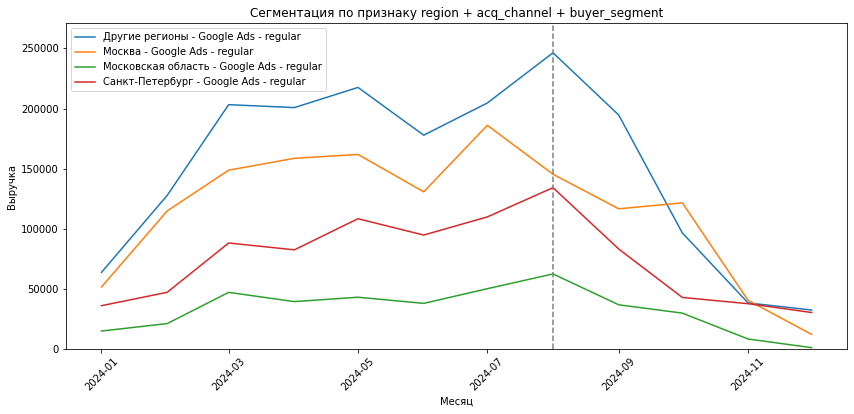

In [43]:
# Фильтруем данные по нужному региону, каналу привелчения и сегменту покупателя

df_region_acq_channel_buyer_segment = df[(df['region'].isin(['Москва', 'Московская область', 'Санкт-Петербург', 'Другие регионы'])) &
                                         (df['acq_channel'].isin(['Google Ads'])) &
                                         (df['buyer_segment'].isin(['regular']))].copy()

# Задаём названия атрибутов для комбинированного признака
first_attr = "region"
second_attr = "acq_channel"
third_attr = "buyer_segment"
combine_attr = f"{first_attr} + {second_attr} + {third_attr}"

# Создаём комбинированный признак "страна + категория"
df_region_acq_channel_buyer_segment[combine_attr] = df_region_acq_channel_buyer_segment[first_attr] + ' - ' \
                                           + df_region_acq_channel_buyer_segment[second_attr] + ' - ' \
                                           + df_region_acq_channel_buyer_segment[third_attr]

# Вызов функции для комбинированного признака страны и категории
plot_segments(df_region_acq_channel_buyer_segment, combine_attr)

Исходя из построенных графиков, мы можем увидеть, что сегментация по признаку **регион `region` + канал привлечения `acq_channel` + сегмент покупателя `buyer_segment`** подтвердила существенное снижение показателя выручки для пользователей из регионов `Москва`, `Московская область`, `Санкт-Петербург` и `Другие регионы`, которые привлекались с помощью канала `Google Ads` и являются регулярными пользователями маркетплейса

Однако этого недостаточно, чтобы понять, что именно происходит с пользователями и их поведением.

Категориальные метрики позволили локализовать проблему, теперь важно найти её первопричину. Для этого проанализируем непрерывные признаки, которые показывают динамику и интенсивность процессов, скрытые за средними значениями метрик.

Набор непрерывных признаков - известен:

- `quantity` - количество единиц товара в заказе.
- `unit_price` - цена за одну единицу товара.
- `revenue` - выручка

Создадим датафрейм, в котором останутся только пользователи из регионов `Москва`, `Московская область`, `Санкт-Петербург` и `Другие регионы`, которые привлекались с помощью канала `Google Ads` и являются регулярными пользователями маркетплейса

In [44]:
# Обновляем датафрейм

df = df[(df['region'].isin(['Москва', 'Московская область', 'Санкт-Петербург', 'Другие регионы'])) &
                                         (df['acq_channel'].isin(['Google Ads'])) &
                                         (df['buyer_segment'].isin(['regular']))].copy()
df.head()

,user_id,order_month,quantity,unit_price,revenue,gender,region,acq_channel,buyer_segment
0,3,2024-01-01,2,5539.13,553.91,F,Санкт-Петербург,Google Ads,regular
1,3,2024-01-01,1,11340.38,567.02,F,Санкт-Петербург,Google Ads,regular
2,3,2024-01-01,2,10892.09,1089.21,F,Санкт-Петербург,Google Ads,regular
3,3,2024-01-01,2,5539.13,553.91,F,Санкт-Петербург,Google Ads,regular
4,3,2024-01-01,1,2099.59,104.98,F,Санкт-Петербург,Google Ads,regular


В качестве первой гипотезы проверим, нет ли заметных различий при сегментации количества единиц товара в заказе — `quantity`. Разделим признак на равные интервалы

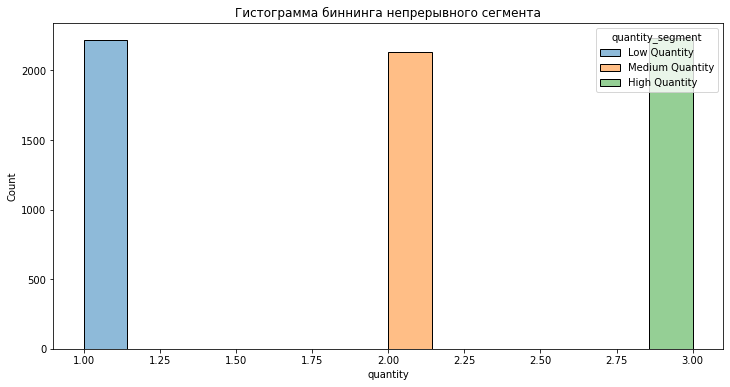

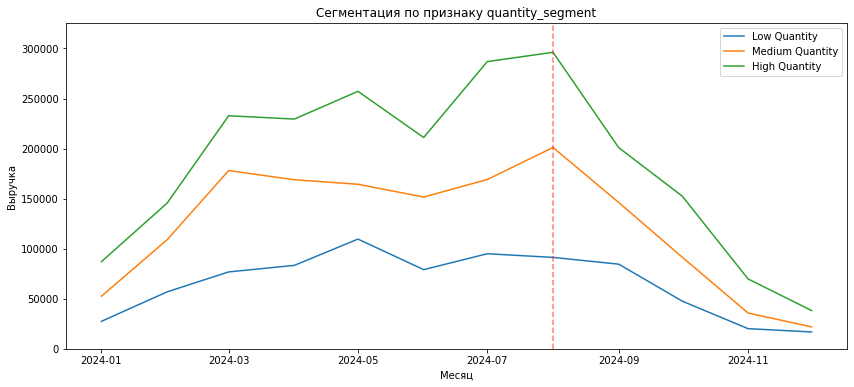

In [45]:
# Определение переиспользуемой функции для построения графиков по сегментам

def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   df_gp = data.groupby(["order_month", segmentation_attribute], as_index=False)["revenue"].sum()
   segments = df_gp[segmentation_attribute].unique()

   plt.figure(figsize=(14, 6))

   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot["order_month"], df_plot["revenue"], label=segment)

   plt.ylim(0, df_gp["revenue"].max() * 1.1)
   plt.axvline(pd.to_datetime("2024-08-01"), color="red", linestyle="--", alpha=0.5)
   plt.title(f"Сегментация по признаку {segmentation_attribute}")
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")
   plt.legend()
   plt.show()

labels = ["Low Quantity", "Medium Quantity", "High Quantity"]
colors = ["green", "orange", "red"]

# Задаём размер фигуры, построенной вне функции

plt.figure(figsize=(12, 6))
df["quantity_segment"] = pd.cut(df["quantity"], bins=3, labels=labels)

# Строим гистограмму непрерывного признака, разделённого на сегменты

sns.histplot(data=df, x="quantity", hue="quantity_segment", color = colors)

# Настраиваем отображение

plt.title("Гистограмма биннинга непрерывного сегмента")
plt.show()

# Вызываем функцию для бинаризованного признака количества товара

plot_segments(df, "quantity_segment")

Разделим этот же признак на квартили

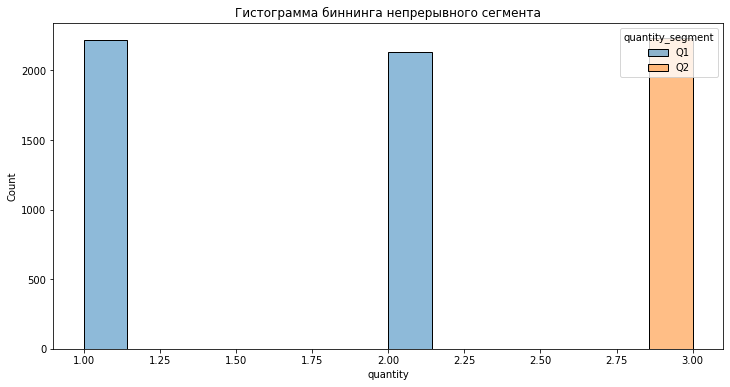

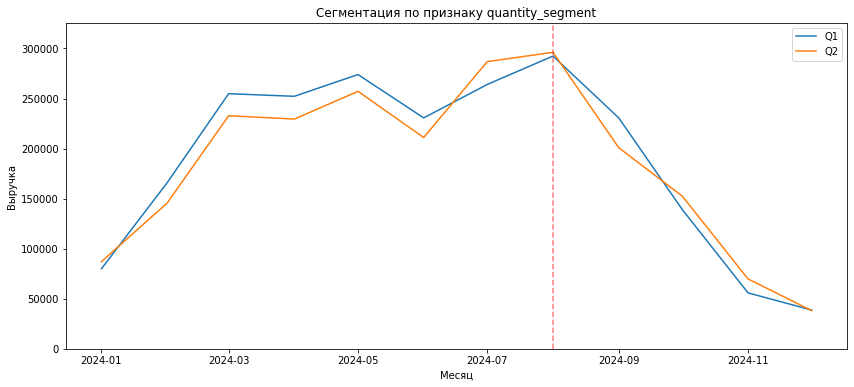

In [46]:
# Определение переиспользуемой функции для построения графиков по сегментам

def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   df_gp = data.groupby(["order_month", segmentation_attribute], as_index=False)["revenue"].sum()
   segments = df_gp[segmentation_attribute].unique()

   plt.figure(figsize=(14, 6))

   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot["order_month"], df_plot["revenue"], label=segment)

   plt.ylim(0, df_gp["revenue"].max() * 1.1)
   plt.axvline(pd.to_datetime("2024-08-01"), color="red", linestyle="--", alpha=0.5)
   plt.title(f"Сегментация по признаку {segmentation_attribute}")
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")
   plt.legend()
   plt.show()

labels = ["Q1", "Q2"]

# Задаём размер фигуры, построенной вне функции

plt.figure(figsize=(12, 6))
df["quantity_segment"] = pd.qcut(df["quantity"], q=2, labels=labels)

# Строим гистограмму непрерывного признака, разделённого на сегменты

sns.histplot(data=df, x="quantity", hue="quantity_segment")

# Настраиваем отображение

plt.title("Гистограмма биннинга непрерывного сегмента")
plt.show()

# Визуализируем динамику выручки для сегментированного непрерывного признака

plot_segments(df, "quantity_segment")

Всё то же самое проделаем для непрерывного признака - `price`: разделим признак на равные интервалы

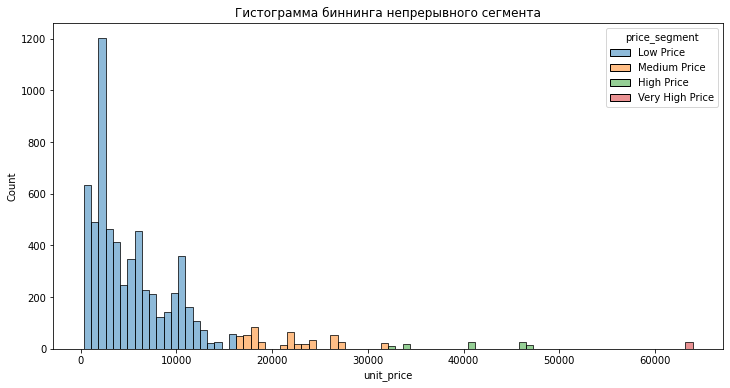

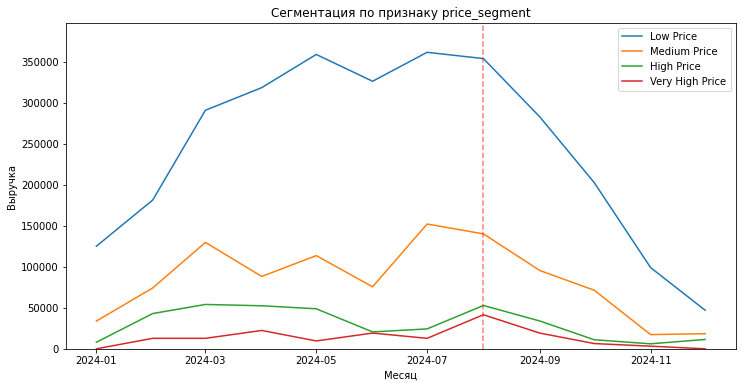

In [47]:
# Определение переиспользуемой функции для построения графиков по сегментам

def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   df_gp = data.groupby(["order_month", segmentation_attribute], as_index=False)["revenue"].sum()
   segments = df_gp[segmentation_attribute].unique()
    
   # Указываем размер фигуры

   plt.figure(figsize=(12, 6))
   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot["order_month"], df_plot["revenue"], label=segment)

   plt.ylim(0, df_gp["revenue"].max() * 1.1)
   plt.axvline(pd.to_datetime("2024-08-01"), color="red", linestyle="--", alpha=0.5)
   plt.title(f"Сегментация по признаку {segmentation_attribute}")
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")
   plt.legend()
   plt.show()

# Определение переиспользуемой функции для построения графиков по сегментам

def plot_segments_histogram(df: pd.DataFrame, segmentation_attribute: str):
   attribute = segmentation_attribute.replace("_segment", "")

   # Указываем размер фигуры
    
   plt.figure(figsize=(12, 6))

   # Строим гистограмму непрерывного признака, разделённого на сегменты
    
   sns.histplot(data=df, x="unit_price", hue=segmentation_attribute)

   # Указываем заголовок
    
   plt.title("Гистограмма биннинга непрерывного сегмента")
   plt.show()

# Разделяем признак цены на четыре равных сегмента и создадим новую колонку

labels = ["Low Price", "Medium Price", "High Price", "Very High Price"]
df["price_segment"] = pd.cut(df["unit_price"], bins=4, labels=labels)

# Строим гистограмму непрерывного признака

plot_segments_histogram(df, "price_segment")

# Визуализируем динамику выручки для сегментированного непрерывного признака

plot_segments(df, "price_segment")

Разделим этот же признак на квартили

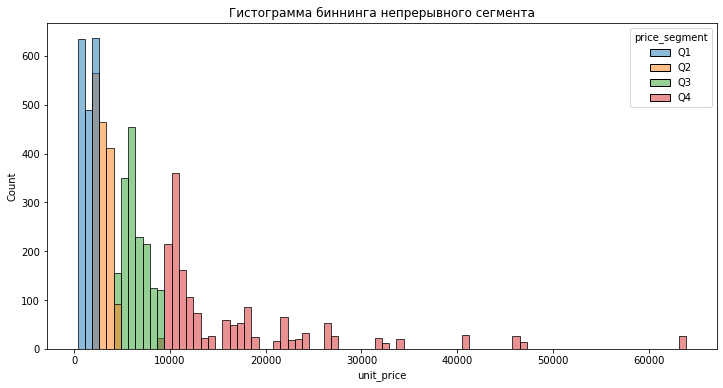

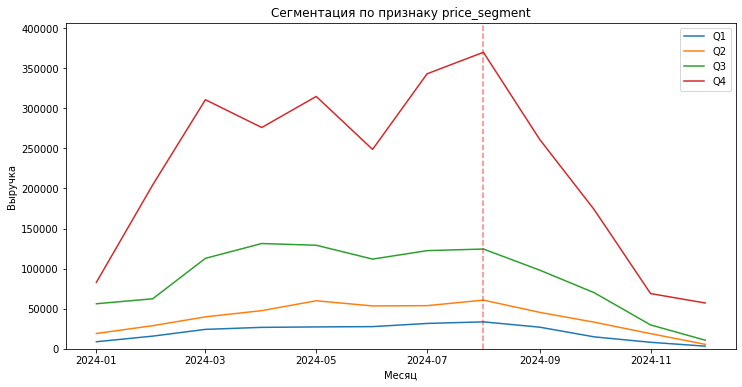

In [48]:
# Определение переиспользуемой функции для построения графиков по сегментам

def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   df_gp = data.groupby(["order_month", segmentation_attribute], as_index=False)["revenue"].sum()
   segments = df_gp[segmentation_attribute].unique()
    
   # Указываем размер фигуры

   plt.figure(figsize=(12, 6))
   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot["order_month"], df_plot["revenue"], label=segment)

   plt.ylim(0, df_gp["revenue"].max() * 1.1)
   plt.axvline(pd.to_datetime("2024-08-01"), color="red", linestyle="--", alpha=0.5)
   plt.title(f"Сегментация по признаку {segmentation_attribute}")
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")
   plt.legend()
   plt.show()

# Определение переиспользуемой функции для построения графиков по сегментам

def plot_segments_histogram(df: pd.DataFrame, segmentation_attribute: str):
   attribute = segmentation_attribute.replace("_segment", "")

   # Указываем размер фигуры
    
   plt.figure(figsize=(12, 6))

   # Строим гистограмму непрерывного признака, разделённого на сегменты
    
   sns.histplot(data=df, x='unit_price', hue=segmentation_attribute)

   # Настраиваем заголовок
    
   plt.title("Гистограмма биннинга непрерывного сегмента")
   plt.show()

# Разделяем признак цены на четыре сегмента по 25% наблюдений и создайте новую колонку

labels = ["Q1", "Q2", "Q3", "Q4"]

df["price_segment"] = pd.qcut(df["unit_price"], q=4, labels=labels)

# Строим гистограмму непрерывного признака

plot_segments_histogram(df, "price_segment")

# Визуализируем динамику выручки для сегментированного непрерывного признака

plot_segments(df, "price_segment")

Поскольку метод сегментации с делением на равные интервалы подходит для равномерно распределённых данных без смещений и сильных выбросов, корректное делать выводы на основе метода разделения по квартилям - он устойчив к выбросам и хорошо подходит для анализа неравномерных и смещённых распределений

Исходя из построенных графиков, мы можем увидеть, что:

- Нижние 50% товаров (Q1) при сегментации по количеству единиц товара в заказе демонстрируют одинаковое снижение выручки по сравнению со вторыми 50% товаров (Q2)
- Верхние 25% товаров (Q4) при сегментации по цене демонстрируют более значительное снижение выручки по сравнению с другими ценовыми сегментами.

Таким образом, мы можем сделать вывод о том, что дорогие товары приносят значительную прибыль и относятся к условному сегменту «Премиум». Скорее всего, такие товары приобретают пользователи с самым высоким средним чеком. Возможно, изменение их поведения стало причиной проблемы

Для начала убедимся, что такие пользователи есть в нашем продукте

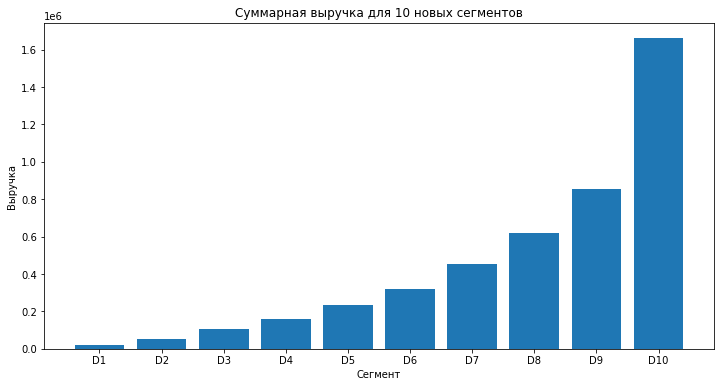

In [49]:
# Группируем данные по пользователям и рассчитываем их суммарную выручку

df_users_revenue = df.groupby('user_id')['revenue'].sum().reset_index()
df_users_revenue.rename(columns = {'revenue': 'total_user_revenue'}, inplace=True)

# Разделяем непрерывный признак выручки на сегменты по 10% пользователей в каждом

labels = ["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9", "D10"]
df_users_revenue['revenue_segment'] = pd.qcut(
   df_users_revenue["total_user_revenue"], q=10, labels=labels)

# Рассчитываем суммарную выручку для каждого из 10 новых сегментов

revenue_by_segments = df_users_revenue.groupby('revenue_segment')['total_user_revenue'].sum().reset_index()

# Указываем размер фигуры

plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму

plt.bar(revenue_by_segments['revenue_segment'], revenue_by_segments['total_user_revenue'])

# Добавляем подписи осей

plt.title('Суммарная выручка для 10 новых сегментов')  
plt.xlabel('Сегмент')  
plt.ylabel('Выручка')  
plt.show()

Исходя из построенного графика, мы видим, что в последнем сегменты действительно присутствуют пользователи, чей средний чек в 2 раза больше, чем средний чек пользователей из 9-ого сегмента и в разы больше средних чеков из других сегментов. Осталось выяснить, действительно ли проблемы приложения связаны со снижением активности пользователей с самым высоким средним чеком

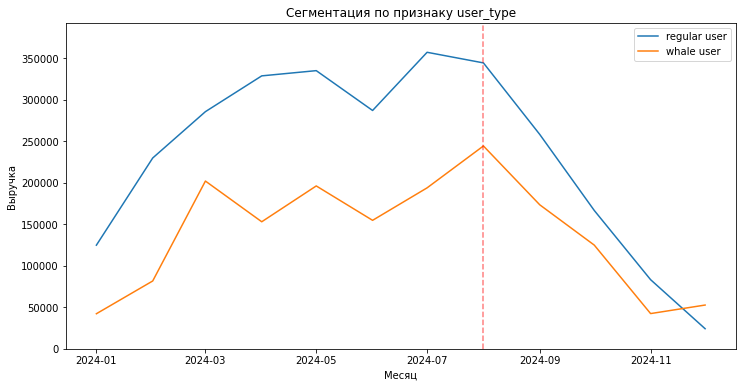

In [50]:
# Определение переиспользуемой функции для построения графиков по сегментам

def plot_segments(data: pd.DataFrame, segmentation_attribute: str) -> None:
   df_gp = data.groupby(["order_month", segmentation_attribute], as_index=False)["revenue"].sum()
   segments = df_gp[segmentation_attribute].unique()
    
   # Указываем размер фигуры

   plt.figure(figsize=(12, 6))
   for segment in segments:
       df_plot = df_gp[df_gp[segmentation_attribute] == segment]
       plt.plot(df_plot["order_month"], df_plot["revenue"], label=segment)

   plt.ylim(0, df_gp["revenue"].max() * 1.1)
   plt.axvline(pd.to_datetime("2024-08-01"), color="red", linestyle="--", alpha=0.5)
   plt.title(f"Сегментация по признаку {segmentation_attribute}")
   plt.xlabel("Месяц")
   plt.ylabel("Выручка")
   plt.legend()
   plt.show()

# Группируем данные по пользователям и рассчитайте их суммарную выручку

df_users_revenue = df.groupby('user_id', as_index=False).agg({'revenue': sum})
df_users_revenue.rename({"revenue": "total_user_revenue"}, inplace=True, axis=1)

# Разделяем непрерывный признак выручки на сегменты по 10% пользователей в каждом

labels = [f'D{i}' for i in range(1, 11)]
df_users_revenue['revenue_segment'] = pd.qcut(df_users_revenue['total_user_revenue'], q=10, labels=labels)

# Добавляем информацию о пользователях-китах из df_users_revenue

df = pd.merge(df, df_users_revenue, on = 'user_id', how = 'left')

# Создаём новый признак сегментации user_type

df['user_type'] = df['revenue_segment'].apply(
   lambda x: 'whale user' if x == 'D10' else 'regular user')

# Визуализируем динамику выручки для нового признака сегментации

plot_segments(df, 'user_type')

Исходя из построенного графика, мы видим, что снижение выручки в большей степени затронули пользователей не с самым высоким средним чеком. Однако стоит заметить, что снижение выручки существенно затронуло и пользователей с самым высоким средним чеком

Таким образом, мы делаем вывод о том, что сегментация на основе непрерывных признаков помогла установить, что снижение выручки коснулось товаров с высокой ценой

Далее проведём RFM-сегментацию пользователей для выявления наиболее перспективных сегментов для удержания, повышения выручки и персонализированных предложений

Для RFM-сегментации нужны данные о клиенте (обычно его идентификатор), дата и время покупки, итоговая сумма заказа

In [51]:
# Создаём датафрейм с необходимой информацией

ppro_orders = orders[['user_id', 'order_date', 'total_price']].copy()

Для RFM-анализа также нужно знать количество дней с последней покупки, чтобы рассчитать метрику R (давность). Для этого из даты проведения анализа нужно вычесть дату последней покупки. Датой проведения анализа может быть текущая дата, если анализ проводится по актуальным данным, или другая дата, которая позволяет оценить давность покупок. 

В нашем случае данные заканчиваются на 31 декабря 2024 года, поэтому в качестве даты анализа возьмём 01 января 2025 года.

In [52]:
# Рассчитываем количество дней с покупки до анализа:

ppro_orders['order_recency'] = pd.to_datetime('2024-12-01') - ppro_orders['order_date']

# Группируем данные для каждого пользователя и рассчитываем данные для RFM-анализа:

ppro_rfm = ppro_orders.groupby('user_id').agg(
    # Количество дней с последнего заказа:    
    recency = ('order_recency', lambda x: x.min().days),
    # Количество заказов за период времени: 
    frequency = ('order_date', 'count'),
    # Сумма стоимости всех заказов: 
    monetary_value = ('total_price', 'sum')
).reset_index()

# Проверяем результаты:

print(ppro_rfm.head(3))

   user_id  recency  frequency  monetary_value
0        3      310          7        87191.23
1        5      261         14       141379.80
2        6      220          2         7391.52


Проведём небольшой исследовательский анализ и построим гистограммы значений столбцов `recency` (давность), `frequency` (частота), `monetary_value` (сумма трат). Это поможет определить, какие подходы применить для сегментации  

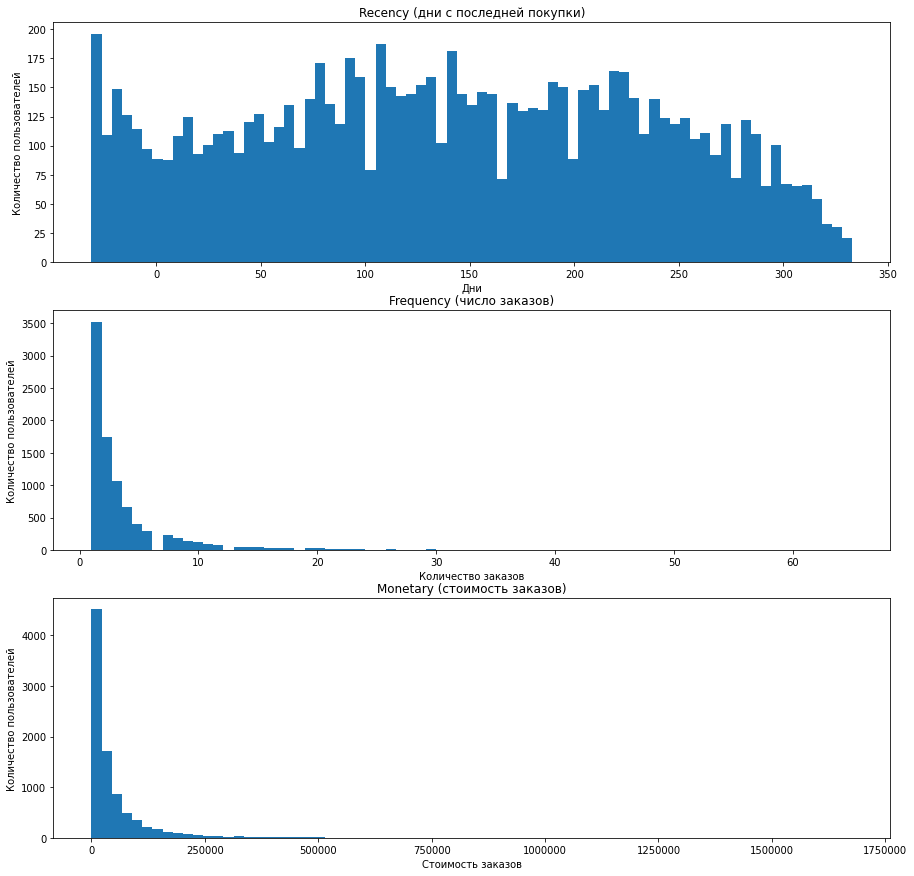

In [53]:
# Строим три гистограммы

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Давность

axes[0].hist(ppro_rfm['recency'], bins=75)
axes[0].set_title('Recency (дни с последней покупки)')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Количество пользователей')

# Частота

axes[1].hist(ppro_rfm['frequency'], bins=75)
axes[1].set_title('Frequency (число заказов)')
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('Количество пользователей')

# Сумма всех заказов

axes[2].hist(ppro_rfm['monetary_value'], bins=75)
axes[2].set_title('Monetary (стоимость заказов)')
axes[2].set_xlabel('Стоимость заказов')
axes[2].set_ylabel('Количество пользователей')
axes[2].ticklabel_format(style='plain')

plt.show()

Проанализируем получившиеся графики:
    
- Метрика `Recency` имеет нормальное распределение, поэтому лучше применить деление на равные интервалы
- Метрика `Frequency` распределена неравномерно (распределение смещено влево). Большинство пользователей совершили меньшее количество заказов — для сегментации можно использовать разделение по перцентилям
- Метрика `Monetary` распределена неравномерно (распределение смещено влево). Большинство пользователей совершили недорогие заказы — для сегментации можно использовать разделение по перцентилям

Приступим к выделению RFM-сегментов

In [54]:
# Определяем группу пользователя по количеству дней с момента последнего заказа:

ppro_rfm['r'] = pd.cut(ppro_rfm['recency'], bins=3, labels=[1,2,3])

# Определяем группу пользователя по количеству заказов: 

f_bins = [0, ppro_rfm['frequency'].quantile(0.33), 
          ppro_rfm['frequency'].quantile(0.66), 
          ppro_rfm['frequency'].max()]
ppro_rfm['f'] = pd.cut(ppro_rfm['frequency'], bins=f_bins, labels=[3,2,1], include_lowest=True)

# Определяем группу пользователя по сумме стоимости заказов: 

m_bins = [0, ppro_rfm['monetary_value'].quantile(0.33), 
          ppro_rfm['monetary_value'].quantile(0.66), 
          ppro_rfm['monetary_value'].max()]
ppro_rfm['m'] = pd.cut(ppro_rfm['monetary_value'], bins=m_bins, labels=[3,2,1], include_lowest=True)

# Находим групповой RFM-индекс:

ppro_rfm[['r','f','m']] = ppro_rfm[['r','f','m']].astype('str')
ppro_rfm['rfm_group'] = ppro_rfm['r'] + ppro_rfm['f'] + ppro_rfm['m']

# Выводим первые строки таблицы:

print(ppro_rfm.head(3))

   user_id  recency  frequency  monetary_value  r  f  m rfm_group
0        3      310          7        87191.23  3  1  1       311
1        5      261         14       141379.80  3  1  1       311
2        6      220          2         7391.52  3  2  3       323


Проведём RFM-анализ и посчитаем общее количество клиентов в каждом RFM-сегменте, а затем посчитаем долю пользователей в каждом сегменте в %

In [55]:
# Группируем данные по сегментам и считаем их размер:

rfm_group = ppro_rfm.groupby('rfm_group').agg({'user_id':'nunique'}).reset_index()

# Считаем долю пользователей в каждом сегменте в %:

rfm_group['user_share'] = (rfm_group['user_id'] / rfm_group['user_id'].sum()) * 100

# Выводим результат:

print(rfm_group.sort_values(by='user_id', ascending=False))

   rfm_group  user_id  user_share
9        211      872        9.77
17       233      861        9.65
0        111      769        8.62
26       333      734        8.23
8        133      697        7.81
13       222      563        6.31
4        122      452        5.07
18       311      424        4.75
22       322      398        4.46
16       232      382        4.28
25       332      321        3.60
7        132      319        3.58
12       221      294        3.30
3        121      248        2.78
14       223      230        2.58
5        123      226        2.53
21       321      216        2.42
10       212      194        2.17
1        112      183        2.05
23       323      178        2.00
19       312      127        1.42
15       231       87        0.98
6        131       78        0.87
24       331       46        0.52
11       213       12        0.13
20       313        6        0.07
2        113        5        0.06


Исходя из проведённого RFM-анализа, мы можем сделать следующие выводы:

- Сегмент с высокими показателями всех метрик: сегмент `333` - **8%** от всех пользователей. Это самые активные и ценные клиенты. Их стоит удерживать с помощью персонализированных предложений, программ лояльности и эксклюзивных акций
- Активные клиенты с потенциалом роста совершали покупки недавно и перспективны для вовлечения - **44%** от всех пользователей. Важно поддерживать их интерес к продукту и стимулировать к повторным покупкам. Сюда относятся сегменты:

    - Сегмент `233` (**9.65%** от всех пользователей)

    - Сегмент `222` (**6.31%** от всех пользователей)

    - Сегмент `322` (**4.46%** от всех пользователей)

    - Сегмент `232` (**4.28%** от всех пользователей)

    - Сегмент `332` (**3.60%** от всех пользователей)

    - Сегмент `221` (**3.30%** от всех пользователей)

    - Сегмент `223` (**2.58%** от всех пользователей)

    - Сегмент `321` (**2.42%** от всех пользователей)

    - Сегмент `212` (**2.17%** от всех пользователей)

    - Сегмент `323` (**2.00%** от всех пользователей)

    - Сегмент `312` (**1.42%** от всех пользователей)

    - Сегмент `231` (**0.98%** от всех пользователей)

    - Сегмент `331` (**0.52%** от всех пользователей)

    - Сегмент `213` (**0.13%** от всех пользователей)

    - Сегмент `313` (**0.07%** от всех пользователей)

- Неактивные клиенты давно не делали покупок, но среди них есть те, кто может принести прибыль - **48%** от всех пользователей. Чтобы вернуть их, стоит разработать специальные предложения. К неактивным клиентам сейчас относятся сегменты: 

    - Сегмент `211` (**9.77%** от всех пользователей)

    - Сегмент `111` (**8.62%** от всех пользователей)

    - Сегмент `133` (**7.81%** от всех пользователей)

    - Сегмент `122` (**5.07%** от всех пользователей)

    - Сегмент `311` (**4.75%** от всех пользователей)

    - Сегмент `132` (**3.58%** от всех пользователей)

    - Сегмент `121` (**2.78%** от всех пользователей)

    - Сегмент `123` (**2.53%** от всех пользователей)

    - Сегмент `112` (**2.05%** от всех пользователей)

    - Сегмент `131` (**0.87%** от всех пользователей)

    - Сегмент `113` (**0.06%** от всех пользователей)

Далее проведём кластеризацию методом K-Means

Из всего набора данных необходимо выбрать признаки, на которых кластеризация покажет наилучшие результаты. В качестве признаков выберем всё те же непрерывные признаки:

- `quantity` - количество единиц товара в заказе.
- `unit_price` - цена за одну единицу товара.
- `revenue` - выручка

In [56]:
# Отбираем признаки

data = orders[['quantity', 'unit_price', 'revenue']]

Затем определяем оптимальное число кластеров

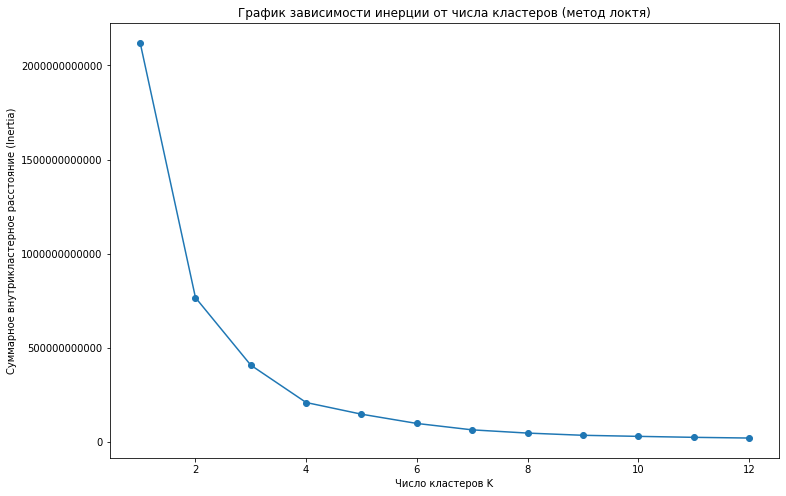

In [57]:
# Создаём массив, в котором будем хранить значения inertia для разбиения с разным числом кластеров

i = []

# Задаём диапазон количества кластеров

min_k = 1
max_k = 12

plt.figure(figsize=(12, 8))
plt.ticklabel_format(style='plain')

# Перебираем разное количество кластеров

for k in range(min_k, max_k + 1):
   km = KMeans(n_clusters=k)  # Создаём модель KMeans для текущего значения k
   km.fit_transform(data)  # Обучаем модель и получаем координаты точек в пространстве кластеров
   i.append(km.inertia_)  # Сохраняем значение инерции для текущего k

# Строим график зависимости инерции от количества кластеров
plt.plot(range(min_k, max_k + 1), i, marker='o')
plt.xlabel('Число кластеров K')  # Подпись оси X
plt.ylabel('Суммарное внутрикластерное расстояние (Inertia)')  # Подпись оси Y
plt.title('График зависимости инерции от числа кластеров (метод локтя)')  # Заголовок
plt.show()

С помощью метода локтя мы видим, что оптимальное число кластеров = 4 (`n_clusters = 4`)

Теперь можно проводить кластеризацию методом K-Means

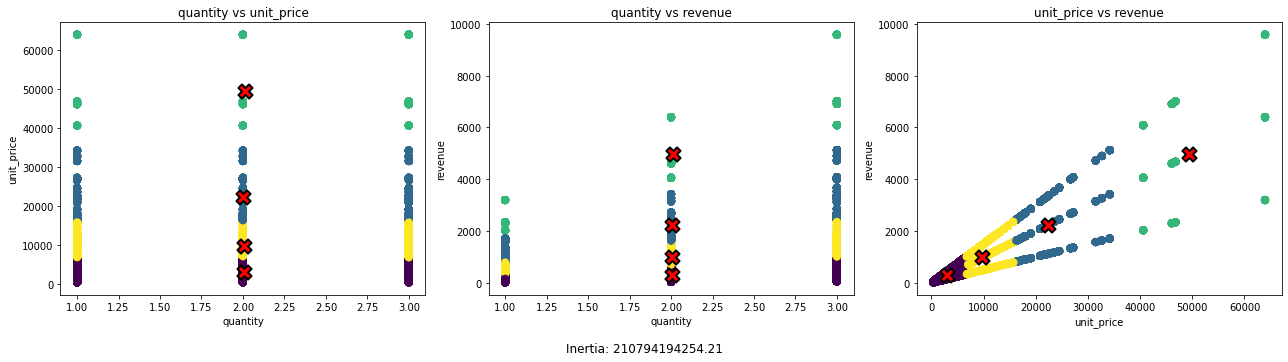

,Количество единиц товара в заказе,Цена,Выручка
Кластер 1,2.007,2890.483,290.257
Кластер 2,2.006,9706.981,975.859
Кластер 3,2.003,22350.957,2235.353
Кластер 4,2.011,49358.764,4985.038


In [58]:
# Определяем количество кластеров 
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(data)

# Получаем координаты центров (центроидов) кластеров
centroids = kmeans.cluster_centers_

# Создаём 3 графика (1 строка × 3 столбца) для отображения попарных комбинаций признаков
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Список названий признаков, которые будут использоваться на графиках
axs = ["quantity", "unit_price", "revenue"]

# Перебираем пары признаков: (quantity vs unit_price), (quantity vs revenue), (unit_price vs revenue)
for i, (x_idx, y_idx) in enumerate([[0, 1], [0, 2], [1, 2]]):
   x_label, y_label = axs[x_idx], axs[y_idx]  # Названия признаков для осей

   # Строим точки — объекты из датафрейма, раскрашенные по меткам кластера
   axes[i].scatter(
       data[x_label],  # Значения по оси X
       data[y_label],  # Значения по оси Y
       c=labels,  # Цвет зависит от номера кластера
       cmap='viridis',  # Цветовая карта
       s=50  # Размер точек
   )

   # Строим центроиды кластеров красными крестами
   axes[i].scatter(
       centroids[:, x_idx],  # X-координаты центров
       centroids[:, y_idx],  # Y-координаты центров
       s=200,  # Размер крестов
       c='red',  # Цвет — красный
       edgecolors='black',  # Обводка — чёрная
       linewidths=2,  # Толщина обводки
       marker='X'  # Форма маркера — крест
   )

   # Подписи осей и заголовок графика
   axes[i].set_xlabel(x_label)
   axes[i].set_ylabel(y_label)
   axes[i].set_title(f'{x_label} vs {y_label}')

# Подгоняем макет, оставляя место снизу для подписи с инерцией
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Добавляем текст с СВР внизу графика (по центру)
fig.text(0.5, 0.01, f'Inertia: {kmeans.inertia_:.2f}', ha='center', fontsize=12)

# Показываем итоговый набор визуализаций
plt.show()

# Сортируем кластеры по возрастанию «Выручки» (второй столбец, индекс 1)

sorted_indices = np.argsort(kmeans.cluster_centers_[:, 2])
sorted_centroids = kmeans.cluster_centers_[sorted_indices]

# Создаём DataFrame из центроидов

centroids_df = pd.DataFrame(
   sorted_centroids,
   columns=['Количество единиц товара в заказе', 'Цена', 'Выручка'],
   index=[f'Кластер {i + 1}' for i in range(kmeans.n_clusters)]
)

# Форматируем числа для вывода (2 знака после точки)

pd.options.display.float_format = '{:.3f}'.format

# Выводим таблицу

display(centroids_df.head())

В результате мы получили таблицу со средними значениями признаков. Первый и четвёртый кластеры имеют свою отличительную особенность:

- **Кластер 1:** пользователи с наименьшей ценой товара и выручкой маркетплейса от покупок пользователей
- **Кластер 4:** пользователи с наибольшей ценой товара и выручкой маркетплейса от покупок пользователей

Проанализировав данные по каждому кластеру, можно прийти к следующим выводам:

- Количество единиц товара в заказе в каждом из кластеров - одинаково
- С увеличением количества единиц товара в заказе в каждом из кластеров происходит прямопропорциональное увеличение выручки маркетплейса от покупок пользователей
- С увеличением цены товара в каждом из кластеров происходит прямопропорциональное увеличение выручки маркетплейса от покупок пользователей
- Количество единиц товара в заказе не зависит от цены товара: товары с низкой и высокой ценой могут продаваться в одинаковом количестве единиц товара в заказе

## Выводы по этапу 4

На основе поиска инсайтов, точек роста и сегментации можно сделать следующие выводы:

- Анализ общих воронок показал стабильную конверсию без резких спадов. Целевая конверсия (**62%**) высока, а потери на финальных этапах не превышают **20%**, что указывает на оптимизированный пользовательский путь
- Анализ воронок в разрезе каналов привлечения пользователей позволил выявить проблемный канал привлечения - канал `TikTok` показывает значительно худшие результаты по сравнению с каналами `Google Ads`, `Email Marketing`, `Affiliate`, `SEO`, `Social Media`
- Основные потери пользователей из TikTok происходят на следующих этапах воронки:
    - Низкая конверсия в добавление товара в корзину (на 10% ниже)
    - Низкая конверсия в начало оформления заказа (на 20-25% ниже)
    - Низкая конверсия в завершение заказа (на 20-25% ниже)
- Сегментация по категориальным признакам выявила, что снижение выручки сконцентрировано среди пользователей с регулярной активностью, привлеченных через канал `Google Ads` из регионов `Москва`, `Санкт-Петербург`, `Московская область` и `Другие регионы`
- Сегментация по непрерывным признакам показала, что наибольшее снижение выручки характерно для товаров верхнего ценового сегмента (верхние 25%)
- RFM-анализ выделил ключевые сегменты:
    - Ценные клиенты (**8%** от всех пользователей): требуют удержания через персонализированные предложения
    - Перспективные активные клиенты (**44%** от всех пользователей): необходима стимуляция к повторным покупкам для роста частоты покупок
    - Неактивные клиенты (**48%** от всех пользователей): нуждаются в реактивации
- Кластеризация подтвердила, что цена товара напрямую влияет на выручку, а количество единиц в заказе не зависит от ценового сегмента. Кластеры с высокой ценой (`Кластер 4`) критически важны для прибыли

По итогам анализа были сформулированы несколько гипотез, которые помогут развить продукт:

**Гипотеза 1:** Если упростить и сократить процесс оформления заказа для пользователей из TikTok, то конверсия на этапе начала оформления заказа и на этапе завершения оформления заказа - увеличится

*Основание*: данные **step-by-step** воронки, которые показывают, что самые значительные потери для `TikTok` (по **20-25%**) происходят именно на переходах между финальными этапами воронки (добавление товара в корзину -> начало оформления заказа -> завершение оформления заказа). Это указывает на возможные барьеры в самом процессе оформления (сложная форма, обязательная регистрация, неясная стоимость доставки)

**Гипотеза 2:** Если внедрить программу лояльности с персональными скидками для пользователей с регулярной активностью из регионов `Москва`, `Санкт-Петербург`, `Московская область` и `Другие регионы`, привлеченных через `Google Ads`, то их удержание и средний чек увеличатся

*Основание:* Сегментация выявила значительное снижение выручки в этой группе, что указывает на необходимость точечного вмешательства

**Гипотеза 3:** Если запустить кампанию по реактивации неактивных клиентов (сегменты `111`, `122`, `121` и др.) с помощью персонализированных предложений на основе их предыдущих покупок, то их возвращаемость увеличится

*Основание:* RFM-анализ показал, что более `20%` пользователей относятся к неактивным сегментам, но имеют потенциал для возврата

**Гипотеза 4:** Если внедрить кросс-селлинг рекомендации на основе покупок пользователей из `кластера 4` (с высокой ценой товара), то средний чек и выручка увеличатся

*Основание:* Кластеризация показала, что пользователи с высокой ценой товара приносят наибольшую выручку, но их поведение изменилось. Рекомендации помогут стимулировать дополнительные покупки

## 5. Подготовка эксперимента и подведение его результатов

## Новые данные:
```python
pa_marketplace_events_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_events_AB.csv')
pa_marketplace_orders_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_orders_AB.csv')
pa_marketplace_users_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_users_AB.csv')
```
## Результаты сплита лежат в таблице:
```python
pa_marketplace_AB_split_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_AB_split_users.csv')
```
* user_id – id клиента
* group – группа, в которую попал клиент


# Дизайн эксперимента: Бонус на первую покупку для пользователей TikTok
## 1. Контекст и цель эксперимента
- **Бизнес-контекст:** Команда продукта запускает эксперимент, направленный на повышение конверсии среди пользователей, привлечённых через канал TikTok. Для стимулирования первой покупки пользователям будет предоставлен бонус на первую покупку.
- **Цель:** Проверить, влияет ли предоставление бонуса на первую покупку на конверсию и выручку среди пользователей TikTok.
- **Гипотеза:** Предоставление бонуса на первую покупку новым пользователям, привлеченным через TikTok, приведет к увеличению конверсии в первую покупку
---
## 2. Формат эксперимента
- **Тип эксперимента:** Сплит-роллинг (rolling split)
- **Канал:** Только пользователи, пришедшие с TikTok
- **Группы:**
    - **Контрольная (A):** пользователи TikTok без бонуса
    - **Тестовая (B):** пользователи TikTok с бонусом на первую покупку
- **Распределение:** Равномерное распределение новых пользователей TikTok между группами по дате регистрации
- **Период проведения:** 3 недели (фиксировано)
---
## 3. Ключевые метрики
### Основная метрика
- **Конверсия в первую покупку** — доля пользователей, зарегистрировавшихся с TikTok и совершивших первую покупку
- *Цель:* увеличить конверсию с помощью бонуса
- *Критерий успеха:* статистически значимый рост конверсии в тестовой группе
### Вспомогательные метрики
- **ARPU** (средняя выручка на пользователя TikTok)
- **ARPPU** (средняя выручка на покупателя TikTok)
- **AOV** (средний чек TikTok)
### Барьерная метрика
- **Общая выручка от пользователей TikTok**
---
## 4. Размеры групп и запуск
- **Целевая аудитория:** только пользователи TikTok
- **Размеры групп:** определяются по фактическому трафику TikTok за период эксперимента
- **Комментарий:** запуск без предварительного расчёта мощности и MDE из-за срочности задачи


Начнём с загрузки датасетов `pa_marketplace_AB_split_users`, `pa_marketplace_users_AB`, `pa_marketplace_events_AB` и `pa_marketplace_orders_AB`

In [59]:
# Выгружаем данные в переменные

try:
    ab_users = pd.read_csv('C:/Users/Student/Desktop/pa_marketplace_users_AB.csv')
    ab_split_users = pd.read_csv('C:/Users/Student/Desktop/pa_marketplace_AB_split_users.csv')
    ab_events = pd.read_csv('C:/Users/Student/Desktop/pa_marketplace_events_AB.csv')
    ab_orders = pd.read_csv('C:/Users/Student/Desktop/pa_marketplace_orders_AB.csv')
    
except:
    ab_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_users_AB.csv')
    ab_split_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_AB_split_users.csv')
    ab_events = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_events_AB.csv')
    ab_orders = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_orders_AB.csv')

Познакомимся с данными датасета `pa_marketplace_AB_split_users.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`

In [60]:
# Выводим первые строки датафрейма

ab_split_users.head()

,user_id,group
0,44965,control
1,44967,control
2,44968,control
3,44969,treatment
4,44970,control


In [61]:
# Выводим информацию о датафрейме

ab_split_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2968 non-null   int64 
 1   group    2968 non-null   object
dtypes: int64(1), object(1)
memory usage: 46.5+ KB


Датафрейм `ab_split_users` содержит 2 столбца и 2968 строк, в котором представлена информация о пользователях, участвовавших в A/B-тестировании

В датафрейме пропуски - отсутствуют

Типы данных столбцов - соответствуют характеру данных

Далее проверим датафрейм на наличие дубликатов

In [62]:
# Проверяем данные на наличие дубликатов

ab_split_users.duplicated().sum()

0

Датафрейм не содержит полные дубликаты

Проверим корректность распределения новых пользователей по группам А/В-эксперимента. Для этого уберём всех пользователей, которые попали сразу в две группы - контрольную и тестовую, а также визуализируем количественное распределение новых пользователей по группам

Количество пользователей после очистки: 2968
Общее количество пользователей: 2968


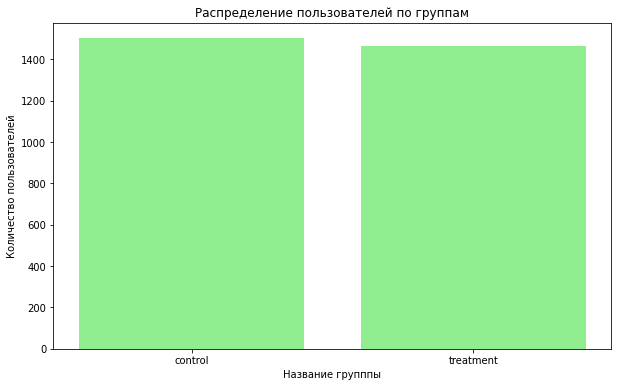

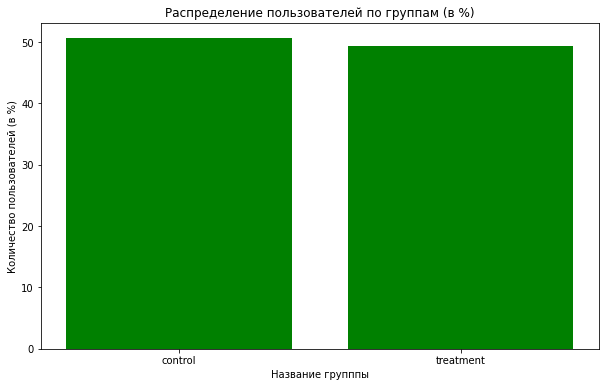

Количество пользователей в каждой из групп:
       group  user_id
0    control     1503
1  treatment     1465

Количество пользователей в каждой из групп (в %):
       group  user_id
0    control   50.640
1  treatment   49.360


In [63]:
# Считаем кол-во уникальных групп на user_id

flawed_users = ab_split_users.groupby('user_id')['group'].nunique().reset_index()

# Фильтруем клиентов у которых больше 1 группы

flawed_users = flawed_users[flawed_users['group'] > 1]

split_data_correct = ab_split_users[~ab_split_users['user_id'].isin(flawed_users['user_id'])]

# выводим текстовое сообщение 'Количество пользователей после очистки: N'

print(f'Количество пользователей после очистки: {len(split_data_correct)}')

# выводим текстовое сообщение 'Общее количество пользователей:'

print(f'Общее количество пользователей: {len(ab_split_users)}')

# Считаем количество пользователей в каждой из групп

counts_grouped = ab_split_users.groupby('group')['user_id'].nunique().reset_index()

# Визуализируем количество пользователей в каждой из групп

plt.figure(figsize=(10, 6))
plt.bar(counts_grouped['group'], counts_grouped['user_id'], color='lightgreen')
plt.title('Распределение пользователей по группам')
plt.ylabel('Количество пользователей')
plt.xlabel('Название групппы')
plt.show()

# Считаем количество пользователей в каждой из групп в %

counts_grouped_prop = (ab_split_users.groupby('group')['user_id'].nunique()/ab_split_users['user_id'].nunique()) * 100
counts_grouped_prop = counts_grouped_prop.reset_index()

# Визуализируем количество пользователей в каждой из групп (в %)

plt.figure(figsize=(10, 6))
plt.bar(counts_grouped_prop['group'], counts_grouped_prop['user_id'], color='green')
plt.title('Распределение пользователей по группам (в %)')
plt.ylabel('Количество пользователей (в %)')
plt.xlabel('Название групппы')
plt.show()

print(f'Количество пользователей в каждой из групп:')

print(counts_grouped)

print()

print(f'Количество пользователей в каждой из групп (в %):')

print(counts_grouped_prop)

Проверка показала, что пользователи распределены корректно (нет пользователей, которые попали сразу в две группы), отличия в количестве пользователей между группами - несущественны (менее 2%)

Также рассчитаем количество пользователей, которые встречаются одновременно в контрольной и тестовых группах, чтобы убедиться в том, что никто из пользователей случайно не попал в обе группы одновременно

In [64]:
# Проверяем пользователей из контрольной и тестовой групп на пересечение

a = ab_split_users[ab_split_users['group'] == 'control']['user_id']
b = ab_split_users[ab_split_users['group'] == 'treatment']['user_id']

intersection = list(set(a) & set(b))
print(intersection)

[]


После выполнения данного кода мы видим, что пользователей, которые встречаются одновременного в контрольной и тестовых группах - нет

Далее проверим значения столбцов категориальных данных

In [65]:
# Проверяем значения столбцов категориальных данных в датафрейме

print(ab_split_users['group'].unique())

['control' 'treatment']


Все значения - корректны и не повторяются из-за различных стилей написания

Проверка значений столбцов категориальных данных показала, что в датафрейме содержится информация о двух группах A/B-эксперимента - 1 контрольная и 1 тестовая

Таким образом, данные распределения новых пользователей по группам А/В-эксперимента, которые содержатся в датафрейме `ab_split_users` - корректны:

- Дубликаты и пропуски - отсутствуют
- Пользователи, которые попали сразу в две группы - отсутствуют
- Значения категориальных данных - корректны
- Тип данных имеющихся столбцов соответствуют характеру данных

Познакомимся с данными датасета `pa_marketplace_users_AB.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`

In [66]:
# Выводим первые строки датафрейма

ab_users.head()

,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month
0,18,2024-01-01 05:26:00,49,M,Екатеринбург,TikTok,one_time,2024-01-01,2024-01-01
1,22,2024-01-01 17:13:00,50,M,Санкт-Петербург,TikTok,one_time,2024-01-01,2024-01-01
2,26,2024-01-01 21:15:00,60,F,Москва,TikTok,rare,2024-01-01,2024-01-01
3,33,2024-01-01 14:43:00,31,M,Екатеринбург,TikTok,rare,2024-01-01,2024-01-01
4,39,2024-01-01 01:13:00,44,M,Санкт-Петербург,TikTok,rare,2024-01-01,2024-01-01


In [67]:
# Выводим информацию о датафрейме

ab_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22196 entries, 0 to 22195
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            22196 non-null  int64 
 1   registration_date  22196 non-null  object
 2   age                22196 non-null  int64 
 3   gender             22196 non-null  object
 4   region             22196 non-null  object
 5   acq_channel        22196 non-null  object
 6   buyer_segment      22196 non-null  object
 7   cohort_week        22196 non-null  object
 8   cohort_month       22196 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.5+ MB


Датафрейм `ab_users` содержит 9 столбцов и 22196 строку, в котором представлена информация о пользователях

В датафрейме пропуски - отсутствуют

Несоответствие типа данных наблюдается в столбцах:

- `registration_date` — дата регистрации пользователя;
- `cohort_week` — неделя привлечения;
- `cohort_month` — месяц привлечения.

Столбцы с информацией о дате и времени должны обладать типом данных `datetime64`

In [68]:
# Меняем тип данных

ab_users['registration_date'] = pd.to_datetime(ab_users['registration_date'])
ab_users['cohort_week'] = pd.to_datetime(ab_users['cohort_week'])
ab_users['cohort_month'] = pd.to_datetime(ab_users['cohort_month'])

# Выводим информацию о датафрейме

ab_users.info()

# Выводим первые строки датафрейма

ab_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22196 entries, 0 to 22195
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            22196 non-null  int64         
 1   registration_date  22196 non-null  datetime64[ns]
 2   age                22196 non-null  int64         
 3   gender             22196 non-null  object        
 4   region             22196 non-null  object        
 5   acq_channel        22196 non-null  object        
 6   buyer_segment      22196 non-null  object        
 7   cohort_week        22196 non-null  datetime64[ns]
 8   cohort_month       22196 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 1.5+ MB


,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month
0,18,2024-01-01 05:26:00,49,M,Екатеринбург,TikTok,one_time,2024-01-01,2024-01-01
1,22,2024-01-01 17:13:00,50,M,Санкт-Петербург,TikTok,one_time,2024-01-01,2024-01-01
2,26,2024-01-01 21:15:00,60,F,Москва,TikTok,rare,2024-01-01,2024-01-01
3,33,2024-01-01 14:43:00,31,M,Екатеринбург,TikTok,rare,2024-01-01,2024-01-01
4,39,2024-01-01 01:13:00,44,M,Санкт-Петербург,TikTok,rare,2024-01-01,2024-01-01


Далее проверим датафрейм на наличие дубликатов

In [69]:
# Проверяем данные на наличие дубликатов

ab_users.duplicated().sum()

0

Датафрейм не содержит полные дубликаты

Далее проверим значения столбцов категориальных данных

In [70]:
# Проверяем значения столбцов категориальных данных в датафрейме

print(ab_users['gender'].unique())
print()
print(ab_users['region'].unique())
print()
print(ab_users['acq_channel'].unique())
print()
print(ab_users['buyer_segment'].unique())

['M' 'F']

['Екатеринбург' 'Санкт-Петербург' 'Москва' 'Другие регионы'
 'Ростов-на-Дону' 'Московская область' 'Нижний Новгород' 'Новосибирск'
 'Краснодар']

['TikTok']

['one_time' 'rare' 'medium' 'regular']


Все значения - корректны и не повторяются из-за различных стилей написания. Важно отметить, что в датафрейме содержится информация только о тех пользователях, которые привлечены с помощью канала `TikTok` (это подтверждат тот факт, что в столбце с каналом привлечения `acq_channel` содержится всего лишь одно уникальное значение - `TikTok`). Это является важным условием формата проведения A/B-тестирования

Оставим в датафрейме информацию только о тех пользователях, которые принимали участие в A/B-тестировании и добавляем к каждому пользователю столбец `group` с группой A/B-тестирования

In [71]:
# Оставляем информацию только о тех пользователях, которые принимали участие в A/B-тестировании
# и добавляем к каждому пользователю столбец `group` с группой A/B-тестирования

ab_users = ab_users.merge(ab_split_users, on = 'user_id', how = 'inner')
ab_users

,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month,group
0,44965,2025-01-01 18:10:00,66,M,Новосибирск,TikTok,one_time,2024-12-30,2025-01-01,control
1,44967,2025-01-01 11:29:00,70,M,Московская область,TikTok,rare,2024-12-30,2025-01-01,control
2,44968,2025-01-01 13:05:00,68,F,Нижний Новгород,TikTok,regular,2024-12-30,2025-01-01,control
3,44969,2025-01-01 00:23:00,24,F,Краснодар,TikTok,medium,2024-12-30,2025-01-01,treatment
4,44970,2025-01-01 06:33:00,50,M,Санкт-Петербург,TikTok,regular,2024-12-30,2025-01-01,control
...,...,...,...,...,...,...,...,...,...,...
2963,48902,2025-01-26 07:22:00,27,F,Другие регионы,TikTok,regular,2025-01-20,2025-01-01,treatment
2964,48903,2025-01-26 17:55:00,51,M,Другие регионы,TikTok,rare,2025-01-20,2025-01-01,control
2965,48904,2025-01-26 04:34:00,60,F,Другие регионы,TikTok,medium,2025-01-20,2025-01-01,control
2966,48906,2025-01-26 21:25:00,57,F,Санкт-Петербург,TikTok,rare,2025-01-20,2025-01-01,control


Таким образом, датафрейм `ab_users` подготовлен к дальнейшему анализу:

- Дубликаты и пропуски - отсутствуют
- Значения категориальных данных - корректны
- Столбцы, которые содержат информацию о дате и времени, приведены к корректному типу данных `datetime64`
- Тип данных имеющихся столбцов соответствует характеру данных
- Содержится информация только о тех пользователях, которые принимали участие в A/B-тестировании
- К каждому пользователю добавлен столбец `group` с группой A/B-тестирования

Познакомимся с данными датасета `pa_marketplace_events_AB.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`

In [72]:
# Выводим первые строки датафрейма

ab_events.head()

,event_id,user_id,event_date,event_type,os,device,product_name,event_week,event_month
0,3132,100,2024-01-01 15:23:56,page_view,iOS,mobile,NaN,2024-01-01,2024-01-01
1,3133,100,2024-01-01 15:24:01,product_view,iOS,mobile,Шорты для тренировок,2024-01-01,2024-01-01
2,3134,100,2024-01-01 15:24:10,product_click,iOS,mobile,Куртка детская,2024-01-01,2024-01-01
3,3135,100,2024-01-01 15:25:10,add_to_cart,iOS,mobile,Балетки классические,2024-01-01,2024-01-01
4,3136,100,2024-01-01 15:25:46,checkout_start,iOS,mobile,NaN,2024-01-01,2024-01-01


In [73]:
# Выводим информацию о датафрейме

ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831231 entries, 0 to 831230
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event_id      831231 non-null  int64 
 1   user_id       831231 non-null  int64 
 2   event_date    831231 non-null  object
 3   event_type    831231 non-null  object
 4   os            831231 non-null  object
 5   device        831231 non-null  object
 6   product_name  409054 non-null  object
 7   event_week    831231 non-null  object
 8   event_month   831231 non-null  object
dtypes: int64(2), object(7)
memory usage: 57.1+ MB


Датафрейм `ab_events` содержит 9 столбцов и 831231 строка, в котором представлена информация о событиях пользователей

В датафрейме присутствуют пропуски в столбце `product_name` - наименование товара, к которому относится событие

Специфика датафрейма подразумевает включение информации о всех типах событиях. Поэтому некоторые строки не содержат информации о наименовании товара, так как события не подразумевает выбор конкретного товара, например, событие открытия любой страницы сайта или приложения пользователем `page_view`. Соответственно, пропуски в столбце `product_name` - обоснованы

Несоответствие типа данных наблюдается в столбцах:

- `event_date` — дата события;
- `event_week` — неделя события;
- `event_month` — месяц события.

Столбцы с информацией о дате и времени должны обладать типом данных `datetime64`

In [74]:
# Меняем тип данных

ab_events['event_date'] = pd.to_datetime(ab_events['event_date'])
ab_events['event_week'] = pd.to_datetime(ab_events['event_week'])
ab_events['event_month'] = pd.to_datetime(ab_events['event_month'])

# Выводим информацию о датафрейме

ab_events.info()

# Выводим первые строки датафрейма

ab_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831231 entries, 0 to 831230
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      831231 non-null  int64         
 1   user_id       831231 non-null  int64         
 2   event_date    831231 non-null  datetime64[ns]
 3   event_type    831231 non-null  object        
 4   os            831231 non-null  object        
 5   device        831231 non-null  object        
 6   product_name  409054 non-null  object        
 7   event_week    831231 non-null  datetime64[ns]
 8   event_month   831231 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 57.1+ MB


,event_id,user_id,event_date,event_type,os,device,product_name,event_week,event_month
0,3132,100,2024-01-01 15:23:56,page_view,iOS,mobile,NaN,2024-01-01,2024-01-01
1,3133,100,2024-01-01 15:24:01,product_view,iOS,mobile,Шорты для тренировок,2024-01-01,2024-01-01
2,3134,100,2024-01-01 15:24:10,product_click,iOS,mobile,Куртка детская,2024-01-01,2024-01-01
3,3135,100,2024-01-01 15:25:10,add_to_cart,iOS,mobile,Балетки классические,2024-01-01,2024-01-01
4,3136,100,2024-01-01 15:25:46,checkout_start,iOS,mobile,NaN,2024-01-01,2024-01-01


Далее проверим датафрейм на наличие дубликатов

In [75]:
# Проверяем данные на наличие дубликатов

ab_events.duplicated().sum()

0

Датафрейм не содержит полные дубликаты

Далее проверим значения столбцов категориальных данных

In [76]:
# Проверяем значения столбцов категориальных данных в датафрейме

print(ab_events['event_type'].unique())
print()
print(ab_events['os'].unique())
print()
print(ab_events['device'].unique())
print()
print(ab_events['product_name'].unique())

['page_view' 'product_view' 'product_click' 'add_to_cart' 'checkout_start'
 'checkout_complete' 'user_logout' 'search' 'category_view' 'filter_apply'
 'promo_view' 'wishlist_add' 'user_login' 'banner_click'
 'remove_from_cart']

['iOS' 'Windows' 'macOS' 'Android']

['mobile' 'desktop' 'tablet']

[nan 'Шорты для тренировок' 'Куртка детская' 'Балетки классические'
 'Маска для лица' 'Одеяло детское' 'Поло Ralph Lauren' 'Брюки палаццо'
 'Зубная паста' 'Коврик для йоги' 'Фен для волос' 'Гречка ядрица'
 'Пальто зимнее' 'Тушь для ресниц' 'Горелка газовая' 'Сумка кожаная'
 'Доска разделочная' 'Свитер с капюшоном' 'Шуруповерт' 'Часы Casio'
 'Коляска трансформер' 'Анкер PowerBank' 'Мяч футбольный'
 'Пластырь медицинский' 'Маркеры цветные' 'Spigen чехол' 'Чай черный'
 'Гель для душа' 'Спальный мешок' 'Запонки классические'
 'Перчатки кожаные' 'Конструктор LEGO' 'Лежак для питомца'
 'Костюм спортивный' 'Компас туристический' 'Духи Chanel'
 'Берцы тактические' 'Сахар белый' 'Фильтр воздушный' 'Шкаф

Все значения - корректны и не повторяются из-за различных стилей написания

Оставим в датафрейме информацию только о тех пользователях, которые принимали участие в A/B-тестировании и добавляем к каждому пользователю столбец `group` с группой A/B-тестирования

In [77]:
# Оставляем информацию только о тех пользователях, которые принимали участие в A/B-тестировании
# и добавляем к каждому пользователю столбец `group` с группой A/B-тестирования

ab_events = ab_events.merge(ab_split_users, on = 'user_id', how = 'inner')
ab_events

,event_id,user_id,event_date,event_type,os,device,product_name,event_week,event_month,group
0,844987,45076,2025-01-02 03:25:32,page_view,Android,tablet,NaN,2024-12-30,2025-01-01,control
1,844988,45076,2025-01-02 03:25:49,product_view,Android,tablet,Картина маслом,2024-12-30,2025-01-01,control
2,844989,45076,2025-01-02 03:26:23,product_click,Android,tablet,Сумка кожаная,2024-12-30,2025-01-01,control
3,844990,45076,2025-01-02 03:26:50,add_to_cart,Android,tablet,Дезодорант,2024-12-30,2025-01-01,control
4,844991,45076,2025-01-02 03:27:11,checkout_start,Android,tablet,NaN,2024-12-30,2025-01-01,control
...,...,...,...,...,...,...,...,...,...,...
4344,873323,48901,2025-01-26 23:43:34,page_view,Windows,mobile,NaN,2025-01-20,2025-01-01,control
4345,873324,48901,2025-01-26 23:44:31,product_view,Windows,mobile,Спальный мешок,2025-01-20,2025-01-01,control
4346,873325,48901,2025-01-26 23:45:04,product_click,Windows,mobile,Платье вечернее,2025-01-20,2025-01-01,control
4347,873326,48901,2025-01-26 23:45:18,add_to_cart,Windows,mobile,Коврик для йоги,2025-01-20,2025-01-01,control


Таким образом, датафрейм `ab_events` подготовлен к дальнейшему анализу:

- Дубликаты - отсутствуют
- Пропуски - обоснованы
- Значения категориальных данных - корректны
- Столбцы, которые содержат информацию о дате и времени, приведены к корректному типу данных `datetime64`
- Тип данных имеющихся столбцов соответствует характеру данных
- Содержится информация только о тех пользователях, которые принимали участие в A/B-тестировании
- К каждому пользователю добавлен столбец `group` с группой A/B-тестирования

Познакомимся с данными датасета `pa_marketplace_orders_AB.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`

In [78]:
# Выводим первые строки датафрейма

ab_orders.head()

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month
0,1,3,2024-01-19 01:52:52.000,Шуруповерт,2,5539.130,11078.260,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
1,2,3,2024-01-19 01:52:52.000,Молоток слесарный,1,11340.380,11340.380,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
2,3,3,2024-01-19 01:52:52.000,Секатор садовый,2,10892.090,21784.180,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
3,4,3,2024-01-25 13:59:38.000,Шуруповерт,2,5539.130,11078.260,Инструменты и садовый инвентарь,2024-01-22,2024-01-01
4,5,3,2024-01-25 13:59:38.000,Чай черный,1,2099.590,2099.590,Продукты питания,2024-01-22,2024-01-01


In [79]:
# Выводим информацию о датафрейме

ab_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33280 entries, 0 to 33279
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       33280 non-null  int64  
 1   user_id        33280 non-null  int64  
 2   order_date     33280 non-null  object 
 3   product_name   33280 non-null  object 
 4   quantity       33280 non-null  int64  
 5   unit_price     33280 non-null  float64
 6   total_price    33280 non-null  float64
 7   category_name  33280 non-null  object 
 8   order_week     33280 non-null  object 
 9   order_month    33280 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.5+ MB


Датафрейм `ab_orders` содержит 10 столбцов и 33280 строк, в котором представлена информация о заказах пользователей, привлечённых с помощью канала `TikTok`

В датафрейме пропуски - отсутствуют

Несоответствие типа данных наблюдается в столбцах:

- `order_date` — дата и время оформления заказа;
- `order_week` — неделя заказа;
- `order_month` — месяц заказа.

Столбцы с информацией о дате и времени должны обладать типом данных `datetime64`

In [80]:
# Меняем тип данных

ab_orders['order_date'] = pd.to_datetime(ab_orders['order_date'])
ab_orders['order_week'] = pd.to_datetime(ab_orders['order_week'])
ab_orders['order_month'] = pd.to_datetime(ab_orders['order_month'])

# Выводим информацию о датафрейме

ab_orders.info()

# Выводим первые строки датафрейма

ab_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33280 entries, 0 to 33279
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       33280 non-null  int64         
 1   user_id        33280 non-null  int64         
 2   order_date     33280 non-null  datetime64[ns]
 3   product_name   33280 non-null  object        
 4   quantity       33280 non-null  int64         
 5   unit_price     33280 non-null  float64       
 6   total_price    33280 non-null  float64       
 7   category_name  33280 non-null  object        
 8   order_week     33280 non-null  datetime64[ns]
 9   order_month    33280 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 2.5+ MB


,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month
0,1,3,2024-01-19 01:52:52,Шуруповерт,2,5539.130,11078.260,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
1,2,3,2024-01-19 01:52:52,Молоток слесарный,1,11340.380,11340.380,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
2,3,3,2024-01-19 01:52:52,Секатор садовый,2,10892.090,21784.180,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
3,4,3,2024-01-25 13:59:38,Шуруповерт,2,5539.130,11078.260,Инструменты и садовый инвентарь,2024-01-22,2024-01-01
4,5,3,2024-01-25 13:59:38,Чай черный,1,2099.590,2099.590,Продукты питания,2024-01-22,2024-01-01


Далее проверим датафрейм на наличие дубликатов

In [81]:
# Проверяем данные на наличие дубликатов

ab_orders.duplicated().sum()

0

Датафрейм не содержит полные дубликаты

Далее проверим значения столбцов категориальных данных

In [82]:
# Проверяем значения столбцов категориальных данных в датафрейме

print(ab_orders['product_name'].unique())
print()
print(ab_orders['category_name'].unique())

['Шуруповерт' 'Молоток слесарный' 'Секатор садовый' 'Чай черный'
 'Грабли веерные' 'Джинсы скинни' 'Xiaomi Mi Band' 'Толстовка с капюшоном'
 'Часы настенные' 'Baseus зарядка' 'Пальто зимнее' 'Брюки палаццо'
 'Майка борцовка' 'Светильник настольный' 'Отвертки набор'
 'Футболка принт' 'Костюм спортивный' 'Ваза керамическая'
 'Настольная игра' 'Самокат трехколесный' 'Зеркало в раме' 'Тетрадь общая'
 'Люстра хрустальная' 'Глюкометр' 'Помада матовая' 'Кардиган вязаный'
 'Термос стальной' 'Спальный мешок' 'Масло подсолнечное' 'Гречка ядрица'
 'Колготки детские' 'Свитер с капюшоном' 'Рюкзак городской'
 'Перчатки кожаные' 'Чехлы на сиденья' 'Свечи ароматические'
 'Машинка радиоуправляемая' 'Туфли оксфорд' 'Кроссовки белые'
 'Мокасины кожаные' 'Маска для волос' 'Сандалии летние' 'Роман бестселлер'
 'Духи Chanel' 'Свитер шерстяной' 'Лак для ногтей' 'Ремень кожаный'
 'Ботинки классические' 'Мука пшеничная' 'Костюм для мальчика'
 'Балетки классические' 'Пиджак casual' "Джинсы Levi's" 'Крем для лиц

Все значения - корректны и не повторяются из-за различных стилей написания

Оставим в датафрейме информацию только о тех пользователях, которые принимали участие в A/B-тестировании и добавляем к каждому пользователю столбец group с группой A/B-тестирования

In [83]:
# Оставляем информацию только о тех пользователях, которые принимали участие в A/B-тестировании
# и добавляем к каждому пользователю столбец group с группой A/B-тестирования

ab_orders = ab_orders.merge(ab_split_users, on = 'user_id', how = 'inner')
ab_orders

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month,group
0,37141,45065,2025-01-01 11:57:43,Цепочка серебряная,3,7202.010,21606.030,Украшения и часы,2024-12-30,2025-01-01,treatment
1,37148,45081,2025-01-01 16:01:22,Куртка детская,2,2156.910,4313.820,Детская одежда,2024-12-30,2025-01-01,treatment
2,37149,45081,2025-01-01 16:01:22,Джинсы детские,1,873.160,873.160,Детская одежда,2024-12-30,2025-01-01,treatment
3,37147,45077,2025-01-02 04:59:13,Корм для кошек,2,851.390,1702.780,Зоотовары,2024-12-30,2025-01-01,treatment
4,37146,45077,2025-01-02 04:59:13,Чай черный,2,239.450,478.900,Продукты питания,2024-12-30,2025-01-01,treatment
...,...,...,...,...,...,...,...,...,...,...,...
250,37807,46622,2025-01-26 20:39:35,Стеллаж для книг,2,36346.350,72692.700,Мебель для дома,2025-01-20,2025-01-01,treatment
251,37808,46622,2025-01-26 20:39:35,Комод с ящиками,3,29532.180,88596.540,Мебель для дома,2025-01-20,2025-01-01,treatment
252,37809,46622,2025-01-26 20:39:35,Макароны,2,1374.110,2748.220,Продукты питания,2025-01-20,2025-01-01,treatment
253,37810,46622,2025-01-26 20:39:35,Чехлы на сиденья,1,9843.450,9843.450,Автотовары,2025-01-20,2025-01-01,treatment


Для удобства анализа добавим к каждому заказу столбец с выручкой маркетплейса (`revenue`)

In [84]:
# Добавляем к каждому заказу столбец с выручкой маркетплейса 

ab_orders['revenue'] = ab_orders['total_price'] * 0.05
ab_orders

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month,group,revenue
0,37141,45065,2025-01-01 11:57:43,Цепочка серебряная,3,7202.010,21606.030,Украшения и часы,2024-12-30,2025-01-01,treatment,1080.302
1,37148,45081,2025-01-01 16:01:22,Куртка детская,2,2156.910,4313.820,Детская одежда,2024-12-30,2025-01-01,treatment,215.691
2,37149,45081,2025-01-01 16:01:22,Джинсы детские,1,873.160,873.160,Детская одежда,2024-12-30,2025-01-01,treatment,43.658
3,37147,45077,2025-01-02 04:59:13,Корм для кошек,2,851.390,1702.780,Зоотовары,2024-12-30,2025-01-01,treatment,85.139
4,37146,45077,2025-01-02 04:59:13,Чай черный,2,239.450,478.900,Продукты питания,2024-12-30,2025-01-01,treatment,23.945
...,...,...,...,...,...,...,...,...,...,...,...,...
250,37807,46622,2025-01-26 20:39:35,Стеллаж для книг,2,36346.350,72692.700,Мебель для дома,2025-01-20,2025-01-01,treatment,3634.635
251,37808,46622,2025-01-26 20:39:35,Комод с ящиками,3,29532.180,88596.540,Мебель для дома,2025-01-20,2025-01-01,treatment,4429.827
252,37809,46622,2025-01-26 20:39:35,Макароны,2,1374.110,2748.220,Продукты питания,2025-01-20,2025-01-01,treatment,137.411
253,37810,46622,2025-01-26 20:39:35,Чехлы на сиденья,1,9843.450,9843.450,Автотовары,2025-01-20,2025-01-01,treatment,492.173


Таким образом, датафрейм `ab_orders` подготовлен к дальнейшему анализу:

- Дубликаты и пропуски - отсутствуют
- Значения категориальных данных - корректны
- Столбцы, которые содержат информацию о дате и времени, приведены к корректному типу данных `datetime64`
- Тип данных имеющихся столбцов соответствует характеру данных
- Содержится информация только о тех пользователях, которые принимали участие в A/B-тестировании
- К каждому пользователю добавлен столбец `group` с группой A/B-тестирования
- К каждому заказу добавлен столбец `revenue` с выручкой маркетплейса

Для удобства анализа добавим к каждому пользователю столбец с выручкой маркетплейса от покупок этого пользователя (`revenue`)

In [85]:
# Добавляем к каждому пользователю столбец с выручкой маркетплейса от покупок этого пользователя

ab_orders_grouped = ab_orders.groupby('user_id')['revenue'].sum().reset_index()

ab_users = ab_users.merge(ab_orders_grouped, on = 'user_id', how = 'left')

ab_users

,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month,group,revenue
0,44965,2025-01-01 18:10:00,66,M,Новосибирск,TikTok,one_time,2024-12-30,2025-01-01,control,NaN
1,44967,2025-01-01 11:29:00,70,M,Московская область,TikTok,rare,2024-12-30,2025-01-01,control,NaN
2,44968,2025-01-01 13:05:00,68,F,Нижний Новгород,TikTok,regular,2024-12-30,2025-01-01,control,NaN
3,44969,2025-01-01 00:23:00,24,F,Краснодар,TikTok,medium,2024-12-30,2025-01-01,treatment,NaN
4,44970,2025-01-01 06:33:00,50,M,Санкт-Петербург,TikTok,regular,2024-12-30,2025-01-01,control,735.785
...,...,...,...,...,...,...,...,...,...,...,...
2963,48902,2025-01-26 07:22:00,27,F,Другие регионы,TikTok,regular,2025-01-20,2025-01-01,treatment,NaN
2964,48903,2025-01-26 17:55:00,51,M,Другие регионы,TikTok,rare,2025-01-20,2025-01-01,control,NaN
2965,48904,2025-01-26 04:34:00,60,F,Другие регионы,TikTok,medium,2025-01-20,2025-01-01,control,NaN
2966,48906,2025-01-26 21:25:00,57,F,Санкт-Петербург,TikTok,rare,2025-01-20,2025-01-01,control,NaN


**Промежуточный вывод**
    
Датафреймы `ab_users`, `ab_split_users`, `ab_events` и `ab_orders` полностью подготовлены к проведению полноценного анализа данных. Теперь можно приступать к анализу результатов A/B-тестирования

**Анализ результатов A/B-тестирования**

Проведём анализ метрик A/B-эксперимента и проанализируем следующие метрики:
    
- Ключевая метрика — **CR** (конверсия в первую покупку - доля пользователей, зарегистрировавшихся с TikTok и совершивших первую покупку)
- Барьерная метрика — **Revenue** (общая выручка от пользователей TikTok)
- Вспомогательная метрика 1 — **ARPU** (средняя выручка на пользователя TikTok)
- Вспомогательная метрика 2 — **ARPPU** (средняя выручка на покупателя TikTok)
- Вспомогательная метрика 3 — **AOV** (средний чек TikTok)

Для этого выведем для каждой метрики:
    
- значения в контрольной и тестовой группах, 
- абсолютные и относительные изменения значений в тестовой группе по сравнению с контрольной.

После этого проверим статистическую значимость различий метрик между группами эксперимента. 

Начнём с расчёта значений метрик в каждой из групп, а также абсолютных и относительных изменений значений в тестовой группе по сравнению с контрольной. Далее для каждой метрики проверим статистическую значимость различий между группами эксперимента - для этого сформулируем гипотезы:

1 гипотеза:

- **H0:** p_a = p_b - доля пользователей `TikTok`, совершивших первую покупку (конверсия в первую покупку), в контрольной и тестовой группах - равна

- **H1:** p_a < p_b - доля пользователей `TikTok`, совершивших первую покупку (конверсия в первую покупку), в тестовой группе выше, чем в контрольной группе и это изменение - статистически значимо

2 гипотеза:

- **H0:** p_a = p_b - общая выручка от пользователей TikTok в контрольной и тестовой группах - равна

- **H1:** p_a < p_b - общая выручка от пользователей TikTok в тестовой группе выше, чем в контрольной группе и это изменение - статистически значимо

3 гипотеза:

- **H0:** p_a = p_b - средняя выручка на пользователя TikTok в контрольной и тестовой группах - равна

- **H1:** p_a < p_b - средняя выручка на пользователя TikTok в тестовой группе выше, чем в контрольной группе и это изменение - статистически значимо

4 гипотеза:

- **H0:** p_a = p_b - средняя выручка на покупателя TikTok в контрольной и тестовой группах - равна

- **H1:** p_a < p_b - средняя выручка на покупателя TikTok в тестовой группе выше, чем в контрольной группе и это изменение - статистически значимо

5 гипотеза:

- **H0:** p_a = p_b - средний чек TikTok в контрольной и тестовой группах - равна

- **H1:** p_a < p_b - средний чек TikTok в тестовой группе выше, чем в контрольной группе и это изменение - статистически значимо

Начнём с проверки гипотезы, связанной с ключевой метрикой

Предпосылка о достаточном количестве данных выполняется!

pvalue=1.582452894902882e-18 < 0.05
Отвергаем нулевую гипотезу
Наблюдается статистически значимое увеличение конверсии из этапа регистрации в этап совершения первой покупки в тестовой группе по сравнению с контрольной группой

Ключевая метрика — доля пользователей TikTok, совершивших первую покупку (конверсия в первую покупку):


,Group A,Group B,p-value,Metric A,Metric B,Absolute Lift,Relative Lift (%)
0,control,treatment,1.582453e-18,0.01,0.08,0.06,605.33


Text(0.5, 0, 'Группа')

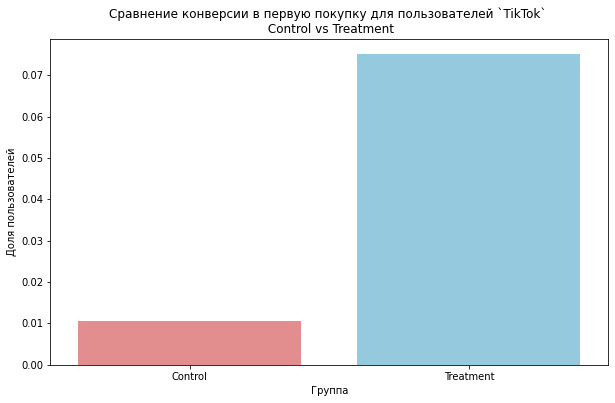

In [86]:
# Отключаем экспоненциальное представление чисел

pd.reset_option('display.float_format')

# Вычисляем необходимые переменные

control_reg = ab_users[ab_users['group'] == 'control']['user_id'].nunique()
test_reg = ab_users[ab_users['group'] == 'treatment']['user_id'].nunique()

control_purchase = ab_orders[ab_orders['group'] == 'control']['user_id'].nunique()
test_purchase = ab_orders[ab_orders['group'] == 'treatment']['user_id'].nunique()

# Проверка гипотезы, связанной с барьерной метрикой

n_a = control_reg # количество регистраций в контрольной группе

n_b = test_reg # количество регистраций в тестовой группе

m_a = control_purchase # количество пользователей, совершивших одну и более покупок в контрольной группе

m_b = test_purchase # количество пользователей, совершивших одну и более покупок в тестовой группе

p_a, p_b = m_a/n_a, m_b/n_b # доли пользователей TikTok, совершивших первую покупку (конверсия в первую покупку), 
                            # для каждой группы: контрольной и тестовой

if (p_a*n_a>10)and((1-p_a)*n_a>10)and(p_b*n_b>10)and((1-p_b)*n_b>10): # проверяем предпосылку о достаточном количестве данных
    print('Предпосылка о достаточном количестве данных выполняется!\n')
else:
    print('Предпосылка о достаточном количестве данных не выполняется!\n')    
    
alpha = 0.05 # уровень значимости

stat_ztest, p_value_ztest = proportions_ztest(
  [m_a, m_b],
  [n_a, n_b],
  alternative='smaller' # проводим Z-тест пропорций, H0: p_a = p_b, H1: p_a < p_b, так как мы проверяем: 
                        # значимо ли статистически увеличение конверсии из этапа регистрации в этап 
                        # совершения первой покупки в тестовой группе по сравнению с контрольной группой
) 

if p_value_ztest > alpha:
    print(f'pvalue={p_value_ztest} > {alpha}')
    print('Не получилось отвергнуть нулевую гипотезу')
    print('Статистически значимое увеличение конверсии из этапа регистрации в этап совершения первой покупки в тестовой группе по сравнению с контрольной группой - не наблюдается')
else:
    print(f'pvalue={p_value_ztest} < {alpha}')
    print('Отвергаем нулевую гипотезу')
    print('Наблюдается статистически значимое увеличение конверсии из этапа регистрации в этап совершения первой покупки в тестовой группе по сравнению с контрольной группой')

# Рассчитываем абсолютные и относительные изменения значений в тестовой группе по сравнению с контрольной     
    
absolute_lift = p_b - p_a
relative_lift = (p_b / p_a - 1) * 100

# Соберём через словарь данные в датафрейм

results_1 = pd.DataFrame({
    'Group A': 'control',
    'Group B': 'treatment',
    'p-value': [p_value_ztest],
    'Metric A': [round(p_a, 2)],
    'Metric B': [round(p_b, 2)],
    'Absolute Lift': [round(absolute_lift, 2)],
    'Relative Lift (%)': [round(relative_lift, 2)]
})

# Выводим результат

print('\nКлючевая метрика — доля пользователей TikTok, совершивших первую покупку (конверсия в первую покупку):')
display(results_1)

# Создаем график

data = pd.DataFrame({
    'Group': ['Control', 'Treatment'],
    'Conversion Rate': [p_a, p_b],
    'Metric': ['A', 'B']
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Group', y='Conversion Rate', data=data, palette=['lightcoral', 'skyblue'])
plt.title('Сравнение конверсии в первую покупку для пользователей `TikTok` \n Control vs Treatment')
plt.ylabel('Доля пользователей')
plt.xlabel('Группа')

Так как `pvalue=1.582453e-18 < alpha = 0.05`, мы можем сделать вывод о том, что мы отвергаем нулевую гипотезу. Это значит, что наблюдается статичестически значимое увеличение ключевой метрики (доли пользователей `TikTok`, совершивших первую покупку) **на 605%** в тестовой группе (**CR = 1%**) по сравнению с контрольной группой (**CR = 8%**) при уровне значимости `alpha = 0.05`

Далее проверим гипотезу, связанную с барьерной метрикой

Барьерная метрика — общая выручка:


,Group A,Group B,p-value,Metric A,Metric B,Absolute Lift,Relative Lift (%)
0,control,treatment,2.425815e-09,18918.65,192279.85,173361.21,916.35


Text(0.5, 0, 'Группа')

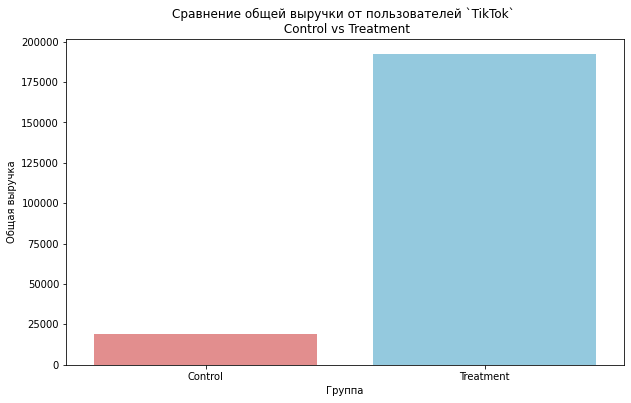

In [87]:
# Получаем список всех уникальных групп

groups = sorted(ab_orders['group'].unique())

# Группируем данные

revenue_group = ab_users.groupby(['user_id', 'group'])['revenue'].sum().reset_index()

# Создаём словарь для хранения данных по группам

group_data = {group: revenue_group[revenue_group['group'] == group]['revenue'] for group in groups}

# Создаём список для хранения результатов

results2 = []

# Проводим попарные сравнения всех групп

for i in range(len(groups)):
   for j in range(i + 1, len(groups)):
       group1 = groups[i]
       group2 = groups[j]
       _, p_value = ttest_ind(group_data[group1], group_data[group2]) 

       metric_a = group_data[group1].sum() # общая выручка
       metric_b = group_data[group2].sum() # общая выручка
       absolute_lift = metric_b - metric_a
       relative_lift = (group_data[group2].sum() / group_data[group1].sum() - 1) * 100

       # Добавляем результаты в список
       results2.append({
           'Group A': group1,
           'Group B': group2,
           'p-value': p_value,
           'Metric A': round(metric_a, 2),
           'Metric B': round(metric_b, 2),
           'Absolute Lift': round(absolute_lift, 2),
           'Relative Lift (%)': round(relative_lift, 2)
})

# Создаём DataFrame из результатов

results_2 = pd.DataFrame(results2)

# Выводим результат

print('Барьерная метрика — общая выручка:')
display(results_2)

# Создаем график

data = pd.DataFrame({
    'Group': ['Control', 'Treatment'],
    'Revenue': [metric_a, metric_b],
    'Metric': ['A', 'B']
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Group', y='Revenue', data=data, palette=['lightcoral', 'skyblue'])
plt.title('Сравнение общей выручки от пользователей `TikTok` \n Control vs Treatment')
plt.ylabel('Общая выручка')
plt.xlabel('Группа')

Так как `pvalue = 2.425815e-09 < alpha = 0.05`, мы можем сделать вывод о том, что мы отвергаем нулевую гипотезу. Это значит, что наблюдается статичестически значимое увеличение барьерной метрики (общей выручки от пользователей `TikTok`) на **916%** в тестовой группе (**Revenue = 18918**) по сравнению с контрольной группой (**Revenue = 192279**) при уровне значимости `alpha = 0.05`

Далее проверим гипотезу, связанную с вспомогательной метрикой 1

Вспомогательная метрика 1 — средняя выручка на пользователя TikTok:


,Group A,Group B,p-value,Metric A,Metric B,Absolute Lift,Relative Lift (%)
0,control,treatment,2.425815e-09,12.59,131.25,118.66,942.71


Text(0.5, 0, 'Группа')

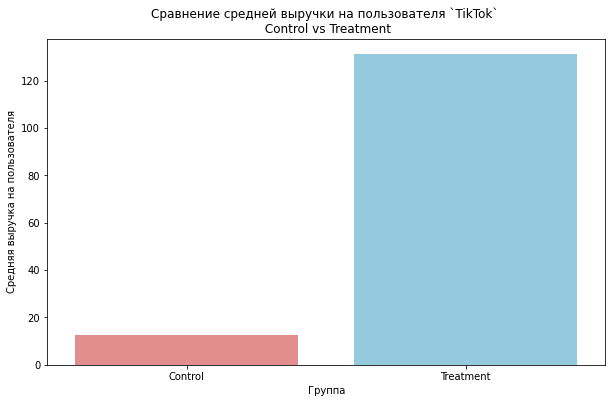

In [88]:
# Получаем список всех уникальных групп

groups = sorted(ab_orders['group'].unique())

# Группируем данные

revenue_group = ab_users.groupby(['user_id', 'group'])['revenue'].sum().reset_index()

# Создаём словарь для хранения данных по группам

group_data = {group: revenue_group[revenue_group['group'] == group]['revenue'] for group in groups}

# Создаём список для хранения результатов

results3 = []

# Проводим попарные сравнения всех групп

for i in range(len(groups)):
   for j in range(i + 1, len(groups)):
       group1 = groups[i]
       group2 = groups[j]
       _, p_value = ttest_ind(group_data[group1], group_data[group2]) 

       metric_a = group_data[group1].mean() # средняя выручка на пользователя TikTok
       metric_b = group_data[group2].mean() # средняя выручка на пользователя TikTok
       absolute_lift = metric_b - metric_a
       relative_lift = (group_data[group2].mean() / group_data[group1].mean() - 1) * 100

       # Добавляем результаты в список
       results3.append({
           'Group A': group1,
           'Group B': group2,
           'p-value': p_value,
           'Metric A': round(metric_a, 2),
           'Metric B': round(metric_b, 2),
           'Absolute Lift': round(absolute_lift, 2),
           'Relative Lift (%)': round(relative_lift, 2)
})

# Создаём DataFrame из результатов

results_3 = pd.DataFrame(results3)

# Выводим результат

print('Вспомогательная метрика 1 — средняя выручка на пользователя TikTok:')
display(results_3)

# Создаем график

data = pd.DataFrame({
    'Group': ['Control', 'Treatment'],
    'ARPU': [metric_a, metric_b],
    'Metric': ['A', 'B']
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Group', y='ARPU', data=data, palette=['lightcoral', 'skyblue'])
plt.title('Сравнение средней выручки на пользователя `TikTok` \n Control vs Treatment')
plt.ylabel('Средняя выручка на пользователя')
plt.xlabel('Группа')

Так как `pvalue = 2.425815e-09 < alpha = 0.05`, мы можем сделать вывод о том, что мы отвергаем нулевую гипотезу. Это значит, что наблюдается статичестически значимое увеличение вспомогательной метрики 1 (средней выручки на пользователя `TikTok`) на **942%** в тестовой группе (**ARPU = 12**) по сравнению с контрольной группой (**ARPU = 131**) при уровне значимости `alpha = 0.05`

Далее проверим гипотезу, связанную с вспомогательной метрикой 2

Вспомогательная метрика 2 — средняя выручка на покупателя TikTok:


,Group A,Group B,p-value,Metric A,Metric B,Absolute Lift,Relative Lift (%)
0,control,treatment,0.309473,1182.42,1748.0,565.58,47.83


Text(0.5, 0, 'Группа')

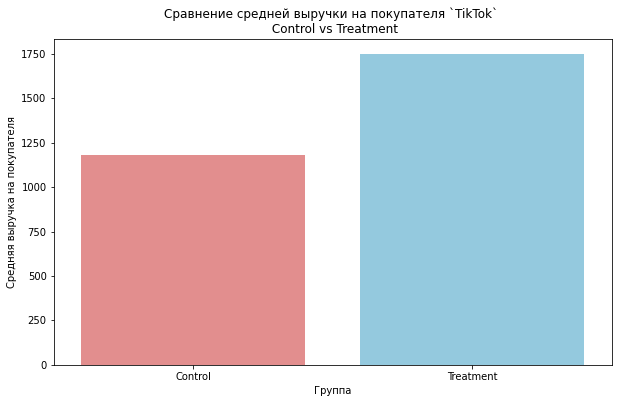

In [89]:
# Получаем список всех уникальных групп

groups = sorted(ab_orders['group'].unique())

# Группируем данные

revenue_not_null_group = ab_users[ab_users['revenue'] > 0].groupby(['user_id', 'group'])['revenue'].sum().reset_index()

# Создаём словарь для хранения данных по группам

group_data = {group: revenue_not_null_group[revenue_not_null_group['group'] == group]['revenue'] for group in groups}

# Создаём список для хранения результатов

results4 = []

# Проводим попарные сравнения всех групп

for i in range(len(groups)):
   for j in range(i + 1, len(groups)):
       group1 = groups[i]
       group2 = groups[j]
       _, p_value = ttest_ind(group_data[group1], group_data[group2]) 

       metric_a = group_data[group1].mean() # средняя выручка на покупателя TikTok
       metric_b = group_data[group2].mean() # средняя выручка на покупателя TikTok
       absolute_lift = metric_b - metric_a
       relative_lift = (group_data[group2].mean() / group_data[group1].mean() - 1) * 100

       # Добавляем результаты в список
       results4.append({
           'Group A': group1,
           'Group B': group2,
           'p-value': p_value,
           'Metric A': round(metric_a, 2),
           'Metric B': round(metric_b, 2),
           'Absolute Lift': round(absolute_lift, 2),
           'Relative Lift (%)': round(relative_lift, 2)
})

# Создаём DataFrame из результатов

results_4 = pd.DataFrame(results4)

# Выводим результат

print('Вспомогательная метрика 2 — средняя выручка на покупателя TikTok:')
display(results_4)

# Создаем график

data = pd.DataFrame({
    'Group': ['Control', 'Treatment'],
    'ARPPU': [metric_a, metric_b],
    'Metric': ['A', 'B']
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Group', y='ARPPU', data=data, palette=['lightcoral', 'skyblue'])
plt.title('Сравнение средней выручки на покупателя `TikTok` \n Control vs Treatment')
plt.ylabel('Средняя выручка на покупателя')
plt.xlabel('Группа')

Так как `pvalue = 0.309473 > alpha = 0.05`, мы можем сделать вывод о том, что мы не можем отвергнуть нулевую гипотезу. Это значит, что статичестически значимое увеличение вспомогательной метрики 2 (средней выручки на покупателя `TikTok`) на **47%** в тестовой группе (**ARPPU = 1182**) по сравнению с контрольной группой (**ARPPU = 1748**) при уровне значимости `alpha = 0.05` - не наблюдается

Далее проверим гипотезу, связанную с вспомогательной метрикой 3

Вспомогательная метрика 3 — средний чек TikTok:


,Group A,Group B,p-value,Metric A,Metric B,Absolute Lift,Relative Lift (%)
0,control,treatment,0.63391,959.4,826.98,-132.42,-13.8


Text(0.5, 0, 'Группа')

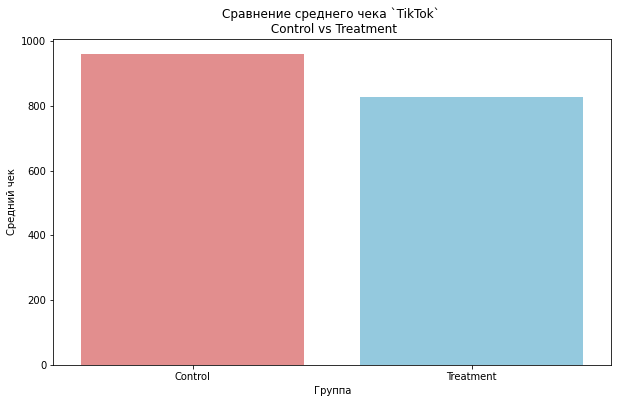

In [90]:
# Получаем список всех уникальных групп

groups = sorted(ab_orders['group'].unique())

# Группируем данные

revenue_group = ab_users.groupby(['user_id', 'group'])['revenue'].sum().reset_index()

orders_group = ab_orders.groupby(['user_id', 'group'])['order_id'].nunique().reset_index()

aov_group = pd.merge(revenue_group, orders_group, on = ['user_id', 'group'])

aov_group['AOV'] = aov_group['revenue']/aov_group['order_id']

# Создаём словарь для хранения данных по группам

group_data = {group: aov_group[aov_group['group'] == group]['AOV'] for group in groups}

# Создаём список для хранения результатов

results5 = []

# Проводим попарные сравнения всех групп

for i in range(len(groups)):
   for j in range(i + 1, len(groups)):
       group1 = groups[i]
       group2 = groups[j]
       _, p_value = ttest_ind(group_data[group1], group_data[group2])  

       metric_a = group_data[group1].mean() # средний чек TikTok
       metric_b = group_data[group2].mean() # средний чек TikTok
       absolute_lift = metric_b - metric_a
       relative_lift = (group_data[group2].mean() / group_data[group1].mean() - 1) * 100

       # Добавляем результаты в список
       results5.append({
           'Group A': group1,
           'Group B': group2,
           'p-value': p_value,
           'Metric A': round(metric_a, 2),
           'Metric B': round(metric_b, 2),
           'Absolute Lift': round(absolute_lift, 2),
           'Relative Lift (%)': round(relative_lift, 2)
})

# Создаём DataFrame из результатов

results_5 = pd.DataFrame(results5)

# Выводим результат

print('Вспомогательная метрика 3 — средний чек TikTok:')
display(results_5)

# Создаем график

data = pd.DataFrame({
    'Group': ['Control', 'Treatment'],
    'AOV': [metric_a, metric_b],
    'Metric': ['A', 'B']
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Group', y='AOV', data=data, palette=['lightcoral', 'skyblue'])
plt.title('Сравнение среднего чека `TikTok` \n Control vs Treatment')
plt.ylabel('Средний чек')
plt.xlabel('Группа')

Так как `pvalue = 0.63391 > alpha = 0.05`, мы можем сделать вывод о том, что мы не можем отвергнуть нулевую гипотезу. Это значит, что статичестически значимое увеличение вспомогательной метрики 3 (среднего чека `TikTok`) в тестовой группе (**AOV = 959**) по сравнению с контрольной группой (**AOV = 826**) при уровне значимости `alpha = 0.05` - не наблюдается. В отношении вспомогательной метрики 3, наоборот - наблюдается снижение среднего чека на **13%** в тестовой группе по сравнению с контрольной группой

Таким образом, на основе проведённых статистических тестов, мы можем сделать следующие выводы:

- Основная гипотеза подтверждена: бонус на первую покупку привел к статистически значимому росту показателя конверсии в первую покупку (`CR`) на **605%** (с **1%** до **8%**).

- Барьерная метрика (`Revenue`) показала статистически значимый рост: общая выручка от пользователей `TikTok` увеличилась на **916%** (с **18918** до **192279**), что свидетельствует об успешности эксперимента с точки зрения бизнес-результата.

- Вспомогательная метрика 1 (`ARPU`) показала статистически значимый рост: средняя выручка на пользователя увеличилась на **942%** (с **12** до **131**), что подтверждает эффективность бонусной программы для монетизации аудитории `TikTok`.

- Качество покупателей не ухудшилось: несмотря на отсутствие статистической значимости в росте вспомогательной выручки 2 - средней выручки на покупателя (`ARPPU`) на **47%** (с **1182** до **1748**) и снижении вспомогательной метрики 3 - среднего чека (`AOV`) на **13%** (с **959** до **826**), общее увеличение конверсии, выручки и средней выручки на пользовтеля компенсируют снижение среднего чека.

## Выводы по этапу 5

На основе результатов A/B-тестирования можно сформулировать следующие рекомендации для маркетплейса:

- Запустить бонусную программу для всех новых пользователей `TikTok` на постоянной основе, поскольку экспериментальные данные подтвердили положительное влияние на ключевые бизнес-метрики.

- Отслеживать динамику изменения среднего чека (`AOV`) после массового внедрения, так как наблюдалось статистически незначимое снижение на **13%**. Рекомендуется анализировать, не усилится ли этот эффект при масштабировании.

- Проанализировать причины роста средней выручки на покупателя (`ARPPU`): увеличение на **47%** хотя и не достигло статистической значимости, требует дополнительного исследования для понимания поведения платежеспособной аудитории.

- Оптимизировать размер бонуса: провести дополнительные эксперименты по определению оптимального размера бонуса, который максимизирует конверсию при сохранении рентабельности.

- Расширить тестирование на другие каналы: учитывая успешность эксперимента с `TikTok`, рекомендуется протестировать аналогичную бонусную программу для пользователей из других источников трафика.